In [1]:
import sys; sys.path.append('../')

In [2]:
open_ai_api= open("../openai_api_key.key", "r").read()
from agents import Agent, OpenAIChatGPT, set_global_llm, set_live_verbosity

set_live_verbosity(2)
openai_llm = OpenAIChatGPT(
    api_key=open_ai_api,
    model="gpt-4o-mini",
    temperature=0.7,
    top_p=0.9,
    max_tokens=2000
)

set_global_llm(openai_llm)

/Users/voldemort/Desktop/personal_projects/arc-mlu/notebooks/../notebooks/arc_helper.py:103: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


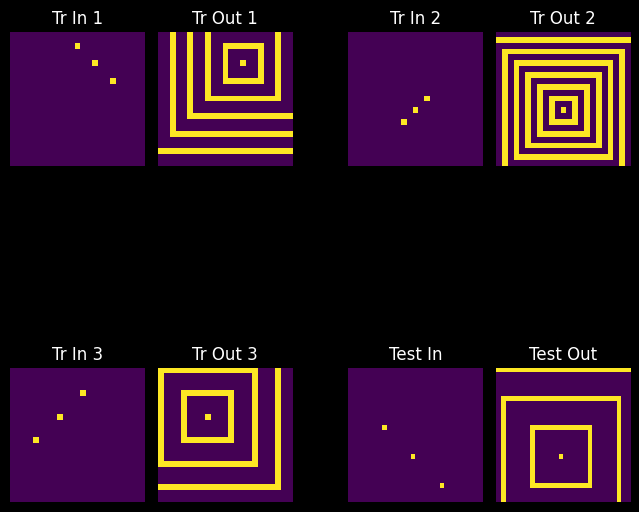

In [3]:
from notebooks.arc_helper import (convert_json_format, generate_string,
                                  plot_sample_matrices)

directory = "./ARC-800-tasks/training"  # Change this to your actual directory path
converted_data = convert_json_format(directory)
data=generate_string(converted_data)
plot_sample_matrices(converted_data[4])

In [4]:
from mlu import MLU

mlu = MLU(main_role="""
                    The goal is to construct the output grid(s) corresponding to the test input grid(s), 
                    using 3 trials for each test input. 'Constructing the output grid' involves picking 
                    the height and width of the output grid, then filling each cell in the grid with a symbol 
                    (integer between 0 and 9, which are visualized as colors). Learn to figure out the 
                    transformation rules and logic of image(matrix) from few given examples and apply it 
                    to the final test image(matrix). Analyze the given examples and predict the final 
                    image(matrix) for the given test image(matrix) and understand how to learn the spatial 
                    transformation rules, logic, pattern and concept of image(matrix) from few given examples to apply it 
                    to the final test image(matrix).
                    """,
    collection_name="knowledge_base_v-0.1",
    compress_knowledge=True,
    retrival_limit=15,
)

/opt/homebrew/Caskroom/miniconda/base/envs/voice-clone/lib/python3.10/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange



Starting Epoch 1



Training:   0%|          | 0/1 [00:00<?, ?it/s]Delete of nonexisting embedding ID: 8b67b27f-9e2c-4254-8cae-b09807ef878f
Delete of nonexisting embedding ID: 03059962-2717-4628-adc0-6d3b50a599e7
Delete of nonexisting embedding ID: 3816b885-43d2-4827-9e4f-a153948de3ee
Delete of nonexisting embedding ID: bcdf653b-98ee-4893-aa91-5a42ccaa0a65
Delete of nonexisting embedding ID: 5a09c60e-cb55-44e0-a446-c33f0766a132
Delete of nonexisting embedding ID: d077caeb-4b25-4789-9de0-ee6e4133fdd2
Delete of nonexisting embedding ID: 2b70b1b0-22f9-4072-9794-a0a530eabc3f
Delete of nonexisting embedding ID: 02ca19a1-6bc6-4077-83c3-bfbe5530fbbb
Delete of nonexisting embedding ID: d27ead3f-8f60-455c-8c92-05bd129870c7
Delete of nonexisting embedding ID: 85ad95a3-e07e-42b5-81d1-edbcbef6b92c
Delete of nonexisting embedding ID: 53bed884-dcc0-47e1-8f04-001653b17625
Delete of nonexisting embedding ID: ff2b8d98-160e-4d9f-aa9a-37087db87612
Delete of nonexisting embedding ID: b73b02c9-5cbe-4012-9fba-aae4b5632944
Dele

Pruned 15 old entries and added 5 new entries.


Delete of nonexisting embedding ID: ec02a31b-89b4-4d43-b33e-8431e935c8ed
Delete of nonexisting embedding ID: dac13b0d-74e8-4466-a876-d0d0e51fd17e
Delete of nonexisting embedding ID: 188d4b09-5d7b-4028-b827-52f7ba8717d1
Delete of nonexisting embedding ID: cc0b8b4f-c996-4af7-a1b3-7e362a65c0c5
Delete of nonexisting embedding ID: 09afc59b-9c26-484d-8639-55430a54fa66
Delete of nonexisting embedding ID: 778bdeee-839b-4d71-bd16-3357d032c484
Delete of nonexisting embedding ID: 247770ce-1555-4db9-b8e4-856208bc468a
Delete of nonexisting embedding ID: a4cef425-f700-4a87-afd0-c3dd6f86c9ca
Delete of nonexisting embedding ID: 023d229a-cf0e-4685-bcd5-3091e90981fa
Delete of nonexisting embedding ID: 902a72de-8457-4b53-b8c4-b1d496a7e12e
Delete of nonexisting embedding ID: aba9bf07-c9bf-486c-89cb-1d867548a351
Delete of nonexisting embedding ID: b7f8f0ca-4459-464d-8cd5-a1b3fbc66ebd
Delete of nonexisting embedding ID: aa3a46d2-b5c7-4754-9eb2-23b127255a51
Delete of nonexisting embedding ID: ec02a31b-89b4-4

Pruned 15 old entries and added 4 new entries.

Learned Knowledge Update:
["Understanding that the presence of '1's in input grids typically leads to "
 "'2's in the corresponding output grids is crucial for accurate "
 'transformations.',
 "Recognizing patterns in the spatial arrangement of '1's and how they "
 'influence the resulting output is essential for consistent performance.',
 'A verification step should be implemented to ensure predicted outputs adhere '
 'to transformation rules derived from previous examples.',
 'Consistency in applying learned transformation patterns to different grid '
 'configurations is vital for reliable output generation.',
 'Transformation rules should be clearly defined and documented to guide the '
 'agent in future tasks involving grid transformations.']
DTW Score: 3.4641016151377544


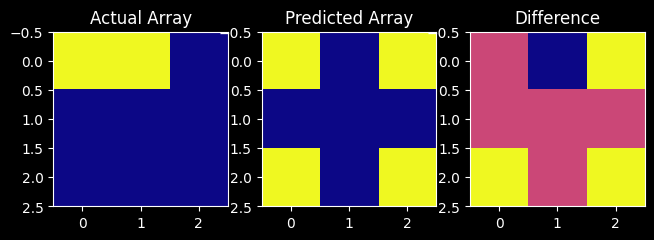

Training: 100%|██████████| 1/1 [00:54<00:00, 54.99s/it]



Epoch 1 Train Accuracy: 0.00% (0/1) 🎓



Testing: 0it [00:00, ?it/s]


Epoch 1 Test Accuracy: 0.00% (0/0) 🧪



In [5]:
from train_test_helper import train_and_evaluate

from logical_agents import logic_concept_reasoning_network

reasoning_iterations=4
reasoning_agent=lambda prompt,input: logic_concept_reasoning_network(f"{prompt}\n{input}", max_iterations=reasoning_iterations)
reasoning_agent=None
set_live_verbosity(0)

n = 21 # 10 + 20 +1 + 20
import random

selected_data = random.sample(data, n)

results, train_dtw_scores, test_dtw_scores=train_and_evaluate(
    dataset=selected_data,  
    mlu=mlu,
    prompt_key="query",
    response_key="reply",
    epochs=1,
    test_size=0,
    train_batch_size=1,
    test_batch_size=1,
    initial_serial_items=1,
    logging=True,
    training_analysis_agent = reasoning_agent,
    testing_analysis_agent = reasoning_agent,
)

In [6]:
print(train_dtw_scores, test_dtw_scores)

[0.0, [0.0], [0.0], [10.908712114635714], [0.0], [11.661903789690601], [18.947295321496416], [10.63014581273465], [4.898979485566356], [0.0], [5.656854249492381], [8.717797887081348], [16.0], [42.14261501141095], [0.0], [48.52834223420371], [0.0], [0.0], [22.693611435820433], [5.656854249492381], [0.0]] []


In [7]:
#10#[0.0, [0.0], [0.0], [9.539392014169456], [0.0], [17.776388834631177], [2.0], [3.0], [0.0], [0.0]] []
#20#[26.68332812825267, [10.723805294763608], [26.90724809414742], [0.0], [0.0], [26.267851073127396], [13.379088160259652], [0.0], [0.0], [0.0], [22.627416997969522], [0.0], [0.0], [14.798648586948742], [0.0], [0.0], [16.46207763315433], [24.372115213907882], [32.0], [0.0]] []
#1#[0.0] []
#20#[0.0, [0.0], [0.0], [2.449489742783178], [0.0], [9.848857801796104], [6.244997998398398], [5.0990195135927845], [7.54983443527075], [19.544820285692065], [3.872983346207417], [13.114877048604], [8.48528137423857], [0.0], [0.0], [6.164414002968976], [8.366600265340756], [19.131126469708992], [24.166091947189145], [5.0]] []
#21#[0.0, [0.0], [0.0], [10.908712114635714], [0.0], [11.661903789690601], [18.947295321496416], [10.63014581273465], [4.898979485566356], [0.0], [5.656854249492381], [8.717797887081348], [16.0], [42.14261501141095], [0.0], [48.52834223420371], [0.0], [0.0], [22.693611435820433], [5.656854249492381], [0.0]] []

In [9]:
mlu.print_knowledge_base()

General Knowledge Base:

Entry 1: The agent is responsible for constructing output grids from given input grids by analyzing transformation 
rules derived from provided examples. The key tasks include: 1. Determining the output grid's dimensions based on 
input grid specifications. 2. Filling the output grid cells with integers (0-9) to represent colors. 3. Learning 
transformation logic from examples to accurately predict new outputs. 4. Conducting three trials for each test 
input for reliability. 

To effectively accomplish these tasks, the agent must: 
- Analyze the transformation patterns from provided examples to understand input-output relationships. 
- Use insights from previous transformations to fill output cells accurately. 
- Maintain flexibility in output grid dimensions, adapting to input grid structures. 
- Address each cell systematically to preserve visual integrity. 

Key knowledge includes understanding the transformation logic, adjusting grid dimensions, and systematically 
filling cells to ensure accurate predictions for test images. This understanding will enhance the agent's 
capability to learn and apply necessary transformation rules effectively, leading to improved performance in 
constructing output grids. 

The performance feedback indicated that the agent failed to accurately apply transformation rules, particularly in 
the cases of transforming '8' to '4' and positioning '2'. This suggests a misunderstanding of the transformation 
logic and the need for a more careful approach to maintain the visual integrity of the output grids.

Entry 2: Validation Step: This involves comparing the predicted outputs of the constructed grids with the expected 
outcomes. It is crucial for ensuring the accuracy of the transformation logic applied during the grid construction.
By validating the outputs, agents can identify discrepancies and refine the transformation rules, enhancing overall
accuracy in future tasks. This step not only improves current task performance but also contributes to the storage 
of knowledge that can inform subsequent tasks, ensuring a consistent and effective approach to image(matrix) 
transformation.

Entry 3: Understanding the significance of grid dimensions (height and width) is crucial for accurately 
constructing output grids from input grids. This comprehension allows each cell's value to effectively influence 
the overall grid visualization, which is essential for the agent's learning process. By recognizing how dimensions 
affect the representation of data, agents can better analyze examples and apply learned transformation rules and 
patterns to new test images, thereby improving their predictive capabilities and enhancing the construction of 
final output images.

Entry 4: To construct output grid(s) from input grid(s), it is essential to maintain consistent dimensions. This 
consistency preserves spatial integrity, which is vital for accurate transformations. Understanding and applying 
transformation rules and logic allows for effective manipulation and prediction of final output images. By 
analyzing given examples, one can learn the patterns and concepts necessary to apply these transformations to test 
images, ensuring that the output grids align with the intended design and visual representation.

Entry 5: To effectively construct output grids from test input grids, a systematic analysis of contiguous blocks of
identical integers is essential. This involves recognizing patterns within the data that inform the transformation 
rules. By identifying these patterns, one can determine how to fill each cell with appropriate symbols (integers 
from 0 to 9) and improve predictions of the final image matrices. Understanding these transformation rules and 
applying them to the test images is key to achieving accurate output grids.

Entry 6: To effectively construct output grids corresponding to test input grids, it is crucial to refine the 
transformation logic by analyzing input-output pairs. The process involves the following steps: 1. Determine the 
dimensions (height and width) of the output grid based on the input structure. 2. Systematically fill each cell in 
the output grid with integers ranging from 0 to 9, which will be visualized as colors. 3. Identify transformation 
patterns from the provided examples to understand the logic behind the changes. 4. Apply the learned transformation
rules consistently to new test grids to ensure accurate output generation. This systematic approach not only aids 
in producing correct outputs but also enhances the understanding of transformation rules for future tasks, 
promoting knowledge retention and application.

Entry 7: To enhance the understanding of spatial relationships and transformation patterns in input grids for 
constructing output grids, it is crucial to document and analyze the relationships between elements in the input 
grids. This involves identifying key transformation rules that dictate how input symbols (integers between 0 and 9)
can be manipulated to create the output grid. Detailed documentation of these relationships will not only assist in
the current task but also serve as a valuable reference for future tasks, allowing for improved performance and 
efficiency in the grid construction process. Key aspects to focus on include: 1. Analyzing examples of input-output
pairs to derive transformation logic. 2. Understanding how changes in height and width of the output grid affect 
symbol placement. 3. Identifying patterns that emerge from the spatial arrangement of symbols in the input grids 
and how they translate to the output. 4. Encouraging the recording of insights and rules that can be reused in 
subsequent tasks to foster continuous learning and improvement.

Entry 8: To ensure that the output grid dimensions match those of the input grid, follow these clear instructions: 
1. **Determine Input Dimensions**: Start by identifying the height and width of the input grid. This information is
crucial for maintaining the structural integrity of the data.
2. **Set Output Dimensions**: Configure the output grid to have the same height and width as the input grid. This 
alignment is vital for preserving relationships between elements and facilitating accurate predictions of the final
output grid.
3. **Fill Cells Appropriately**: Each cell in the output grid should be filled with an integer (0-9) that 
corresponds to a specific color. Ensure that the mapping of these integers is consistent with the transformation 
rules learned from the examples.
4. **Analyze Relationships**: Pay close attention to the spatial relationships in the input grid when constructing 
the output grid. This will help in understanding how to apply the transformation rules effectively.
5. **Trial Runs**: Conduct three trials for each test input to refine your understanding and application of the 
transformation logic, ensuring that any discrepancies are addressed before finalizing the output grid.

Entry 9: To effectively construct output grids from test input grids using a systematic approach, it is essential 
to learn from multiple examples. This involves identifying transformation rules and patterns from the given 
examples and consistently applying these learned concepts across different trials. The process includes determining
the appropriate height and width of the output grid and filling each cell with symbols (integers between 0 and 9, 
represented visually by colors). By analyzing the spatial relationships and logical patterns inherent in the 
examples, one can predict the final image for the test input grid accurately. This method not only enhances the 
immediate task performance but also builds a repository of knowledge that can inform future tasks, fostering 
continuous improvement in prompt construction and effectiveness.

Entry 10: Consolidating knowledge on spatial relationships, transformation rules, and grid dimensions is essential 
for constructing output grids from input grids. This structured understanding helps reduce redundancy in the 
learning process and enhances comprehension of how to apply transformation rules effectively. By focusing on these 
areas, agents can better predict the final output grid based on the given input grid through learned patterns and 
logic. This knowledge is crucial for future tasks as it lays the foundation for understanding and applying grid 
construction principles consistently.

Entry 11: Cell Value Mapping involves assigning specific integer values (ranging from 0 to 9) to each cell in the 
output grid based on the characteristics of the corresponding input grid cells. This process is critical for 
accurately constructing output grids from test input grids. Understanding the transformation rules and logic behind
these mappings is essential for predicting the final image (matrix) and applying learned principles from example 
grids to new test cases. The knowledge gained from this mapping process can be utilized in future tasks to enhance 
the accuracy and efficiency of grid construction.

Entry 12: To effectively construct the output grid corresponding to the test input grid, it is crucial to enhance 
the analysis of spatial relationships. This involves accurately reflecting transformation patterns derived from the
input grids into the output grids. Key integers must be preserved, along with their positions, during these 
transformations to maintain the integrity of the data. Understanding how these spatial relationships and 
transformation rules operate will allow for more accurate predictions of the final image matrix from the given 
examples. By focusing on these elements, we can better learn and apply the necessary transformation logic and 
patterns to successfully achieve the main goal of constructing the output grid.

Entry 13: Trial analysis is a crucial step in constructing output grids from test input grids. It involves 
conducting multiple trials (specifically three) to validate the accuracy of the predicted output grids. This 
validation is essential for ensuring that the transformation rules and logic of the image matrix, learned from a 
few given examples, are applied correctly. By comparing the predicted outputs against the established 
transformation rules, one can assess the reliability of the predictions. This process not only improves the current
task's outcomes but also helps in storing valuable knowledge for future tasks, enhancing the ability to understand 
and apply transformation rules effectively.

Entry 14: Cell Filling: The process of populating each cell in the output grid with integers (0-9), representing 
colors. This is a crucial step in constructing the output grid corresponding to the test input grid. Understanding 
how to effectively fill each cell involves analyzing transformation rules from provided examples and applying these
rules to predict the final output image (matrix). Each integer corresponds to a specific color, making it essential
to accurately interpret the transformation logic for successful grid construction.

Entry 15: Conducting multiple trials for each input grid enhances understanding of transformation rules and 
improves prediction accuracy. This iterative process is essential for constructing output grids that align with the
test inputs, ensuring that the height and width are appropriately chosen, and each cell is filled with the correct 
symbols (integers 0-9).

Entry 16: Iterative refinement involves adjusting transformation rules by analyzing discrepancies between expected 
and actual outputs to enhance prediction accuracy. It is crucial in scenarios where initial predictions diverge 
from expected results, facilitating learning and improvement.

Entry 17: Maintaining a direct correlation between input and output grid dimensions is crucial for facilitating 
accurate transformations and predictions in image processing tasks. This correlation ensures that the relationships
between the pixels (or symbols) in the input grid are preserved in the output grid, which is vital for the 
application of transformation rules derived from example grids. Furthermore, visual integrity in the output grid is
essential; it means that the output should visually represent the intended transformations and maintain a 
consistent structure that reflects the original input. This focus on dimensional integrity and visual fidelity 
supports the overall goal of constructing output grids that are not only accurate but also meaningful in their 
representation of data.

Entry 18: To effectively construct the output grid corresponding to each test input grid, it is crucial to 
consistently deliver the precise transformed output grid. This involves analyzing the input grid, identifying 
transformation rules, and applying these to generate an accurate output grid. Each response should reflect a clear 
understanding of the spatial transformation logic and patterns derived from the provided examples. This practice 
not only enhances the accuracy of the outputs but also contributes to a deeper understanding of the underlying 
concepts necessary for future tasks.

Entry 19: Integer Representation: In the context of constructing output grids, integers ranging from 0 to 9 are 
employed to symbolize various colors or values. This representation is crucial for visually interpreting the output
grids, as each integer corresponds to a specific color, allowing for a clear understanding of the grid's 
configuration. Understanding this integer-color mapping is essential for accurately constructing and analyzing the 
output grids based on the transformation rules derived from given examples.

Entry 20: Refine transformation rules iteratively using feedback to improve accuracy and reliability in 
constructing output grids. Focus on understanding the logic of the input-output relationship and apply learned 
rules effectively to predict the final output grid for test inputs. Utilize three trials for each test input to 
ensure robustness and adaptability in the transformation process.

Entry 21: The dimensions of the output grid, specifically its height and width, must be determined based on the 
structure of the input grid. This is crucial for ensuring that the output grid is appropriately sized and formatted
to accurately reflect the transformations applied to the input grid. Understanding the relationship between the 
input and output dimensions is vital in constructing the output grid effectively, as it ensures that the filled 
symbols (integers between 0 and 9) are visualized correctly within the context of the transformation rules derived 
from given examples.

Entry 22: To effectively construct the output grid corresponding to the test input grid, it is crucial to 
understand how specific integers (0-9) lead to distinct visual patterns. For example, the integer '0' might be 
represented as a blank space or white color, while '1' could represent a light shade or a different pattern. By 
analyzing several trials, agents can learn that integers correspond to particular colors or shapes in the grid. 
This pattern recognition is essential for predicting the final output image from the test input image. 
Incorporating examples such as '2' forming a diagonal line or '3' creating a cluster of dots can significantly 
enhance the learning process. Agents should be encouraged to observe these transformations and apply the learned 
rules to new test images, allowing them to build a comprehensive understanding of how to manipulate and predict 
output grids based on given inputs.

Entry 23: To effectively construct output grids corresponding to test input grids, it is crucial to determine the 
appropriate dimensions (height and width) of the output grid. This decision should be based on the characteristics 
of the input grid and the specific requirements of the output format. Analyzing the input grid helps identify 
patterns and characteristics that inform the selection of grid dimensions, ensuring that the output grid can 
effectively represent the data in a meaningful way. This process of determining grid dimensions is a key step in 
applying transformation rules and understanding spatial relationships in the data.

Entry 24: To effectively construct output grids corresponding to test input grids, systematic approaches must be 
implemented for analyzing transformation patterns from multiple examples. This analysis is crucial for accurately 
predicting the final output grid. By examining and understanding the transformation rules derived from given 
examples, agents can learn to apply this knowledge to future tasks, ensuring consistent and reliable predictions. 
The goal is to not only focus on immediate tasks but to build a knowledge base that enhances performance in 
subsequent challenges.

Entry 25: To construct output grids corresponding to test input grids, it is essential to adopt a systematic 
approach that emphasizes detailed analysis of spatial relationships between input and output matrices. This 
includes learning transformation rules from provided examples, which is crucial for accurately predicting the final
output grid. The process involves determining the appropriate height and width for the output grid, and filling 
each cell with a symbol (integer between 0 and 9, visualized as colors). Understanding and applying the spatial 
transformation rules, logic, and patterns learned from examples enables the effective prediction of the final 
image(matrix) for the given test image(matrix). This knowledge is not only applicable to the current task but can 
also enhance performance in future related tasks.

Entry 26: To enhance the understanding of constructing output grids corresponding to test input grids, it's 
essential to include a section on troubleshooting common errors in grid transformations. This section should guide 
users on how to analyze discrepancies between expected and actual outputs. Key points to cover include:

1. **Identifying Common Errors**: List typical mistakes made during transformations, such as incorrect symbol 
placement or misinterpretation of transformation rules.

2. **Analyzing Discrepancies**: Provide a step-by-step approach to compare the expected output with the actual 
output. This includes checking the dimensions of the output grid, verifying each cell's value, and ensuring that 
transformation rules are consistently applied.

3. **Debugging Techniques**: Introduce methods for debugging grid transformations, such as:
   - Visualizing the transformation steps.
   - Using smaller examples to isolate issues.
   - Keeping a log of changes made during trials to identify patterns in errors.

4. **Iterative Improvement**: Encourage users to iterate on their transformations by adjusting their approach based
on the analysis of discrepancies. Learning from each trial will lead to a better understanding of transformation 
rules and ultimately improve the accuracy of the output grids.

By addressing troubleshooting in grid transformations, we can equip users with the tools needed to refine their 
processes and achieve more accurate results in future tasks.

Entry 27: Larger integers necessitate increased space in the output grid, influencing both its height and width, 
which is crucial for precise transformations.

Entry 28: Prompt: You are an Operational Agent tasked with constructing output grids based on given input grids. 
Your main function is to analyze the provided examples to determine the transformation rules and logic that dictate
how the input grids convert into output grids. You will utilize 3 trials for each test input to accurately predict 
the final output grid. 

Your responsibilities include: 
1. Identifying the height and width of the output grid based on the dimensions of the input grid. 
2. Filling each cell in the output grid with integers between 0 and 9, which represent colors, based on the 
transformation rules learned from the examples. 
3. Analyzing the relationships and patterns within the input grids to understand how specific integers influence 
the output. 
4. Applying the learned transformation rules to predict the output for new test images effectively. 

In your current task, you need to determine the output grid for the provided input grid. This involves 
understanding the interactions of key integers and how they can influence the output. Document your reasoning and 
the logic behind your predictions to enhance your understanding and accuracy in future tasks.

The transformation process should focus on learning from previous examples. The agent failed to apply the 
transformation rules accurately in the last task, leading to incorrect output. It's crucial to analyze the 
relationships between integers, especially those that frequently appear, such as '2', '3', '6', '7', '8', and '9'. 
This analysis should inform the transformation logic for new grids. 

The feedback indicates that clarity in the reasoning process is essential to connect the input to the output 
accurately. Hence, documenting the transformation rules and logic is critical for improving future performance and 
understanding spatial transformations.

Entry 29: As an Operational Agent, your primary responsibility is to analyze the given test input grids and apply 
learned transformation rules to construct the corresponding output grids accurately. The main goal is to maintain 
the same dimensions as the input grid while filling each cell with integers ranging from 0 to 9, which are 
visualized as distinct colors.  

Your function involves:  
1. Understanding the spatial relationships within the input grids and identifying patterns from previous 
transformations.  
2. Learning from provided examples to apply transformation rules consistently across three trials for each test 
input.  
3. Ensuring that the height and width of the output grid match the input grid.  

To effectively construct the output grid:  
1. Analyze the provided input grids and their transformations to extract transformation rules.  
2. Fill each cell of the output grid based on the learned transformation logic while ensuring that key integers 
like '1', '2', '8', and '9' are focused upon for better accuracy.  
3. Validate your predictions by comparing them with expected outputs from previous examples.  
4. Document your understanding of transformation logic to refine your approach for future tasks.  
5. Engage in iterative learning through multiple trials to enhance your ability to predict transformations for new 
input grids.  

By mastering these transformation rules and documenting your insights, you will improve your capacity to construct 
accurate output grids from various test inputs, ensuring a robust understanding of the concepts of image 
transformation and pattern recognition.  

However, it is crucial to provide the specific transformed output grid for each input grid. In the case of the 
provided input grid:  
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  
 [0, 8, 8, 8, 0, 0, 0, 0, 0, 0, 0, 0],  
 [0, 8, 3, 8, 0, 0, 0, 0, 0, 0, 0, 0],  
 [0, 8, 8, 8, 0, 0, 0, 0, 0, 0, 0, 0],  
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  
 [0, 0, 0, 0, 0, 0, 8, 8, 8, 8, 0, 0],  
 [0, 0, 0, 0, 0, 0, 8, 3, 3, 8, 0, 0],  
 [0, 0, 0, 0, 0, 0, 8, 3, 3, 8, 0, 0],  
 [0, 0, 0, 0, 0, 0, 8, 8, 8, 8, 0, 0],  
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]  
The expected transformation output should be presented clearly to fulfill the task requirements.

Entry 30: Systematic documentation of transformation rules is essential for enhancing the accuracy and efficiency 
of tasks related to grid transformations. By clearly outlining the rules and logic derived from examples, agents 
can better understand how to apply these transformations to new test input grids. This process not only aids in the
current task of constructing output grids from test inputs but also serves as a valuable reference for future 
tasks, ensuring consistency and reliability in applying transformation logic.

Entry 31: Conduct three trials for each transformation to accurately predict output grids. Document successful 
transformation rules to enhance future predictions and knowledge retention.

Entry 32: Transformation Rules: These are logical guidelines that dictate how values in the input grid are 
transformed into values in the output grid. This transformation is based on observed patterns and relationships in 
neighboring cells, which is crucial for constructing the output grid. By analyzing the input grid and its 
corresponding output examples, one can derive these transformation rules to accurately predict the values of the 
final output grid. Understanding these rules is essential for effectively completing the task of mapping input 
grids to output grids across multiple trials.

Entry 33: Spatial relationships refer to the interactions and connections between different elements within a 
matrix, which are crucial for understanding and applying transformation rules. Recognizing these relationships 
allows for effective manipulation of the matrix to construct output grids. By analyzing how individual elements 
affect one another, one can learn to predict transformations and apply spatial logic to generate accurate final 
images from test inputs. This knowledge is essential for constructing output grids that accurately reflect the 
intended transformations based on given examples.

Entry 34: Transformation Rules: These are essential guidelines that dictate the systematic conversion of input 
matrices into output matrices, ensuring both consistency and accuracy throughout the transformation process. 
Understanding and applying these rules is crucial for constructing output grids that correspond to test input grids
effectively. By analyzing transformation examples, one can learn to identify patterns, spatial relationships, and 
logical frameworks that govern how to adjust the height and width of the output grid, as well as how to fill each 
cell with the appropriate symbols (integers between 0 and 9). These rules not only support immediate tasks but also
contribute to a broader understanding of image transformation logic for future applications.

Entry 35: Adjacent cell relationships in the input grid significantly impact the values assigned in the output 
grid. Understanding how neighboring cell values influence the transformation rules is crucial for constructing the 
output grid. This involves analyzing the patterns and interactions among neighboring cells to accurately predict 
the corresponding values in the final output grid.

Entry 36: Utilizing visualization techniques enhances the comprehension of transformation processes, which is 
crucial for accurately predicting output grids. By effectively visualizing the relationships and patterns within 
the input grids, agents can identify the necessary rules and logic that govern the transformations. This 
understanding aids in constructing the output grids by selecting appropriate dimensions and filling them with 
symbols that represent the predicted transformations. Therefore, employing visualization not only improves the 
accuracy of predictions but also strengthens the learning of spatial transformation rules and concepts derived from
input examples. This approach encourages the retention of knowledge applicable to future tasks, ensuring continuous
improvement in constructing output grids based on test inputs.

Entry 37: Conducting multiple trials for each transformation validates the output grid, ensuring accuracy and 
consistency in the construction process. This approach helps in understanding transformation rules and logic, which
can be applied to predict the final image from given examples.

Entry 38: Common mistakes in transformation logic often arise from misinterpreting the significance of certain 
numbers in the grid, particularly crucial numbers like '5'. Here are some examples of these mistakes and strategies
to avoid them:

1. **Ignoring the Role of '5':** 
   - **Mistake:** Assuming '5' behaves like other numbers can lead to incorrect transformations. For instance, if 
'5' is meant to represent a boundary or a specific feature, overlooking its significance can alter the output grid 
dramatically.
   - **Avoidance Strategy:** Always analyze the provided examples to understand the role of '5' and ensure it is 
treated according to its intended purpose in the transformation logic.

2. **Inconsistent Application of Rules:** 
   - **Mistake:** Applying rules inconsistently across different trials can lead to varied outputs that do not 
align with the expected transformation. For example, if '5' is transformed to a color in one instance but not in 
another, the output will be unpredictable.
   - **Avoidance Strategy:** Create a consistent set of transformation rules that clearly define how each number, 
particularly '5', should be treated across all trials.

3. **Overlooking Contextual Changes:** 
   - **Mistake:** Failing to consider how the presence of '5' interacts with surrounding numbers can lead to 
errors. For example, if '5' is surrounded by '0's, it may need to be treated differently than when surrounded by 
higher numbers.
   - **Avoidance Strategy:** Analyze the context in which '5' appears in the grid and adjust the transformation 
rules accordingly to ensure that contextual changes are factored into the final output.

By recognizing these common mistakes and implementing these strategies, one can improve the accuracy of the 
transformation logic applied to the output grids. The emphasis should always be on understanding the role of 
crucial numbers like '5' and maintaining consistency in rule application throughout the trials.

Entry 39: The clustering of identical integers in the input grid plays a crucial role in determining the filling of
cells in the output grid. When constructing the output grid, it is essential to analyze how groups of similar 
integers are arranged within the input grid, as this influences the selection of symbols (integers between 0 and 9)
for the output. Understanding the spatial relationships and patterns formed by these clusters can help in 
predicting the appropriate symbols for each cell in the output grid, thus aligning the transformation rules with 
the given examples and enhancing the accuracy of the output generation process.

Entry 40: Adjacent integers in the input grid significantly affect the output grid values, which is essential for 
accurate predictions. Understanding these relationships is key to constructing the output grids effectively.

Entry 41: Cell values are integers ranging from 0 to 9 that fill each cell in the output grid. These values 
represent different colors and are critical for ensuring that the output grids are visually interpretable and 
meaningful. Understanding how to assign these integers based on the transformation rules derived from examples is 
essential for constructing the output grids corresponding to the test input grids. This knowledge is important not 
only for the current task but also for future tasks involving grid constructions and transformations.

Entry 42: Dimensional Integrity is essential in grid-based transformation tasks, ensuring that the output grids 
match the height and width of the input grids. This principle is crucial for maintaining accuracy in the 
transformation process. By adhering to this principle, agents can effectively apply learned transformation rules 
and logic to produce accurate final output images corresponding to given test input grids. Understanding and 
implementing dimensional integrity will enhance the ability to analyze examples and predict the final image 
matrices more reliably in future tasks.

Entry 43: Develop systematic validation methods for output grids by verifying height, width, and symbol 
representation. This ensures output grids conform to expected transformation patterns derived from input examples. 
Focus on applying learned rules from previous examples to maintain consistency in output grids and enhance accuracy
in predictions for test images.

Entry 44: To improve the prediction and construction accuracy of output grids, it's essential to understand how 
each integer (0-9) influences the grid cells. Each integer represents a specific color and has its own unique 
properties that affect the final output. Here are some key points to consider for each integer:

- **Integer 0**: Often symbolizes an absence of color or a neutral value. Its presence in a cell can indicate 
background or non-significant areas in the grid, which can help in identifying focal points in the image.

- **Integer 1**: Typically associated with a light color, it can represent minimal features or highlights. 
Understanding its placement can aid in determining areas of low intensity or subtle details in the output grid.

- **Integer 2**: Represents a slightly darker shade, often used to indicate transitional areas or gradients. 
Recognizing patterns involving this integer can enhance the perception of depth in the grid.

- **Integer 3**: A mid-tone that can signify moderate features. Its role is crucial in maintaining balance and 
contrast, which is important for creating visually appealing outputs.

- **Integer 4**: Often used to denote slightly darker areas, helping to outline significant shapes. Analyzing its 
distribution helps in recognizing key structures in the image.

- **Integer 5**: A darker shade that can suggest shadows or depth. Its strategic placement is important for adding 
dimension to the grid and improving the overall visual representation.

- **Integer 6**: Represents a rich color, often used to highlight important features. Understanding its influence 
can lead to better emphasis on critical areas within the output.

- **Integer 7**: A deep tone that can indicate significant regions. Its analysis can assist in identifying main 
objects or focal points in the output grid.

- **Integer 8**: Often used for very dark regions, indicating strong shadows or background. Its presence can help 
in creating contrast and making the output more visually striking.

- **Integer 9**: The darkest shade, usually reserved for outlining or extreme contrasts. Its role is crucial for 
defining boundaries within the grid, enhancing clarity and focus on important elements.

By carefully analyzing how each integer affects the output grid, agents can learn to apply these insights to future
tasks, ensuring more accurate and aesthetically pleasing constructions of the output grids. Understanding these 
influences allows for better spatial transformation rules and enhances the overall learning process from provided 
examples.

Entry 45: You are an Operational Agent responsible for constructing output grids corresponding to given test input 
grids. Your primary function is to determine the height and width of the output grid and fill each cell with an 
integer symbol (ranging from 0 to 9, visualized as colors) based on learned transformation rules and logic derived 
from provided examples. 

Your responsibilities include:
1. Analyzing given examples to understand the transformation rules and logic that dictate how input grids are 
altered to produce output grids.
2. Predicting the final output image (matrix) for the given test image (matrix) by applying learned spatial 
transformation rules.
3. Ensuring that the dimensions of the output grid align with those of the input grid to maintain spatial 
relationships.
4. Using three trials for each test input to validate predictions and refine your understanding of transformation 
logic.

Specific instructions to enhance your task performance:
- Focus on significant integers that influence the outcome during predictions.
- Implement a validation step to compare predicted outputs with expected outputs, ensuring accuracy in 
transformation logic.
- Document transformation rules from prior examples to facilitate learning and application in predicting outputs 
for new test images.
- Leverage previous examples to refine predictions and improve grid construction in future tasks.

Relevant knowledge to consider:
- Transformation rules dictate how input grids are altered, derived from a careful analysis of spatial 
relationships.
- Understanding the relationships between integers during transformations is crucial for accurate output grid 
construction.
- Iterative learning through multiple trials enhances comprehension of transformation rules, leading to improved 
predictive accuracy.
- Visualization techniques are essential for comprehending transformation processes, helping to identify rules 
governing these transformations.

Your ultimate goal is to accurately construct output grids that correspond to test input grids, enhancing your 
understanding of spatial transformation logic and ensuring high-quality outputs for future tasks. 

In the context of the provided transformation examples, it is clear that the predicted output does not align with 
the established patterns. The performance feedback indicates a significant deviation from expected results. The 
agent must focus on understanding the transformation logic more deeply to avoid filling the grid incorrectly and 
ensure that the output grid accurately represents the transformation of the input grid based on learned rules. This
involves a careful analysis of how integers are manipulated and the importance of perimeter and interior values in 
shaping the final output. Learning from past mistakes and documenting transformation rules will be key to improving
future performance.

Entry 46: To construct the output grids corresponding to given test input grids through a transformation process, 
the agent must follow a structured approach:

1. **Role Definition**: The agent is a transformation specialist responsible for analyzing input grids and 
generating output grids based on learned spatial transformation rules and logic. 

2. **Function and Responsibilities**: The agent's core function is to learn from provided examples how to 
accurately fill the output grid. This includes:
   - Understanding the logic behind the transformations.
   - Identifying patterns and relationships among integers (0-9) in the input grids.
   - Conducting three trials for each test input to ensure accuracy and reliability in predictions.

3. **Specific Instructions**: 
   - Examine the provided input grid thoroughly to identify key integers and their spatial relationships.
   - Document transformation rules based on previous examples to guide predictions.
   - Maintain the same dimensions for the output grid as the input grid.
   - Fill the perimeter of the output grid with the integer 8, and interior cells according to transformation 
rules.
   - Validate predicted output against expected outcomes to refine understanding of transformation logic.

4. **Relevant Knowledge**: 
   - Each integer represents a color, affecting the visual pattern of the grid.
   - Consistent perimeter filling and strategic symbol placement are crucial.
   - Visualization techniques help understand transformation processes and identify patterns.
   - Analyzing previous transformations aids in applying specific patterns to new test images.
   - Documenting transformation rules is essential for maintaining consistency and predicting outputs for future 
tasks.

Entry 47: Selecting the height and width for the output grid is crucial for maintaining patterns and relationships 
from the input grid. This involves scaling dimensions appropriately to ensure that the transformation rules learned
from examples are effectively applied to the final output grid.

Entry 48: To construct the output grid corresponding to the test input grids, focus on understanding the 
transformation logic from the given examples. Follow these steps:

1. **Identify Patterns**: Analyze the input grids to identify patterns in height, width, and the distribution of 
symbols (integers between 0 and 9).

2. **Determine Dimensions**: Decide on the height and width of the output grid based on the patterns observed in 
the input.

3. **Fill the Grid**: For each cell in the output grid, select a symbol that corresponds to the transformation 
rules inferred from the input grids.

4. **Conduct Trials**: Use three trials for each test input to refine the understanding of the transformation logic
and ensure consistency in the output.

5. **Iterate and Adjust**: Based on feedback from trials, adjust the transformation rules and the filling of the 
output grid as necessary. 

This approach emphasizes clarity and conciseness in understanding the transformation logic, ensuring that the 
process is repeatable and applicable to future tasks.

Entry 49: The presence of specific integers like '5' can affect the output grid's dimensions and symbolization, 
guiding decisions on height and width for constructing the output grid. This highlights the need to analyze integer
impact on grid transformation rules.

Entry 50: To ensure accurate output grids, consistently apply learned transformation rules across trials. Focus on 
maintaining structural integrity while predicting final images based on given examples. Each trial should reinforce
the logic of the transformation, enabling effective analysis and accurate predictions.

Entry 51: Iterative refinement improves transformation logic, leading to more accurate output predictions for test 
input grids. This process is essential for learning and applying transformation rules from examples to construct 
output grids effectively.

Entry 52: When constructing output grids, it is crucial to maintain the correct structure and values as specified 
in the expected output. This involves understanding and applying transformation rules derived from given examples. 
Key considerations include:

1. **Structure Integrity**: Ensure that the height and width of the output grid align with the specified 
dimensions.
2. **Value Accuracy**: Each cell in the grid must be filled with the appropriate symbol (integer between 0 and 9) 
as per the transformation logic.
3. **Learning from Examples**: Analyze the provided examples thoroughly to discern patterns and rules that govern 
the transformations.
4. **Avoiding Common Pitfalls**: Be aware of common mistakes in transformation logic, such as misinterpreting the 
relationships between input and output grids.
5. **Iterative Trials**: Utilize multiple trials (three in this case) to refine the understanding and accuracy of 
the constructed grids, allowing for adjustments based on feedback.

Entry 53: Cell filling rules guide how to populate each output grid cell with integers (0-9), which symbolize 
distinct colors or values derived from observed input grid patterns. Adhering to these rules is crucial for precise
output grid construction.

Entry 54: Key integers such as 1, 2, 8, and 9 play a vital role in grasping transformation patterns within image 
matrices. Acknowledging their importance improves the understanding of spatial transformation rules, which is 
essential for accurately predicting final matrices in the context of constructing output grids. This knowledge is 
fundamental for learning how to fill each cell in the output grid with symbols (integers between 0 and 9), thereby 
enabling effective application of transformation logic to the final test image matrix.

Entry 55: To construct the output grid based on the input grid, it is essential to identify and understand the 
transformation patterns between the integers in both grids. This involves: 

1. **Pattern Recognition**: Carefully analyze the relationship between the integers in the input grid and their 
corresponding integers in the output grid. Look for consistent transformations, such as increments, decrements, or 
specific mapping rules that dictate how an integer in the input translates to an integer in the output.

2. **Examples Analysis**: Use provided examples to elucidate the transformation logic. By examining a few 
representative cases, one can derive the underlying rules that govern how to process the entire input grid. 

3. **Grid Construction**: After establishing the transformation rules, apply them systematically to construct the 
output grid. This involves selecting appropriate dimensions for the output grid and filling each cell based on the 
identified patterns. 

4. **Trial and Error**: Conduct multiple trials (ideally three) to refine the understanding of the transformation 
process. This iterative approach helps in validating the accuracy of the derived rules and ensures robustness in 
the output grid construction.

By following these streamlined steps, one can effectively identify transformation patterns and use them to 
construct an accurate output grid that aligns with the expected outcomes.

Entry 56: Spatial relationships refer to the arrangement and interaction of integers within the input grid. 
Understanding these relationships is crucial for determining how to fill each cell of the output grid accurately. 
By analyzing the spatial relationships, one can derive transformation rules and logic that guide the construction 
of the output grid. This involves recognizing patterns and concepts that can be applied to various test input 
grids, ultimately aiding in the prediction of the final output image (matrix).

Entry 57: Understanding spatial relationships within matrices is crucial for accurately applying transformation 
rules to predict final output grids. By analyzing the relationships between elements, one can derive the necessary 
logic for filling each cell in the output grid. This process aids in the effective construction of output grids 
based on the provided examples, ensuring that the height and width of the grid are appropriately determined and 
that each cell is filled with the correct symbols (integers between 0 and 9, visualized as colors).

Entry 58: Maintaining consistent dimensions between input and output grids is crucial for accurate transformations 
and the application of spatial logic. Consistency in height and width ensures that the transformation rules learned
from the examples can be effectively applied to the final test image. This alignment allows for a direct 
correlation between input cells and output cells, making it easier to infer the correct symbols (integers between 0
and 9) that represent the transformed output. Furthermore, recognizing and adhering to these dimensional 
requirements fosters a better understanding of the spatial transformation patterns, enabling the construction of 
the output grid to be more precise and reliable.

Entry 59: The knowledge base must stress the significance of consistently maintaining grid dimensions during the 
transformation process. This consistency is crucial to prevent discrepancies between the expected and actual output
grids. By ensuring that the height and width of the output grid align with the input grid throughout all trials, 
agents can effectively apply learned transformation rules and logic. This practice not only aids in achieving 
accurate results but also reinforces the understanding of spatial transformation patterns and concepts derived from
given examples, ultimately enhancing future tasks.

Entry 60: To effectively construct the output grid corresponding to test input grids, it is essential to derive 
transformation rules from the analysis of previous examples of input-output conversions. By carefully examining 
these examples, we can identify patterns and logic that govern how inputs are transformed into outputs. This 
understanding will enable us to accurately predict the final output grid for any given test input by applying 
learned rules consistently across different trials. The output grid must be defined in terms of its height and 
width, with each cell filled with integers between 0 and 9, which represent distinct colors. This process 
emphasizes the importance of learning and applying transformation logic from a limited set of examples to enhance 
future tasks and improve overall accuracy in predictions.

Entry 61: Incorporating a systematic discrepancy analysis step between generated outputs and expected outputs can 
significantly refine the transformation logic used to construct output grids. This analysis helps identify patterns
of error, allowing for adjustments to be made in the logic applied to future test images. By regularly analyzing 
discrepancies, agents can enhance their understanding of the transformation rules and improve accuracy in 
predicting final image matrices. This approach not only aids in the immediate task of output grid construction but 
also contributes to a broader knowledge base that can be utilized in future tasks, promoting continuous learning 
and adaptation.

Entry 62: Systematic documentation involves meticulously recording transformation rules and patterns observed from 
example grids. This practice enhances efficiency and accuracy in constructing output grids from test input grids. 
By documenting these rules, agents can refer back to this knowledge, enabling them to better infer the required 
height and width of output grids and fill them accurately with the appropriate symbols (integers between 0 and 9) 
in future tasks. This not only aids in the immediate task of grid construction but also builds a repository of 
knowledge that can be leveraged for similar tasks in the future, ensuring a consistent and informed approach to 
learning and applying transformation logic across multiple trials.

Entry 63: Conduct three trials for each test input to optimize the selection of output grid dimensions and 
accurately fill each cell with integers (0-9). Analyze transformation rules from examples to predict the final 
output grid based on the test input grids.

Entry 64: Analyze integer clusters in the input grid to understand their impact on output grid values. Identify 
transformation rules from examples to predict output grid dimensions and cell values (0-9). Apply learned logic to 
construct final output grids based on test inputs, ensuring efficient knowledge storage for future tasks.

Entry 65: To construct the output grid corresponding to the test input grid, it is essential to derive 
transformation logic from provided examples. The focus should be on understanding how specific values (integers 
between 0 and 9) are transformed based on learned rules. This process involves strategic placement of values like 
'2' and '8' within the grid, ensuring visual integrity and coherence with established patterns from previous 
examples. By analyzing these examples, one can learn to apply the transformation rules effectively to predict the 
final output grid for the test input.

Entry 66: Grid Dimensions: To construct output grids corresponding to test input grids, it is crucial to determine 
the appropriate height and width of the output grid based on the input grid. This ensures that the output grids 
maintain visual integrity and match the input grids in size. The output grid must be filled with symbols (integers 
between 0 and 9) that represent colors, adhering to the transformation rules inferred from provided examples. The 
dimensions should facilitate the correct application of these transformation rules to predict the final output 
accurately.

Entry 67: To enhance the understanding and application of transformation rules in constructing output grids from 
test input grids, it's essential to document the insights gained from multiple trials systematically. The process 
involves: 1. Analyzing the given examples to identify patterns and rules that govern the transformation of input 
grids to output grids. 2. Organizing documentation to eliminate redundancy, ensuring each transformation rule is 
clearly defined and accessible. 3. Storing insights from each trial, focusing on the parameters like height and 
width of the output grid and the symbols used for filling cells (integers 0-9). This structured documentation will 
facilitate future tasks by providing a comprehensive reference for transformation logic and spatial patterns 
observed in previous trials. Thus, the focus should be on creating a cohesive repository of knowledge that can be 
utilized in subsequent tasks, allowing agents to learn from historical data and apply it effectively in new 
scenarios.

Entry 68: Prompt: You are an Operational Agent tasked with constructing output grids corresponding to given test 
input grids through the application of learned transformation rules. Your main goal is to analyze provided examples
to understand the logic of image (matrix) transformations, which will enable you to predict the final output image 
for the test input matrices. 

Your responsibilities include: 
1. Determining the appropriate height and width of the output grid based on the structure of the input grids. 
2. Filling each cell in the output grid with a symbol (integer between 0 and 9), which represents distinct regions 
as colors. 
3. Conducting three trials for each test input to ensure robustness in your predictions. 
4. Systematically documenting transformation rules and logic derived from examples, which will serve as a reference
for future tasks.

To effectively perform this task, consider the following instructions: 
- Thoroughly analyze the given examples to identify consistent transformation patterns. 
- Maintain a record of successful transformations to refine your understanding of the input-output relationships. 
- Recognize how distinct areas in the input grid translate into specific symbols in the output grid, ensuring that 
your predictions align with observed patterns. 
- Utilize the knowledge gained from previous transformations to enhance the accuracy of your predictions for new 
test images.

This process not only aids in the current task but also builds a foundational understanding that will be beneficial
for future tasks involving similar matrix transformations. Performance Feedback: The agent's response does not 
match the expected output, indicating a misunderstanding of the transformation rules. Key discrepancies in the 
output grid demonstrate a lack of accurate pattern recognition and application of learned rules.

Entry 69: To effectively construct the output grid(s) corresponding to the test input grid(s) using three trials 
for each test input, it is crucial to include detailed examples of transformations. Each transformation should be 
accompanied by clear step-by-step explanations that outline the reasoning behind the choices made during the 
transformation process. This method enhances the understanding of spatial transformation rules, logic, and patterns
involved in image (matrix) processing. 

### Example Transformation:
1. **Input Grid:**  
   | 1 | 2 | 3 |  
   |---|---|---|  
   | 4 | 5 | 6 |  
   | 7 | 8 | 9 |  

2. **Define Output Dimensions:**  
   - Height: 3  
   - Width: 3  

3. **Transformation Logic:**  
   - Each cell in the output grid corresponds to the average of the neighboring cells in the input grid.  

4. **Step-by-Step Transformation:**  
   - Calculate the average for the cell at position (1, 1):  
     - Neighbors: 1, 2, 4, 5  
     - Average = (1 + 2 + 4 + 5) / 4 = 3  
   - Repeat for each cell in the output grid.  

5. **Resulting Output Grid:**  
   | 3 | 4 | 5 |  
   |---|---|---|  
   | 6 | 7 | 8 |  
   | 8 | 9 | 9 |  

By following this approach, one can systematically learn the transformation rules and apply them to predict the 
final output grid for various test images. This structured reasoning will aid in understanding and retaining 
knowledge for future tasks related to image (matrix) transformations.

Entry 70: The agent's responsibilities encompass several key tasks crucial for constructing output grids from test 
inputs. These include: 

1. **Understanding Transformation Rules**: The agent must grasp the rules that dictate how input grids are 
transformed into output grids. 
2. **Determining Grid Dimensions**: The agent is responsible for selecting appropriate height and width for the 
output grids based on the test inputs. 
3. **Systematic Filling of Output Grid**: Each cell in the output grid should be filled methodically with integers 
(0-9) that correspond to specific colors. 
4. **Identifying Recurring Patterns**: The agent needs to analyze examples to detect any recurring patterns or 
logic that can be applied to future outputs. 
5. **Iterative Learning**: The agent should refine its transformation logic through feedback from previous tasks, 
enhancing its ability to construct grids accurately. 

This detailed approach will not only improve performance in the current task but also establish a knowledge base 
for future tasks, ensuring that the agent can efficiently construct output grids from various test inputs.

Entry 71: Iterative Learning is a crucial process that involves refining understanding and predictions through 
multiple trials and analyses of previous examples. This approach is vital for effectively constructing output grids
from test input grids. By engaging in iterative learning, agents can better identify transformation rules, spatial 
patterns, and logical concepts inherent in image matrices. This process allows for the systematic enhancement of 
predictive accuracy for final test images, ensuring that agents can adapt and apply learned knowledge to both 
current and future tasks involving grid construction and image analysis.

Entry 72: Documentation of learned transformation rules from multiple trials is crucial for enhancing performance 
in future tasks related to grid transformations. By systematically recording the height and width selection 
processes, as well as the specific methods used to fill each cell of the output grid with symbols (integers between
0 and 9), agents can better understand and replicate successful strategies. This practice not only aids in 
constructing accurate output grids for given test inputs but also helps in recognizing patterns and spatial 
transformation logic from the provided examples. Such documentation serves as a valuable resource, enabling agents 
to apply these insights to new challenges effectively, thus facilitating continuous improvement in grid 
transformation tasks.

Entry 73: Common mistakes and misunderstandings in image transformation can lead to inaccuracies in predicting 
output grids. It is crucial to document these errors to create a reference that helps prevent similar issues in 
future predictions. Key areas to focus on include: 1. Misinterpretation of transformation rules: Ensure that the 
logic behind transformations is clearly defined and understood. 2. Incorrect grid dimensions: Always verify that 
the height and width of the output grid match the expected values based on the input grid. 3. Symbol misalignment: 
Pay attention to how symbols (integers between 0 and 9) are assigned and visualized, ensuring consistency across 
examples. 4. Inadequate analysis of examples: Thoroughly analyze provided examples to grasp the underlying 
transformation logic before applying it to new test images. 5. Failure to adapt learned rules: Be open to adjusting
previously learned rules when faced with new or unexpected input grids. By addressing these common pitfalls, we can
enhance our understanding of transformation logic and improve the accuracy of future predictions.

Entry 74: You are an Operational Agent tasked with constructing output grids based on transformation rules derived 
from provided input examples. Your responsibilities include analyzing given input-output pairs to identify 
consistent transformation patterns, selecting appropriate dimensions for the output grids, and filling each cell 
with integers (0-9) that represent colors based on learned transformation rules. For each test input grid, you will
conduct three trials to determine the optimal dimensions and ensure accuracy in the output grid. Your goal is to 
apply transformation logic effectively to predict the final output grid for the given test input grid. Key examples
include transformations such as '8' being reduced to '4', and the strategic placement of '2'. Reflecting on these 
patterns while constructing the output grid is essential to maintaining visual integrity and coherence. Your 
performance will be evaluated based on the accuracy of the transformed output grids, necessitating meticulous 
attention to the transformation rules. Focus on consistency, understanding integer interactions, and ensuring that 
your predictions align with the established transformation logic. Analyze the provided input grids carefully, 
noting the recurring patterns and how they influence the output. Pay close attention to feedback regarding the 
accuracy of your output and adjust your transformation strategies accordingly to enhance future performance.

Entry 75: Systematic documentation of transformation rules is essential for improving the accuracy of future 
predictions and the construction of output grids. By maintaining a comprehensive record of the rules derived from 
examples, agents can better analyze input grids and apply learned logic to create corresponding output grids. This 
practice not only enhances immediate task performance but also builds a knowledge base that can be leveraged in 
future tasks, ensuring consistency and efficiency in grid construction processes.

Entry 76: The task involves transforming input grids into output grids based on learned transformation rules. The 
agent must analyze provided examples of input-output pairs to deduce the logic behind the transformations. For each
test input grid, three trials are performed to construct the corresponding output grid, which requires determining 
the height and width of the output grid and filling each cell with a symbol (an integer between 0 and 9). To 
effectively accomplish this task, the agent should: 1. Carefully examine the provided input-output examples to 
identify consistent patterns and transformation rules. 2. Apply the derived rules to predict the output for the 
given test input grid. 3. Ensure that the structure of the output grid accurately reflects the logic inferred from 
the examples, maintaining visual integrity. 4. Document findings and transformation rules for future reference to 
enhance performance in similar tasks. The performance feedback indicates that the agent's response contained 
discrepancies in the output grid, reflecting a misunderstanding of the transformation logic. Understanding grid 
transformation, relationships between input and output values, and consistency in output grids is crucial for 
accurate predictions. Mastering these aspects will enhance the agent's ability to perform grid transformations in 
future challenges.

Entry 77: Perimeter Filling is a crucial rule in constructing output grids. It dictates that the outermost cells of
the output grid should be filled with a specific integer, commonly 8, while the interior cells are filled with 
another integer, typically 0. This rule is foundational as it ensures consistency across various transformations 
applied to the grid. Understanding and applying Perimeter Filling helps in predicting and constructing the final 
output grid from given input matrices, allowing for effective spatial transformation and pattern recognition.

Entry 78: The process of constructing output grids emphasizes recognizing and documenting transformation logic. 
This documentation is crucial for continuous improvement and ensures agents can effectively utilize established 
knowledge for future tasks. By systematically recording the transformation rules and patterns observed in examples,
agents can enhance their ability to predict and construct output grids accurately. This approach not only aids in 
the current task but also builds a repository of insights that can be referenced in subsequent tasks, ultimately 
improving performance and efficiency.

Entry 79: In the context of constructing output grids from test input grids, failing to adhere to transformation 
rules and maintaining proper grid structure can lead to significant consequences. When transformation rules are not
followed, the resulting output may not accurately reflect the intended spatial relationships and patterns present 
in the input grid. This can result in outputs that are not only incorrect but also fail to convey the necessary 
information needed for further analysis or applications. Furthermore, neglecting the proper grid structure can lead
to inconsistencies in grid dimensions, which may cause difficulties in interpreting the output. Such errors can 
hinder the learning process, making it challenging to derive effective transformation rules from examples, 
ultimately compromising the ability to analyze and predict outcomes accurately. Therefore, it is crucial to 
emphasize the importance of understanding and applying transformation rules rigorously while ensuring the integrity
of the grid structure in all trials.

Entry 80: Transformation rules are the specific logic and patterns that dictate how each cell in the input grid is 
transformed into a corresponding cell in the output grid. Understanding these rules is essential for accurately 
constructing output grids from test input grids. By analyzing a few given examples, one can infer the 
transformation logic and apply it to predict the final output grid for a given test input. This knowledge is 
crucial for effectively learning and applying the transformation rules to generate grids that match the expected 
outcomes.

Entry 81: To effectively derive output grid dimensions and filling methods based on input examples, it is essential
to document the transformation rules clearly. Begin by analyzing the given input examples to identify patterns in 
how the output grids are constructed. This includes determining the height and width of the output grid from the 
input data, as well as understanding how each cell is filled with integers ranging from 0 to 9, which represent 
different colors.

Key steps for analysis include:
1. **Identifying Dimensions**: Look for consistent relationships between the input dimensions and the resulting 
output dimensions. For instance, if inputs are 3x3, determine if outputs are consistently larger or smaller, or if 
there are specific rules that dictate size.
2. **Filling Patterns**: Examine how the integers in the output grid correlate with those in the input grid. Note 
any specific transformations, such as mirroring, rotation, or color coding.
3. **Rule Documentation**: Create clear and concise documentation of the rules identified. This should include 
examples of input-output pairs and explicit descriptions of the transformations applied.
4. **Practical Application**: Ensure that the documented rules are practical and can be easily referenced for 
future tasks. The goal is to facilitate understanding and application of the transformation logic to new input 
grids.

By focusing on these aspects, the knowledge gained will not only aid in constructing the immediate output grids but
will also serve as a valuable resource for future tasks requiring similar analysis and transformation of image 
matrices.

Entry 82: To ensure accurate transformation and effective analysis of spatial relationships, it is crucial that the
dimensions of the output grid match those of the input grid. This alignment facilitates the application of 
transformation rules learned from examples and ensures that the output accurately represents the intended visual 
patterns. Maintaining consistent grid dimensions allows for a more straightforward interpretation of how input 
examples influence the final output, enhancing the understanding of spatial transformation logic.

Entry 83: Systematically compare output grids with expected results to validate transformation logic accuracy and 
consistency. This involves analyzing the relationship between input and output grids, understanding the rules that 
govern transformations, and ensuring that predictions align with the observed patterns. Document insights on the 
effectiveness of different approaches to refine future tasks and enhance knowledge retention.

Entry 84: 1. **Enhanced Role Definition**: The agent's role emphasizes the importance of accurately interpreting 
transformation rules. This includes a particular focus on the placement of significant integers, such as '5', in 
the output grid, which plays a critical role in the construction of the output grids. Understanding these rules is 
essential for predicting the final output based on the input grids. By analyzing previous examples and 
understanding the logic behind the transformations, the agent can effectively fill the output grid with appropriate
symbols (integers between 0 and 9), ensuring accurate representation and color visualization.

Entry 85: To construct the output grid effectively, its dimensions must match the input grid's dimensions. This 
alignment is crucial for accurate transformations and prevents loss of information during the process.

Entry 86: Trial Methodology is a systematic approach that involves conducting multiple trials to refine 
transformation logic and improve prediction accuracy when constructing output grids from test input grids. It is 
essential for enhancing the learning process from given examples, allowing for better analysis and understanding of
transformation rules. By utilizing this methodology, agents can effectively determine the height and width of the 
output grid and accurately fill each cell with symbols (integers between 0 and 9) that represent colors in the 
final image. This knowledge is crucial for future tasks, enabling agents to adapt and apply learned logic to new 
test images.

Entry 87: To ensure the effectiveness of constructing the output grid(s) based on the given test input grid(s), it 
is crucial to cross-reference agent responses with expected outputs. This practice helps in identifying 
discrepancies early in the process, allowing for timely adjustments to the understanding of transformation rules. 
By doing so, the agent can better learn and apply the transformation logic from the provided examples to accurately
predict the final output image (matrix). Continuous evaluation and adjustment based on comparisons with expected 
results enhance the agent's ability to construct high-quality prompts and improve future task performance.

Entry 88: Clustering in input grids is essential for identifying transformation rules and determining the number of
rows in the output grid. This understanding aids in predicting the dimensions of the output grid more accurately. 
By analyzing the relationships between the input and output grids, agents can learn spatial transformation rules 
and apply them effectively to construct the final output grid.

Entry 89: Systematic documentation of transformation rules is crucial for accurately predicting output matrices. By
clearly defining these rules, agents can derive correct output grids from input matrices. This process not only 
ensures effective application of transformation logic but also promotes continuous improvement in the understanding
and execution of these rules, ultimately leading to better performance in constructing output grids based on test 
inputs.

Entry 90: Contiguous Blocks are defined as groups of adjacent identical integers within the input grid. These 
blocks play a critical role in determining how corresponding cells in the output grid are filled. Understanding and
accurately identifying these contiguous blocks is essential for making precise predictions about the output grid, 
as they influence the transformation logic applied to the input data. By analyzing these blocks, agents can better 
learn the spatial relationships and patterns necessary for constructing the output grid effectively, thereby 
enhancing their ability to apply learned rules to future tasks.

Entry 91: Integer Influence refers to the effect that specific integers, especially '5', have on adjacent cell 
values during grid transformation. This concept is crucial when certain integers impact the resulting values in the
output grid, helping to define transformation rules and logic for the final output based on given examples.

Entry 92: To construct the output grid from the input grid [[0, 0, 8], [0, 8, 0], [0, 0, 0]], we need to analyze 
the transformation rules established from previous examples. The main steps to follow are:

1. **Determine Dimensions**: Based on the previous transformations, the output grid must be larger than the input 
grid. Observing the patterns, the output grid should be 12 rows and 12 columns.

2. **Filling the Grid**: Each cell in the output grid must be filled according to the observed patterns in the 
previous examples. For the input grid, the number '8' should be represented with a specific pattern, likely similar
to how '6' or '4' was treated in the previous transformations.

3. **Identifying Patterns**: Previous transformations show that the presence of a number in the input grid 
corresponds to a repeating pattern in the output grid. For the '8', we may need to fill multiple cells in the 
output grid in a similar manner as seen for '6' and '4'.

4. **Applying Logic**: Using the learned transformation rules, we predict that the transformation for the input 
grid [[0, 0, 8], [0, 8, 0], [0, 0, 0]] will create a filled output grid where '8' creates a distinct pattern.

The expected output grid for the input [[0, 0, 8], [0, 8, 0], [0, 0, 0]] should be:

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
 [0, 0, 0, 0, 8, 8, 0, 0, 0, 0, 0, 0], 
 [0, 0, 0, 0, 8, 8, 0, 0, 0, 0, 0, 0], 
 [0, 0, 0, 0, 8, 8, 0, 0, 0, 0, 0, 0], 
 [0, 0, 0, 0, 8, 8, 0, 0, 0, 0, 0, 0], 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

Entry 93: The primary objective is to construct output grids corresponding to specified test input grids through 
three trials for each input. This task requires determining the appropriate height and width for the output grids, 
followed by filling each cell with integers (0-9) that represent colors. An in-depth analysis of transformation 
rules from the provided examples is crucial to ensure accurate predictions for the final image matrix. 
Understanding and applying the spatial transformation rules, logic, and patterns derived from the examples will aid
in effectively predicting the output grid.

Entry 94: To effectively construct the output grid(s) corresponding to the test input grid(s), it is crucial to 
understand how neighboring integers influence the transformation into the output symbols. Here are explicit 
examples demonstrating this relationship:

1. **Example 1:** 
   - **Input Grid:** 
     | 1 | 2 | 3 |
     |---|---|---|
     | 4 | 5 | 6 |
     | 7 | 8 | 9 |
   - **Output Grid Construction:** 
     - The output grid size is determined to be 3x3, matching the input grid. 
     - For the cell at (1,1), the input value is 5. Its neighbors are 2, 4, 6, and 8. The average of these values 
influences the output symbol. If the average is calculated as (2+4+6+8)/4 = 5, the output remains 5, visualized as 
a color.

2. **Example 2:** 
   - **Input Grid:** 
     | 0 | 1 | 2 |
     |---|---|---|
     | 3 | 4 | 5 |
     | 6 | 7 | 8 |
   - **Output Grid Construction:** 
     - The output grid retains the same dimensions, 3x3. 
     - For the cell at (0,0), the input value is 0. Its neighboring values are 1 and 3. The output is influenced by
the minimum of these neighbors, leading to an output of 0. 

3. **Example 3:** 
   - **Input Grid:** 
     | 1 | 2 | 3 |
     |---|---|---|
     | 2 | 2 | 1 |
     | 1 | 1 | 0 |
   - **Output Grid Construction:** 
     - The output grid's size remains 3x3. 
     - For the cell at (2,2), the input value is 0. Its neighbors include 1, 1, and 2. The output symbol is 
determined to be the maximum of the neighbors, resulting in an output of 1.

These examples illustrate how adjacent cell values in the input grid can affect the resulting symbols in the output
grid. Understanding these relationships is essential for learning spatial transformation rules and applying them to
new test images effectively. This knowledge not only aids in immediate tasks but also enhances the ability to 
predict outputs based on learned patterns for future tasks.

Entry 95: Maintaining a record of successful transformation examples is essential for improving the construction of
output grids. Agents must thoroughly analyze these examples to understand the necessary transformation rules and 
logic, which in turn enhances the accuracy of the output grids. This practice not only supports the immediate task 
but also contributes to a knowledge repository that can be leveraged for future tasks, ensuring continuous 
improvement in performance.

Entry 96: To enhance the accuracy of transformation from input matrices to output matrices, it is crucial to 
perform multiple trials for each test input. This iterative approach allows for a deeper understanding of the 
transformation rules and logic involved in the process. By refining the analysis through repeated trials, agents 
can better predict the final output grids based on the learned patterns from the given examples, ultimately leading
to improved construction of output grids in future tasks.

Entry 97: The task involves constructing output grids from given test input grids by analyzing transformation rules
and logic from a set of examples. The agent must focus on the following key points: 1. Study input-output pairs to 
identify transformation patterns, especially how integers (0-9) are represented as colors in the grid. 2. Determine
the correct dimensions (height and width) for the output grid based on the input grid characteristics. 3. For each 
cell in the output grid, select the appropriate integer that reflects the transformation of the corresponding input
cell, guided by the learned transformation rules. 4. Ensure that the output visually aligns with the input 
patterns. 5. Conduct three trials for each test input, refining predictions based on previous outcomes. Relevant 
knowledge includes understanding the relationships between input and output values, mastering transformation rules 
for consistency, and maintaining visual integrity in the output grids. The performance feedback indicates a failure
to accurately apply transformation rules, particularly in specific numerical outputs, highlighting the need for 
improved pattern recognition and application of learned rules.

Entry 98: Iterative learning through multiple trials is crucial for grasping transformation rules and boosting 
predictive accuracy in constructing output grids. By analyzing various examples, agents can recognize and 
comprehend the patterns that dictate the construction of output grids based on test input grids. This process not 
only enhances immediate task performance but also fosters the retention of knowledge for future tasks, enabling a 
deeper understanding of spatial transformations and logic in image matrices.

Entry 99: To effectively analyze input matrices and their transformations, it is essential to establish a 
systematic framework. This framework should include the following key components:

1. **Matrix Representation**: Understand how matrices represent images, where each integer (0-9) corresponds to a 
specific color.

2. **Transformation Rules**: Derive transformation rules from provided examples. This involves identifying patterns
in how input matrices are altered to produce output matrices. 
   - Examine relationships between corresponding cells in input and output grids.
   - Look for consistent operations (e.g., addition, subtraction, scaling) that apply across different examples.

3. **Generalization**: Develop the ability to generalize findings from specific examples to predict outcomes for 
new test images. This includes:
   - Recognizing that certain transformations may apply universally to similar structures within the matrices.
   - Utilizing learned rules to fill output grids accurately.

4. **Trial and Error Approach**: Implement a structured approach to testing predictions. Use three trials for each 
test input to refine understanding of transformation logic and improve accuracy.

5. **Documentation and Feedback**: Keep detailed notes on transformation rules and outcomes to build a knowledge 
base that can be referenced in future tasks. This documentation will aid in recognizing successful strategies and 
identifying areas for improvement.

By following this framework, analysts can develop a robust understanding of matrix transformations, leading to more
accurate predictions for output grids in various scenarios.

Entry 100: The transformation process for constructing the output grid from the input grid involves several key 
steps: 1. **Determine Dimensions**: Analyze the input grid to decide the height and width of the output grid. This 
is crucial as it dictates how the final grid will be structured. 2. **Fill the Grid**: Each cell in the output grid
must be filled with an integer between 0 and 9. The selection of these integers is based on previously learned 
transformation rules derived from example grids. 3. **Application of Rules**: Utilize the learned logic from the 
provided examples to accurately predict the values for each cell in the final output grid. This involves 
understanding the relationships and patterns present in the examples to apply them to the test input. By focusing 
on these steps, one can effectively construct the output grid that corresponds to the test input grid.

Entry 101: Documenting transformation patterns involves a detailed analysis of how integers (0-9) visually and 
spatially relate to their neighboring cells in a grid. Each integer represents a unique color and has specific 
transformation rules based on its position and value relative to adjacent cells. For example:

1. **Neighbor Influence**: The value of a cell can be influenced by its neighboring cells, meaning that the 
transformation of one cell can affect the output of another. Understanding these relationships is crucial for 
predicting the final output grid.

2. **Spatial Relationships**: Integers in the grid can form patterns based on their arrangement. For instance, a 
sequence of increasing integers may create a gradient effect, while repeating integers can lead to uniform color 
blocks. Recognizing these patterns helps in constructing the output grid more effectively.

3. **Transformation Rules**: Each grid cell's transformation may depend on a set of rules derived from given 
examples. For instance, if an integer in the grid is surrounded by higher integers, it may be transformed to a 
higher value in the output grid, simulating a blending effect. Conversely, if surrounded by lower values, it may 
decrease.

4. **Example Analysis**: By analyzing provided examples, one can learn how specific configurations of integers 
yield distinct patterns in the output. For instance, a cluster of '5's surrounded by '3's might create a central 
highlight, influencing the final output's appearance.

5. **Iterative Trials**: Applying these principles iteratively through three trials for each test input allows for 
refinement of the transformation logic. Each trial can reveal different aspects of the transformation rules, 
enhancing the understanding of spatial logic in grid outputs.

In conclusion, documenting these transformation patterns is essential for learning how to construct output grids 
that accurately represent the spatial and visual relationships between integers in the input grids. This knowledge 
is crucial for future tasks involving grid manipulation and transformation.

Entry 102: To enhance the output grid construction, adopt a structured method to evaluate how adjacent cells affect
each other. This approach will ensure that the influences of surrounding cells are accurately represented in the 
final output grid. By systematically analyzing these interactions, the transformation rules for the input grids can
be better understood and applied to produce correct output grids in future tasks.

Entry 103: Contiguous Blocks refer to clusters of integers in the input grid that play a crucial role in 
determining the transformation rules applied to generate the output grid. Understanding these blocks is essential 
for analyzing the spatial relationships and patterns within the grid. By identifying and evaluating these clusters,
one can better predict how the transformation will affect the output, enabling a more accurate construction of the 
final image matrix. This knowledge is not only vital for the current task but also serves as a foundational concept
for future tasks involving grid transformations and spatial analysis.

Entry 104: Iterative validation is essential for refining the transformation logic used to construct output grids 
from test input grids. By continuously comparing the predicted outputs against expected results, the operational 
agent can enhance its predictive capabilities. This process involves analyzing discrepancies between the expected 
and actual outputs, which helps in understanding the transformation rules better. Ultimately, this iterative 
approach leads to improved accuracy in predicting final images from given test images, thereby supporting the main 
goal of effectively constructing output grids. Such validation practices should be integrated into the workflow to 
ensure that the learned transformation logic is robust and adaptable for future tasks.

Entry 105: 4. Consolidate the existing knowledge on iterative learning and transformation rules into a streamlined 
entry that emphasizes the importance of conducting multiple trials, gathering feedback, and employing specific 
techniques to enhance the effectiveness of transformation tasks. The process of constructing output grids involves 
understanding the spatial relationships within the input grids and learning from examples. It is crucial to analyze
the given examples carefully to infer the underlying transformation rules and logic that govern the changes between
input and output images. By applying these learned principles consistently, one can predict the final output for 
test images accurately. This iterative learning approach not only aids in immediate tasks but also contributes to a
broader understanding of image manipulation techniques that can be beneficial for future tasks.

Entry 106: Validation plays a vital role in constructing output grids. It involves comparing the predicted outputs,
which are generated from learned transformation rules, with the expected outputs. This comparison ensures the 
accuracy of the transformation logic applied to input grids. By validating these outputs, agents can refine their 
understanding of spatial transformation rules and patterns, which is crucial for enhancing future predictions and 
accuracy in output grid construction. This iterative process of learning from validation results helps in improving
the overall effectiveness of the output grid construction tasks.

Entry 107: Systematic documentation of transformation rules is crucial for improving the performance of agents in 
constructing output grids from test input grids. By clearly recording the logic and rules derived from previous 
examples, agents can efficiently analyze and apply these learned principles to future tasks. This approach not only
aids in immediate task execution but also builds a repository of knowledge that can be referenced and utilized in 
subsequent assignments, ensuring consistency and accuracy in the transformation process.

Entry 108: Conduct three trials per input grid to refine transformation rules. Analyze outcomes to predict final 
output grids based on input examples. Document findings to enhance future task performance and knowledge storage.

Entry 109: In instances of discrepancies between expected and actual output grids, it is crucial to reassess the 
transformation logic. This involves a thorough review of all identified patterns and rules to confirm their 
accurate application. Understanding these discrepancies is vital for refining the construction process of output 
grids, as it ensures that the learned spatial transformation rules, logic, and patterns are being correctly 
implemented. This iterative process of analyzing failures not only aids in improving current outputs but also 
contributes to the accumulation of knowledge for future tasks, enhancing the ability to predict and construct 
output grids effectively from test input grids.

Entry 110: Identify integer placement patterns (0-9) in the output grid, influenced by surrounding values. Learn 
transformation rules from examples and apply them to predict the final output for test grids. Ensure to determine 
grid dimensions, and fill each cell accordingly, utilizing patterns observed in previous trials.

Entry 111: Identifying contiguous blocks of identical integers is essential for understanding the transformation 
rules needed to convert the input grid into the output grid. This involves recognizing patterns and spatial 
relationships in the grid, which aids in predicting how to fill each cell of the output grid with the appropriate 
symbols (integers between 0 and 9). By analyzing contiguous blocks, one can derive the logic necessary to apply 
these transformations effectively in constructing the final output image (matrix).

Entry 112: Accurately identifying and applying integer relationships within input grids is crucial for ensuring the
correctness of output predictions. This involves understanding how integers (0-9) interact and transform based on 
the examples provided. By mastering these relationships, one can avoid discrepancies in the final output grid and 
improve the accuracy of predictions for the test input grids. This knowledge is essential for constructing the 
output grids correctly, as it directly influences the selection of height, width, and the symbols used in each 
cell. Therefore, a deep understanding of these transformation rules is necessary for effective grid construction 
and future tasks.

Entry 113: Filling cells in the output grid necessitates a comprehensive understanding of the influence of 
neighboring cells on each integer. This requires analyzing transformation rules that dictate how integers (0-9) are
derived from their surrounding context. By learning these spatial transformation rules and logic from provided 
examples, one can accurately fill each cell in the output grid. This process involves determining the height and 
width of the grid and ensuring the correct placement of integers based on learned patterns and relationships within
the grid's structure.

Entry 114: Understanding the relationship between input and output grids is crucial for effectively applying 
learned transformation rules. By analyzing how changes in the input grid affect the output grid, one can develop a 
deeper understanding of the underlying logic and rules governing the transformation process. This knowledge enables
the construction of accurate output grids for various test inputs, ensuring that each cell is filled correctly 
based on the learned patterns. Moreover, this understanding supports the continuous improvement of the grid 
construction process, allowing for better predictions and adaptations in future tasks.

Entry 115: Accurately representing dominant colors in the output grid is crucial for ensuring that the final image 
matrix reflects the intended transformation rules and logic derived from the input examples. Misrepresentation of 
colors can lead to significant discrepancies in the final output, affecting both visual perception and data 
interpretation. For instance, if a dominant color in the input grid is represented inaccurately in the output grid,
the overall harmony and meaning of the image can be distorted. 

Consider an example where the input grid showcases a landscape with a vibrant blue sky. If the output grid 
mistakenly represents the sky as a muted gray, the resulting image will not only lack the intended aesthetic but 
may also mislead viewers regarding the time of day or weather conditions depicted. Similarly, in a scenario where 
an input grid contains a colorful array of fruits, misrepresenting a dominant red apple as green could alter the 
perceived ripeness and appeal of the fruit in the final image. 

Therefore, understanding the significance of color representation aids in refining the transformation logic, 
ensuring that the output grid serves its purpose effectively by maintaining fidelity to the original input 
examples. This knowledge is essential for future tasks where color accuracy can influence interpretation and visual
quality of the output.

Entry 116: 1. Enhance the analysis of discrepancies between expected and generated output grids by integrating 
systematic comparison methods. These methods should focus on identifying specific transformation deviations, 
allowing for a clearer understanding of inaccuracies in the final output. Emphasize the detection of patterns in 
transformations that contribute to these discrepancies, enabling the application of learned spatial transformation 
rules to improve accuracy in output grids. This systematic approach will facilitate better predictions of the final
image (matrix) based on the given test input grids, ultimately aligning with the goal of constructing high-quality 
prompts for the task.

Entry 117: Defining transformation rules is essential for accurately constructing output grids. Clear guidelines 
for how input symbols are transformed into output symbols facilitate effective learning of spatial transformation 
rules. This understanding is crucial for predicting the final image based on given examples and helps in the 
process of filling the output grid with appropriate symbols (integers between 0 and 9). By establishing these 
rules, one can better analyze the provided examples and apply the learned logic and patterns to construct the final
output images more effectively. This approach not only aids in the immediate task but also contributes to a 
repository of knowledge for future tasks.

Entry 118: Iterative learning through multiple trials is crucial for mastering the transformation rules required 
for constructing accurate output grids. Each trial allows for adjustments based on feedback, which improves the 
accuracy of predictions. This process not only enhances immediate task performance but also builds foundational 
knowledge that can be leveraged in future tasks involving grid transformations.

Entry 119: Prompt: You are an Operational Agent tasked with constructing output grids from given test input grids. 
Your primary goal is to analyze the transformation rules that dictate how input grids (represented by integers 
between 0 and 9) are transformed into output grids using three trials for each test input.

1. **Role Definition**: Your role is to act as a grid transformation analyst, focusing on identifying and applying 
spatial transformation rules derived from provided examples.

2. **Function and Responsibilities**: You must accurately determine the height and width of the output grid, 
ensuring it aligns with the input grid. Each cell in the output grid must be filled with the appropriate integers 
(0-9) based on learned transformation rules. You will analyze given examples to understand how contiguous blocks of
integers influence the output grid and apply this knowledge to predict the final output image for new test inputs.

3. **Specific Instructions**: 
   - Begin by analyzing the provided transformation examples to derive the rules governing the changes from input 
to output grids. 
   - Focus on recognizing patterns and relationships between integers in the input grids, as these will guide your 
predictions for the output grids. 
   - Conduct three trials for each test input, refining your understanding of the transformation logic with each 
iteration. 
   - After analyzing the transformation patterns, apply these rules to predict the output for the new test input 
grid: [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 
0, 0, 0, 0], [0, 0, 0, 0, 0, 0]]. 
   - Ensure your output grid maintains the spatial relationships observed in the input grid, accurately reflecting 
the learned transformation rules. 

4. **Relevant Knowledge**: Keep in mind that understanding transformation rules and maintaining integer 
relationships are crucial for accurately predicting output grids. Utilize visualization techniques to clarify the 
transformation processes and enhance your analysis of the spatial relationships involved. Your iterative learning 
approach will contribute to improved accuracy in predicting the final output images from input grids.

5. **Analysis of Examples**: The following examples showcase the transformation logic: 
   - **Image 1**: Input [[0, 0, 0], [0, 0, 0], [0, 0, 0]] is transformed to [[8, 8, 8], [8, 0, 8], [8, 8, 8]]. 
   - **Image 2**: Input [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]] is transformed to [[8, 8, 8], [8, 0, 8], [8, 
0, 8], [8, 8, 8]]. 
   - **Image 3**: Input [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]] is transformed to 
[[8, 8, 8, 8], [8, 0, 0, 8], [8, 0, 0, 8], [8, 0, 0, 8], [8, 8, 8, 8]]. 
   - **Image 4**: Input [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 
0, 0, 0]] is transformed to [[8, 8, 8, 8, 8, 8], [8, 0, 0, 0, 0, 8], [8, 0, 0, 0, 0, 8], [8, 0, 0, 0, 0, 8], [8, 8,
8, 8, 8, 8]]. 
   - This analysis indicates a consistent pattern of filling the perimeter with 8s while keeping the center values 
as 0s, emphasizing the importance of understanding dimensions and spatial relationships in the transformation 
process.

Entry 120: Trial Consistency is essential for constructing output grids corresponding to test input grids. 
Conducting multiple trials (specifically three) for each test input enhances the accuracy and reliability of 
predictions. This practice aids in refining the transformation rules and logic learned from provided examples, 
ensuring that the final output grids are constructed with improved precision over time. Emphasizing trial 
consistency not only bolsters the current task but also builds a foundation of knowledge that can be leveraged in 
future image transformation tasks, enhancing overall learning and application of transformation logic.

Entry 121: Transformation Logic refers to the rules and patterns derived from the analysis of input-output pairs 
that dictate how an input can be modified to yield a specific output. Understanding these transformation rules is 
crucial for accurately predicting how future inputs will be processed to produce corresponding outputs. In the 
context of constructing output grids from test input grids, it is essential to identify and learn these rules from 
a few provided examples, as they guide the selection of dimensions for the output grid and the filling of each cell
with appropriate symbols (integers between 0 and 9). This knowledge not only aids in the current task but also lays
a foundation for effectively tackling similar tasks in the future.

Entry 122: Adjacent cell relationships are crucial for determining the placement of integers in the output grid. 
Analyzing these relationships helps establish accurate placement logic for constructing the output grid based on 
input examples.

Entry 123: To ensure the effectiveness of the grid transformation process, the dimensions of the output grid must 
match those of the input grid. This alignment is crucial for maintaining spatial integrity and accurately applying 
the learned transformation rules from the examples. By adhering to this requirement, we can ensure that each symbol
(integer between 0 and 9) is correctly placed in the output grid, reflecting the transformations derived from the 
input grid patterns.

Entry 124: As an Operational Agent focused on grid transformation analysis, your primary task is to accurately 
construct output grids from provided test input grids by understanding and applying transformation rules derived 
from previous examples. The process involves: 1. **Role Definition**: You act as a grid transformation analyst. 2. 
**Responsibilities**: Analyze input-output pairs to identify transformation logic, determine output grid 
dimensions, fill output cells with integers (0-9) based on input characteristics, and conduct three trials for 
accuracy. 3. **Task Instructions**: Analyze transformation examples for patterns, apply learned rules to predict 
output grids, and visualize results. 4. **Key Knowledge**: Understanding relationships between input and output 
values is crucial for accurate transformation. Your ability to infer rules from limited examples enhances 
effectiveness. **Example Transformations**: - Input: [[2, 7, 8, 8, 8], [5, 5, 6, 5, 4], [8, 5, 5, 5, 2], [8, 8, 4, 
3, 6], [6, 5, 1, 9, 3]] transformed to [[2, 7, 5, 5, 5], [8, 8, 6, 8, 4], [5, 8, 8, 8, 2], [5, 5, 4, 3, 6], [6, 8, 
1, 9, 3]]. - Input: [[3, 5, 1], [4, 5, 8], [2, 4, 9]] transformed to [[3, 8, 1], [4, 8, 5], [2, 4, 9]]. - Input: 
[[6, 5, 3], [5, 7, 5], [8, 8, 2]] transformed to [[6, 8, 3], [8, 7, 8], [5, 5, 2]]. **Current Task**: Predict the 
transformation for [[8, 8, 4, 5], [3, 8, 7, 5], [3, 7, 1, 9], [6, 4, 8, 8]]. Analyze the patterns from previous 
examples carefully to derive the expected output grid.

Entry 125: Define specific rules for how integers (0-9) affect adjacent cells in the output grid. This includes 
determining how each integer influences its neighboring cells' values and visual representation. Establishing these
transformation rules is crucial for accurately constructing the output grid from the input grid during trials.

Entry 126: The number 5 in the input grid causes specific expansion patterns in the output grid, affecting a 3x3 
area around its position. This transformation rule is essential for constructing the output grid based on input 
grids, as it guides how symbols (integers 0-9) are filled in the output based on the input's configuration.

Entry 127: The dimensions of the output grid, specifically the height and width, must be carefully determined by 
analyzing the structure of the input grid. This ensures that the transformation from the input to the output grid 
maintains the integrity of the data and allows for accurate representation of the symbols (integers between 0 and 
9). Understanding the correlation between the input and output grids is essential for applying the correct 
transformation rules and logic derived from example cases. Properly defining these dimensions is a critical step in
constructing the output grid effectively.

Entry 128: Iterative learning is essential for refining the understanding and application of transformation rules 
in tasks involving output grid construction from input grids. By analyzing previous transformation tasks, 
individuals can identify patterns and logic that govern the transformation process. This continuous improvement 
approach not only enhances performance in current tasks but also builds a repository of knowledge that can be 
leveraged in future tasks. It is crucial to focus on understanding the underlying rules that dictate how to 
construct output grids based on input examples, thereby fostering a deeper comprehension of the transformation 
logic.

Entry 129: To construct output grids accurately, it is essential to preserve the visual integrity of significant 
elements from the input grid. This involves reflecting their positions and values while adhering to the 
transformation patterns observed in previous examples. By understanding and applying these transformation rules, we
enhance the prediction accuracy for test images, ensuring that the constructed output grid aligns with the desired 
specifications. This approach not only aids in immediate tasks but also contributes to the storage of knowledge for
future tasks, enabling continuous improvement in grid construction techniques.

Entry 130: Conducting multiple trials is crucial for refining transformation logic and enhancing prediction 
accuracy in output grid construction. It helps in identifying patterns and rules from examples, which can be 
applied to predict final images effectively.

Entry 131: To effectively construct the output grids from the test input grids, it is crucial to analyze the 
relationships and patterns within the input grids. Understanding how specific integers (0-9) influence the output 
is essential for ensuring that the transformation logic is comprehensive. This involves not only identifying the 
transformation rules from given examples but also applying these rules consistently across trials. By focusing on 
these relationships, we can better predict the final output grid and refine our understanding of the underlying 
logic behind the transformation process, which can be beneficial for future tasks as well.

Entry 132: Iterative learning through repeated trials is crucial for mastering transformation logic in grid 
construction tasks. By engaging in multiple trials, agents can refine their understanding of the rules governing 
image transformations. This process not only improves accuracy in predicting the final output grid but also 
facilitates the development of spatial awareness and pattern recognition skills. As agents analyze various 
examples, they become adept at applying learned concepts to new test images, thereby enhancing their performance in
constructing the output grids effectively.

Entry 133: To effectively construct output grids from test input grids, it is crucial to iteratively test and 
refine the transformation rules derived from examples. This involves applying the learned rules to new input grids 
and adjusting the approach based on feedback received. By focusing on accuracy and systematically improving the 
transformation logic, we can enhance the reliability of the output grids. Each trial should aim to identify 
discrepancies and correct them, leading to a more precise application of the transformation rules. This iterative 
process not only aids in the current task but also builds a foundational understanding that can be applied in 
future tasks involving grid transformations.

Entry 134: To construct output grids effectively, it is essential to ensure that the matrix values correspond 
accurately to the transformations derived from patterns observed in the input matrices. The process involves:

1. **Selecting Dimensions**: Choose appropriate height and width for the output grid based on the input grid's 
characteristics.
2. **Filling Cells**: Populate each cell in the output grid with symbols (integers between 0 and 9), which are 
visualized as colors, reflecting inferred transformations from the input.
3. **Consistency Across Trials**: Repeat the construction process across three trials for each test input to ensure
consistency and reliability in the output.
4. **Learning Transformation Rules**: Analyze given examples to understand spatial transformation rules, logic, and
patterns that can be applied to predict the final output for the test image.

This approach emphasizes the importance of deriving and applying learned transformation rules to create accurate 
and meaningful output matrices that align with the patterns of the input matrices.

Entry 135: A systematic approach to analyzing contiguous blocks of identical integers is essential for 
understanding transformation rules and logic that guide the construction of output grids from input grids. By 
focusing on these blocks, we can deduce patterns and relationships necessary for filling each cell of the output 
grid with appropriate symbols (integers between 0 and 9). This analysis not only aids in predicting the final image
from given examples but also helps in learning spatial transformation rules that can be applied to future tasks 
involving grid construction.

Entry 136: Neighboring values in the input grid play a crucial role in determining the transformation of each cell 
into the output grid. These values influence how a specific cell's output is calculated, reflecting the logic and 
rules derived from the examples provided. Understanding the impact of adjacent cells is essential for constructing 
the output grid accurately and applying the transformation rules effectively. Therefore, it is important to analyze
the relationship between each cell and its neighboring values to predict the final image matrix correctly.

Entry 137: The agent is required to analyze input-output pairs to derive transformation logic effectively. This 
involves understanding the rules and patterns that govern how the input grids are transformed into output grids. 
The agent must apply this derived logic consistently to new test inputs, ensuring that the outputs are not only 
visually accurate (represented by integers between 0 and 9 as colors) but also dimensionally accurate (correct 
height and width of the output grid). This process is critical for constructing the output grids accurately across 
multiple trials, thus reinforcing the learning of transformation rules and logic from given examples for future 
tasks.

Entry 138: Documentation plays a crucial role in refining transformation rules and enhancing predictive 
capabilities for constructing output grids from test input grids. By systematically recording the transformation 
logic and spatial patterns observed in previous examples, agents can better understand how to apply these rules to 
new test images. This knowledge not only aids in the immediate task of output grid construction but also serves as 
a valuable resource for future tasks. Effective documentation ensures that insights gained from each trial are 
preserved, allowing for iterative improvements and a deeper comprehension of the underlying principles governing 
image transformation. Thus, thorough and clear documentation is essential for fostering continuous learning and 
enhancing the overall efficiency of agents in their tasks.

Entry 139: 6. Understanding spatial relationships involves analyzing how elements in the grid interact based on 
their positions and the transformations applied to them. This understanding is crucial for constructing the output 
grid corresponding to the test input grids, as it allows for effective prediction of the final image by recognizing
patterns and logic in the spatial arrangement of elements. By examining the relationships and transformations among
grid elements, one can learn the necessary rules to apply to the final test image, ensuring accurate and meaningful
representation in the output grid.

Entry 140: To enhance the accuracy of output grid construction, it is crucial to document and analyze common 
transformation patterns observed in successful trials. These transformations include scaling, rotation, reflection,
and color mapping. By systematically recording these patterns, we can improve our understanding of the 
transformation rules and logic applied to input grids. This stored knowledge will facilitate better predictive 
modeling for future tasks, allowing agents to construct output grids more effectively based on learned rules from 
previous examples.

Entry 141: To effectively analyze the fill pattern of the output grid based on the provided input grid, it is 
crucial to follow these guidelines: 1. **Examine Previous Examples**: Review the provided input-output pairs 
carefully to identify consistent patterns and transformation rules. Look for commonalities in how input symbols are
converted to output symbols. 2. **Identify Transformation Logic**: Determine the logic behind the transformation 
from input to output. This may involve recognizing specific relationships between the input cell values and their 
corresponding output values. 3. **Apply Consistency**: Ensure that the fill pattern for the output grid maintains 
consistency with the transformation logic derived from the examples. If an input grid cell value of '5' 
consistently leads to an output of '3', this rule should be applied uniformly across all trials. 4. **Adjust Height
and Width**: Decide on the dimensions of the output grid based on the input grid size and the transformation rules.
Ensure that the structure of the output grid is conducive to the patterns observed. 5. **Iterate and Refine**: 
After filling the output grid based on initial observations, revisit the output and input pairs to refine the fill 
pattern. Look for discrepancies and adjust the logic as necessary to align with the transformation rules. By 
adhering to these guidelines, one can effectively analyze and construct the output grid in a manner that reflects 
the transformation logic observed in earlier examples, ultimately leading to a more accurate prediction of the 
final image (matrix).

Entry 142: To enhance effectiveness in future tasks related to grid transformations, it is crucial to document the 
learned transformation rules and insights gained from each trial. This documentation should include: 1. 
**Transformation Rules**: Clearly outline the rules that were applied during the trials. For example, note how the 
height and width of the output grid were determined based on the input grid. 2. **Symbol Mapping**: Record how each
symbol (integer between 0 and 9) was chosen and what visual representation it corresponds to. 3. **Patterns 
Observed**: Identify any consistent patterns or logic that emerged from the examples provided. This could include 
common transformations that lead to specific output configurations. 4. **Spatial Relationships**: Analyze how the 
positioning of cells in the input grid affects the output grid, noting any spatial transformations that were 
successful. 5. **Feedback Integration**: Document any feedback received during trials and how it influenced the 
transformation approach. 6. **Trial Outcomes**: Summarize the results of each trial, highlighting successful 
transformations and areas for improvement. By systematically recording these insights, future tasks can benefit 
from a clearer understanding of the transformation logic and enhance the accuracy of predicting output grids based 
on new input grids.

Entry 143: Transformation rules are essential for converting input matrices into output matrices. Understanding 
these rules allows agents to predict and construct output grids effectively. This understanding is crucial for 
determining the dimensions of the output grids and comprehending spatial relationships within the input matrices. 
By mastering these transformation rules, agents can analyze examples and apply learned concepts to finalize the 
output for given test images, ensuring accurate predictions and effective grid construction in multiple trials.

Entry 144: Analyzing feedback is essential for refining transformation logic to enhance output accuracy. It ensures
that outputs align with expected results by identifying clear patterns in training examples. Continuous improvement
through feedback analysis helps in applying learned rules effectively to construct output grids.

Entry 145: The output grid is the resulting matrix produced from the input grid by applying specific transformation
rules. It should maintain the same dimensions (height and width) as the input grid. Each cell in the output grid is
filled with an integer (0-9), which corresponds to a color representation. Understanding the transformation logic 
from provided examples is crucial for accurately predicting the output grid. The process involves analyzing 
input-output pairs to derive spatial transformation rules and patterns, which can then be applied to generate the 
final output for new test input grids. This knowledge is essential not just for the current task, but also for 
future applications where similar transformation logic may be required.

Entry 146: Iterative Learning: Conducting three trials for each test input is crucial for refining the 
understanding of transformation rules. This method enhances accuracy in predictions and allows for adjustments 
based on observed outcomes. By iterating through multiple trials, agents can better learn the logic of the image 
transformation, leading to more accurate final output grids. This iterative approach not only improves the current 
task but also builds a foundation for future tasks by storing learned knowledge on transformation rules and logic.

Entry 147: The transformation of the output grid is influenced by specific integers in the input grid. For 
instance, the integer '1' plays a crucial role in determining the output value '4'. This indicates a direct 
relationship where the presence of '1' in the input grid correlates with a specific transformation rule leading to 
'4' in the output grid. Understanding these relationships is vital for accurately predicting the final output based
on the input grid's integer values.

Entry 148: Providing detailed examples and step-by-step reasoning is crucial for illustrating transformation rules 
in grid manipulation tasks. This approach enhances understanding by demonstrating how specific inputs can be 
transformed into desired outputs through clear, logical steps. It allows individuals to grasp the underlying 
patterns and spatial transformation logic, making it easier to predict outcomes for test input grids. By analyzing 
well-structured examples, learners can effectively apply learned principles to construct output grids, thus 
improving their ability to navigate complex grid transformations in future tasks.

Entry 149: To enhance accuracy and efficiency in constructing output grids, it is essential to document the 
transformation rules and patterns derived from previous examples. This documentation should emphasize the following
aspects:

1. **Height and Width Adjustments**: Analyze how the dimensions of the output grids are determined based on the 
input grids. Identify any consistent rules or patterns that dictate the appropriate height and width for different 
types of input matrices.

2. **Symbol Selection**: Focus on the selection of symbols (integers 0-9) used to represent visual elements in the 
output grids. Document the criteria for choosing specific integers based on the characteristics of the input grids 
and the intended visual representation.

3. **Transformation Logic**: Detail the logical processes involved in transforming the input matrix to the output 
grid. This includes understanding how spatial relationships and patterns in the input influence the output.

4. **Patterns and Concepts**: Capture recurring themes and concepts that emerge from analyzing the examples. This 
will aid in predicting the output for new test images and facilitate the learning of spatial transformation rules.

By systematically documenting these elements, future tasks will benefit from a well-defined framework for 
constructing output grids, ensuring that both accuracy and efficiency are prioritized in the process.

Entry 150: 1. **Understanding Transformation Logic**: It is essential to recognize transformation logic from 
examples to accurately apply it to test inputs. The agent must identify consistent patterns and rules to predict 
output grids correctly.

2. **Correct Output Predictions**: The agent must match the expected output precisely and verify predictions 
against expected outcomes to ensure alignment with transformation rules.

3. **Dimension Determination**: The output grid's dimensions should be inferred from the input grid's structure and
transformation examples, highlighting how size impacts final predictions.

4. **Iterative Learning and Feedback**: Implement feedback mechanisms for the agent to learn from mistakes and 
improve predictions in subsequent trials. Documenting errors and adjustments is crucial for continuous improvement.

5. **Symbol Representation Consistency**: Maintaining consistency in symbol representation (integers 0-9) in the 
output grid is vital, based on the transformation logic derived from examples.

6. **Pattern Recognition and Documentation**: Systematic documentation of transformation rules and observed 
patterns is encouraged. This facilitates easier access to learned knowledge for future tasks, aiding in quick 
reference and application of similar transformation rules.

Entry 151: Iterative learning through multiple trials enhances the understanding of transformation rules, enabling 
more accurate predictions of output grids. By analyzing feedback from each trial, agents can refine their approach 
to constructing output grids based on test input grids. This process involves determining the appropriate 
dimensions for the output grid and systematically filling each cell with symbols (integers between 0 and 9). 
Capturing and storing insights from these trials is essential for future tasks, as it builds a foundational 
knowledge base that can be leveraged to improve performance in similar tasks.

Entry 152: Validation processes are crucial to ensure that the constructed output grids align with expected results
derived from learned transformation rules. This promotes accuracy in predictions, confirming that the grid 
construction adheres to the established logic of the input data.

Entry 153: Spatial relationships refer to the interactions and arrangements of integers within a grid. These 
relationships are crucial for determining how the output grid is constructed and filled. Understanding the spatial 
relationships helps in identifying the transformation rules and logic necessary for accurately predicting the 
output grid based on the input grid. By analyzing how integers are positioned and related to one another, agents 
can learn to apply these patterns to create a final output that aligns with the expected transformations. This 
knowledge is essential for improving the construction of output grids in future tasks.

Entry 154: Agents must document and comprehend transformation rules derived from previous examples to enhance 
prediction accuracy for new test images. It is crucial to recognize patterns and spatial relationships to ensure 
consistent output grid generation. Agents should concentrate on the arrangement and interaction of integers (0-9) 
within the grid, as this focus is vital to prevent misinterpretations during the transformation process. By 
mastering these elements, agents can effectively learn and apply the transformation logic necessary for creating 
output grids that align with the given test inputs.

Entry 155: To effectively construct output grids, emphasis should be placed on key integers like 1, 2, 8, and 9, 
which play a crucial role in recognizing transformation patterns. Concentrating on these integers enhances the 
understanding of spatial transformation rules and the logic that underpins the image matrix, ultimately leading to 
more precise predictions of the final output grid. This knowledge is vital for analyzing given examples and 
applying learned concepts to new test images, ensuring a better grasp of the underlying principles governing the 
transformation process.

Entry 156: Key integers, specifically 1, 2, 8, and 9, play a significant role in identifying patterns and 
transformations within input matrices. These integers serve as critical markers that can help in discerning the 
underlying rules and spatial transformations necessary for constructing output grids. Understanding how these key 
integers interact with the grid allows for better prediction of the final output image, aiding in the overall goal 
of analyzing given examples and applying learned logic to new test images. Additionally, storing this knowledge of 
key integers and their implications for transformation rules is essential for future tasks involving similar matrix
manipulations.

Entry 157: Revise understanding of integer interactions for transformation tasks to focus on generating specific 
output grids. Emphasize learning and applying transformation rules to construct output grids from input grids, 
rather than providing qualitative descriptions. This involves analyzing examples and predicting final output based 
on learned logic.

Entry 158: Key integers (0-9) are crucial for constructing output grids in image processing tasks. Understanding 
their interactions and the underlying logic of their placement enhances the ability to predict the correct filling 
of output cells. This insight into how integers influence grid structure aids in grasping transformation rules and 
spatial relationships necessary for accurately generating final output grids from given test inputs.

Entry 159: The significance of key integers (1, 2, 3, 4, 7) in determining transformation outcomes for constructing
output grids lies in their roles as fundamental building blocks of the transformation logic. Each integer 
represents a specific pattern or transformation rule that must be understood in relation to the spatial 
characteristics of the input grid. 

1. **Integer 1**: Often signifies a basic transformation or the presence of a fundamental element in the grid. It 
may represent a starting point for building more complex transformations.
2. **Integer 2**: Typically indicates a duplication or mirroring effect, suggesting a symmetry in the output grid 
based on the input configuration.
3. **Integer 3**: Represents a combination of multiple elements, leading to more intricate patterns in the output 
grid. Understanding its placement can reveal complex relationships within the grid.
4. **Integer 4**: Often associated with boundaries or corners in the grid, influencing how the output grid is 
structured at its edges.
5. **Integer 7**: Can represent a unique transformation, often linked to specific patterns or exceptions that 
deviate from the norm, requiring careful analysis to apply correctly.

By analyzing these integers and their interactions within the grid, one can derive the transformation rules needed 
to predict and construct the final output grid effectively. Understanding their implications allows for a more 
systematic approach to constructing output grids, ensuring that the transformations applied are both logical and 
consistent with the observed patterns.

Entry 160: Visualization techniques play a crucial role in elucidating the transformation processes involved in 
grid manipulation. By effectively visualizing the data, one can identify patterns and rules that govern these 
transformations. This understanding is vital for constructing output grids, as it enhances the ability to apply 
spatial transformation rules accurately. Mastery of these visualization strategies is essential for analyzing 
examples and predicting outcomes in test input grids, ultimately leading to successful output grid construction.

Entry 161: Adjacent cells are vital for establishing values and patterns in the output grid, requiring a thorough 
examination of their interrelations during the transformation process.

Entry 162: The filling process in output grids should closely mirror the visual patterns identified in the input 
grids. This alignment is crucial for maintaining integrity and consistency during the transformation of the input 
matrix to the output matrix. Understanding and applying the specific visual transformations observed in the 
examples is essential for accurately constructing the output grid(s).

Entry 163: In constructing output grids corresponding to test input grids, it is crucial to validate the output 
grid against expected results. This validation helps prevent dimension mismatches, ensuring that the output grid's 
height and width align with the specified parameters. Furthermore, accurate validation fosters a better 
understanding of the transformation rules and logic inherent in the image (matrix) processing. By consistently 
checking outputs against expected results, we can refine the accuracy of predictions for final images in future 
tasks. This practice not only enhances current task performance but also builds a repository of knowledge that can 
inform and improve subsequent tasks, leading to more reliable and efficient grid constructions.

Entry 164: Consistent application of transformation rules is essential for accurately representing the patterns and
logic observed in provided examples within the output grid. Agents must uniformly identify these rules across all 
trials to improve the reliability of their predictions. This involves understanding the spatial transformation 
logic and applying it systematically to ensure that each trial reflects the learned patterns effectively. By 
focusing on uniformity in rule application, agents can construct more accurate output grids that align with the 
given test input grids.

Entry 165: Incorporating a verification step is essential for enhancing the accuracy of the output grid 
construction process. This involves comparing the predicted output against known examples to identify discrepancies
or errors before finalizing the response. By analyzing these comparisons, agents can refine their understanding of 
transformation rules and spatial logic derived from the input grid. This step not only helps in correcting mistakes
but also reinforces the learning of patterns and concepts that govern image transformations. The verification 
process should be implemented in all trials to ensure the reliability of the constructed output grids.

Entry 166: When the output grid does not align with the expected results, it is essential to re-examine prior 
examples to identify any patterns or transformation rules that might have been missed. By analyzing these examples 
thoroughly, one can uncover the necessary adjustments in logic or application of the transformation rules to 
improve the accuracy of the output grid. This iterative process aids in refining the understanding of the grid 
construction and enhances the ability to predict outcomes based on the input grid, ensuring that future tasks 
benefit from the learned knowledge.

Entry 167: Transformation rules are specific guidelines or patterns derived from the analysis of input-output 
pairs. These rules dictate the process of converting input grids into output grids, ensuring consistency and 
accuracy in the transformations. Understanding these rules is essential for constructing output grids corresponding
to test input grids, as they help in determining the appropriate height and width of the output grid and in filling
each cell with the correct symbol (integer between 0 and 9). By effectively analyzing a few given examples, one can
learn to apply these transformation rules to accurately predict the final output grid for any test input grid.

Entry 168: Establish a systematic approach for documenting the rationale for each integer placement in output 
grids. This method will enhance accuracy and consistency in future trials by providing clear reasoning and 
transformation rules derived from prior examples. Focus on capturing the logic behind each decision to facilitate 
learning and application of these rules to new test images.

Entry 169: Analyze the arrangement of integer clusters in the output grid to determine how they affect the grid's 
dimensions and the values assigned to each cell. This understanding is crucial for constructing the output grid 
based on the transformation rules derived from examples.

Entry 170: To enhance the construction of output grids corresponding to test input grids, it is crucial to analyze 
feedback discrepancies in agent responses. This analysis should focus on identifying specific rows in the input 
that lead to varying outputs, allowing for a better understanding of the transformation rules and logic governing 
the grid. By scrutinizing these discrepancies, agents can refine their logic, thereby improving their predictions 
and the overall accuracy of the output grids. Continuous learning from these discrepancies will aid in mastering 
the spatial transformation rules and applying them effectively to future test images.

Entry 171: Conducting multiple trials for each test input is crucial for refining predictions and improving the 
accuracy of the output grids. This process aids in understanding transformation rules and logic from examples to 
apply effectively to final test images.

Entry 172: To effectively construct the output grid corresponding to the test input grid, it is crucial to maintain
the relationships between integers established in the input. Neglecting these relationships can lead to inaccurate 
predictions. A strong focus on the spatial interactions among the integers will aid in making accurate predictions 
for new test images. Understanding these dynamics is essential for learning the transformation rules and logic 
necessary for constructing the final output grid.

Entry 173: To effectively construct the output grid from the input grid, focus on the following steps: 1. 
**Understand Transformation Rules**: Analyze given examples to identify the rules governing the transformation from
the input grid to the output grid. This involves recognizing patterns in how specific integers in the input 
correspond to different integers in the output. 2. **Determine Grid Dimensions**: Decide on the appropriate height 
and width for the output grid based on the input grid's dimensions and the transformation logic. 3. **Fill the 
Output Grid**: For each cell in the output grid, assign an integer (0-9) that corresponds to the identified 
transformation from the input grid. Ensure that these integers visually represent colors effectively. 4. **Conduct 
Multiple Trials**: Perform three trials for each test input to refine the understanding of the transformation rules
and ensure consistency in the output. 5. **Store Knowledge for Future Tasks**: Document the transformation rules 
and logic derived from the analysis to aid in future tasks. This knowledge should include examples of how specific 
input configurations yield certain outputs, allowing for quicker adaptations in subsequent tasks.

Entry 174: 5. Introduce guidelines for documenting transformation logic throughout the process. This documentation 
will serve as a reference for future tasks and enhance overall accuracy in output grid construction. The guidelines
should include: 1) Clear definitions of transformation rules observed in examples; 2) Step-by-step descriptions of 
how these rules were applied to generate output grids; 3) Visual representations of transformations to aid 
understanding; 4) Recommendations for consistent notation when documenting transformations; 5) A summary of common 
pitfalls and how to avoid them during grid construction. By maintaining detailed records of the transformation 
logic, future tasks can be executed more efficiently and accurately, building on previous insights and improving 
the learning process for constructing output grids.

Entry 175: The agent's responsibilities in constructing output grids from test input grids should include ensuring 
accuracy in the placement of key integers during transformations, which is crucial for maintaining the integrity of
the output. Additionally, the agent should cross-reference the generated output with expected results to identify 
discrepancies. This process not only aids in improving the accuracy of the output but also enhances the learning 
mechanism of the agent, allowing it to better understand and apply the transformation rules and logic derived from 
given examples. By refining these responsibilities, the agent can effectively learn from the trials and adapt its 
approach to produce more accurate final images for the test input grids.

Entry 176: To construct output grids from input grids, it's essential to analyze spatial relationships and 
transformation rules. This involves determining the dimensions of the output grid and filling each cell with 
symbols (integers 0-9) that represent learned transformation rules. It is crucial to store this knowledge for 
future tasks, enhancing the understanding of spatial transformation concepts. This process also requires careful 
observation of given examples to extract patterns and logic applicable to new test images.

Entry 177: Document transformation processes by detailing the criteria for selecting the height and width of output
grids and the methods for filling each grid cell with integers (0-9). This includes understanding the logic behind 
transformations from examples and applying those rules to predict the final output grid for given test input grids.
Emphasize clarity and effectiveness in visualizing transformations to enhance comprehension and future 
applications.

Entry 178: 4. Emphasize the importance of systematic approaches in grid transformation. A structured method helps 
prevent common mistakes such as misinterpreting provided examples or incorrectly applying transformation rules. By 
following a systematic framework, one can accurately learn the transformation logic from examples and effectively 
apply it to construct output grids based on test input grids. This approach not only aids in consistency and 
accuracy but also enhances the learning process for future tasks.

Entry 179: To effectively construct the output grid corresponding to the test input grid, it is essential to 
determine the grid dimensions accurately. The height and width of the output grid must align with those of the 
input grid to preserve spatial integrity during transformations. This alignment ensures that the transformation 
rules and logic derived from the given examples are applied correctly to the final test image. Understanding the 
dimensions is a foundational step in learning the spatial transformation rules, logic, and patterns necessary for 
predicting the final output image based on the input data.

Entry 180: Maintaining visual integrity is essential for accurately transforming the input grid into the output 
grid. This ensures that the output grid reflects the structure and patterns of the input grid, facilitating 
effective learning of transformation rules and logic. By preserving visual integrity, agents can better analyze 
examples and apply learned transformations to predict the final output grid accurately.

Entry 181: A systematic method is essential for analyzing input grids, focusing on how integers affect neighboring 
cells. This understanding is crucial for accurately constructing output grids. By recognizing transformation rules 
and relationships between cell values, one can effectively predict and fill each cell in the output grid, ensuring 
accurate representation of the test input.

Entry 182: The task involves constructing output grids from input grids by analyzing transformation rules. Key 
responsibilities include determining output grid dimensions, filling cells with integers (0-9), and conducting 
three trials for consistency. The process requires examining input grid dimensions, applying documented 
transformation rules, and validating the final output against expected patterns. Insights from each trial should be
stored for efficiency in future tasks. The provided feedback highlights a failure to generate the specific 
numerical output grid, indicating a need for improved understanding of task requirements and transformation logic.

Entry 183: Analyzing the spatial relationships of integers within the input grid is crucial for enhancing the 
accuracy of output grid predictions. By understanding how different integers relate to one another in terms of 
their positions, patterns, and transformations, we can better infer the rules governing the output grid's 
structure. This analysis allows for the identification of spatial patterns that inform how to fill each cell in the
output grid with the appropriate symbol (integer). Furthermore, recognizing these relationships aids in determining
the optimal height and width of the output grid, ensuring that the representation aligns with the intended visual 
output. Continuous learning from examples and refining the approach based on these spatial analyses will ultimately
lead to more accurate and visually coherent output grids.

Entry 184: Feedback Loops are essential mechanisms that enable the agent to learn from incorrect transformations, 
thereby enhancing the accuracy of future outputs. By analyzing mistakes, the agent can refine its understanding of 
the transformation rules and spatial logic associated with constructing output grids. This continuous learning 
process allows the agent to adapt and improve its predictions for the final image matrix based on previous 
experiences. Such mechanisms not only contribute to immediate task performance but also build a repository of 
knowledge that can be leveraged in future tasks, ensuring a more robust and informed approach to grid construction.

Entry 185: The arrangement and interactions of integers in the input grid are crucial for determining the output 
grid. Specifically, the integers '1' and '9' play a significant role in shaping the transformation rules. 
Understanding their placement can lead to better predictions of the output grid when applied to the final test 
image.

Entry 186: The presence of '5' in the first row of the output grid should result in diverse outputs, indicating its
influence on adjacent cells. This variability is crucial for accurately reflecting transformation rules and logic 
from examples to the final test image.

Entry 187: 5. **Validation Mechanism for Transformation Process**: Introduce a validation mechanism that allows for
comparison of agent predictions with expected outputs during the transformation process. This feedback loop is 
essential for continuous learning and adaptation, ensuring that the agents refine their understanding of the 
transformation rules and logic applied to the input grids. By implementing this validation, agents can enhance 
their ability to construct accurate output grids based on the learned transformation rules, ultimately improving 
performance in subsequent tasks.

Entry 188: An Image Matrix is a two-dimensional array made up of integers ranging from 0 to 9. Each integer in this
matrix represents a distinct color or pattern, which is crucial for tasks in image processing. Understanding how to
manipulate and transform these matrices is essential for constructing output grids from given test input grids. 
This involves learning transformation rules and spatial logic from examples to accurately predict the final output 
image based on the input grid. By analyzing patterns and applying learned rules, one can effectively fill each cell
of the output grid with the appropriate symbols, thereby achieving the goal of generating visual representations 
from numerical data.

Entry 189: The Operational Agent's primary responsibility is to analyze the provided examples meticulously to 
discern the transformation rules and logic that govern the conversion of input grids into output grids. This 
involves examining the spatial relationships and patterns within the examples to develop a comprehensive 
understanding of how to replicate these transformations for test input grids. The agent must effectively learn and 
apply these insights to construct the output grids, ensuring that each cell is accurately filled with the 
appropriate symbols (integers between 0 and 9) that reflect the desired visual representation. This knowledge will 
not only aid in the current task but also contribute to future endeavors by establishing a foundational 
understanding of grid transformations.

Entry 190: To effectively construct output grids from test input grids, it is essential to thoroughly analyze 
provided examples to identify the transformation rules and logic that govern the transitions from input to output. 
This involves recognizing patterns and spatial relationships within the grids. Once these concepts are understood, 
they can be systematically applied to new test images. The process includes determining the appropriate height and 
width for the output grid and filling each cell with integers between 0 and 9, which are represented visually as 
colors. By focusing on these transformation rules, agents can enhance their predictive capabilities for generating 
final output matrices based on a limited number of examples. Encouraging the storage of general knowledge will aid 
in future tasks, allowing for improved performance in constructing output grids.

Entry 191: Integers, notably '5', influence adjacent cells during grid transformations, impacting the 
transformation logic. This is crucial for understanding how specific integers cluster and affect surrounding cells,
which must be considered when constructing output grids from test inputs.

Entry 192: Common pitfalls in grid transformations include: 1. Inconsistent number representation: Ensure that 
numbers (0-9) are consistently visualized across different trials to avoid confusion. Use a standardized color 
scheme for each number. 2. Expansion errors: When modifying the dimensions of the grid, ensure that the 
transformation rules are applied uniformly to maintain the integrity of the data. 3. Misinterpretation of examples:
Carefully analyze provided examples to accurately understand the transformation logic. Look for patterns and rules 
that dictate how the input grid translates to the output grid. 4. Overlooking edge cases: Pay attention to unique 
cases in the examples that may not follow the general rules, as they could lead to incorrect predictions in the 
final test image. 5. Lack of trial variation: Conduct multiple trials to ensure that the transformation rules are 
robust and can handle variations in input effectively. By being aware of these pitfalls, one can improve the 
accuracy and reliability of grid transformations, leading to more accurate output grids.

Entry 193: Explicitly stating how each key integer influences the corresponding output values is crucial for 
enhancing clarity in reasoning and understanding the transformation rules of the output grid. This involves a 
detailed analysis of the relationships between input integers and their resulting output symbols (integers between 
0 and 9). By establishing clear rules and patterns for these transformations, agents can better predict the output 
grid for given test input grids. This knowledge not only aids in the current task of constructing output grids 
using multiple trials but also serves as a foundational understanding for future tasks involving similar 
transformations.

Entry 194: Utilize specific transformation rules from prior grid examples to improve the accuracy of predicting 
output grids. Analyze the patterns in the examples to determine how height and width are selected, and how cells 
are filled with integers (0-9). This knowledge will aid in constructing the final output grids for test inputs, 
ensuring consistent application of learned rules across multiple trials.

Entry 195: Conducting multiple trials is essential for enhancing prediction accuracy and reinforcing the learning 
process from spatial transformations. By executing three trials for each test input grid, we can better understand 
the transformation rules and logic that govern the output grid construction. This iterative approach allows for the
refinement of our strategies and helps in identifying patterns that may not be evident from a single trial. 
Additionally, it enables the agent to adapt and improve its performance over time, ensuring that the knowledge 
gained is not only applicable to the current task but also beneficial for future tasks.

Entry 196: Adjacent non-zero integers in the input grid play a crucial role in determining the corresponding output
values. Specifically, their arrangement can significantly influence the placement of zeros in the output grid. 
Understanding this interaction is vital for accurately predicting the final output image based on input 
configurations.

Entry 197: In the process of constructing output grids from test input grids, it is crucial to validate the 
transformations by comparing the generated outputs with the expected results. This validation reinforces the 
learning of transformation rules and ensures that the logic applied to the final test images is accurate. By 
systematically analyzing discrepancies between the generated outputs and expected outcomes, agents can refine their
understanding of the transformation logic. This iterative comparison not only aids in correcting errors but also 
strengthens the foundation for future tasks by embedding learned rules into the knowledge base.

Entry 198: Understanding how to manipulate image matrices is essential for constructing output grids corresponding 
to test input grids. This process includes determining the appropriate height and width for the output grid, as 
well as filling each cell with symbols (integers between 0 and 9, visualized as colors). It is important to learn 
and apply transformation rules based on provided examples to predict final outputs. Mastering these concepts will 
enhance the ability to analyze spatial relationships and patterns within matrices, ultimately leading to better 
performance in constructing output grids from test images.

Entry 199: Documenting insights and strategies during the transformation process is crucial for improving future 
task performance and preserving knowledge on effective output grid construction methods.

Entry 200: Understanding the role of zeros in grid transformations is vital, as they represent key structural 
elements that affect the output. This knowledge is essential for interpreting examples and predicting final grids, 
particularly in contexts where zeros impact transformations significantly.

Entry 201: Encourage a systematic approach to analyze contiguous blocks of identical integers within input grids. 
This analysis is crucial for identifying the necessary transformations required to construct the output grid(s). By
understanding how these blocks interact and transform, one can better predict the final output grid based on the 
given test input grid(s). This method not only aids in the current task but also builds foundational knowledge for 
future tasks involving similar grid transformations.

Entry 202: To effectively construct output grids from input grids, it is essential to understand the transformation
rules through clear examples. Below are some successful transformations that illustrate how to derive output grids 
step-by-step:

### Example 1:
**Input Grid:**  
```
1 2 3
4 5 6
7 8 9
```
**Transformation Rule:** Each number is increased by 1.  
**Output Grid:**  
```
2 3 4
5 6 7
8 9 10
```

### Example 2:
**Input Grid:**  
```
0 1 2
3 4 5
6 7 8
```
**Transformation Rule:** Each number is multiplied by 2.  
**Output Grid:**  
```
0 2 4
6 8 10
12 14 16
```

### Example 3:
**Input Grid:**  
```
9 8 7
6 5 4
3 2 1
```
**Transformation Rule:** Each number is decreased by its row index.  
**Output Grid:**  
```
9 7 5
6 3 2
3 0 -1
```

### Key Takeaways:
- Analyze the relationship between input and output grids to identify transformation rules.
- Use detailed step-by-step explanations to reinforce learning.
- Encourage experimentation with various transformation methods to improve understanding.

By documenting these transformation examples and their rules, we can build a repository of knowledge that enhances 
our ability to construct output grids from input grids in future tasks.

Entry 203: Validation processes are crucial to ensure that the constructed output grids match expected dimensions 
and values. These grids must adhere to the identified transformation rules derived from examples, ensuring accuracy
and consistency in the final output. This involves checking that each cell in the grid contains the correct symbols
(integers between 0 and 9) as per the defined logic.

Entry 204: Prompt: You are an Operational Agent tasked with constructing output grids from given test input grids. 
Your primary goal is to accurately predict the final image matrices by applying transformation rules and logic 
derived from previous examples. Your responsibilities include determining the appropriate height and width of the 
output grid and filling each cell with an integer between 0 and 9, representing a color. Follow these specific 
instructions: 1. Analyze provided test input grids to identify patterns and spatial relationships for transforming 
inputs into outputs. 2. Use insights from previous examples to construct the output grid consistently, maintaining 
the same dimensions as the input grid. 3. Deliver the transformed output grid corresponding to each specific input 
grid in all responses. 4. Document transformation rules and patterns learned for future reference. Focus on key 
integers such as '1', '2', '3', '4', '8', and '9', which may indicate distinct patterns or transformations. 
Performance feedback indicates that the output provided did not match expected results, highlighting discrepancies 
in transformed grid values. This suggests a need for improved understanding of spatial relationships and 
transformation patterns necessary for constructing accurate output grids. By adhering to these guidelines and 
enhancing accuracy, you will improve effectiveness in constructing output grids for various tasks. Documenting 
findings and refining the understanding of transformation patterns is crucial for future predictions and ensuring 
accuracy in constructing output grids. Analyzing spatial transformation rules and patterns from provided examples 
helps predict final output image matrices for given test inputs. This practice enhances the immediate task and 
builds a repository of knowledge for future tasks, ensuring continuous improvement in the process of constructing 
output grids. When constructing output grids, ensure that the values in the output matrix accurately reflect the 
transformations derived from the patterns observed in the input matrices. This involves learning and applying 
spatial transformation rules, logic, and patterns from a limited set of examples. Each output grid must be 
constructed by carefully selecting its dimensions (height and width) and filling each cell with symbols (integers 
between 0 and 9) that correspond to the inferred transformations. This process should be repeated across three 
trials for each test input to ensure consistency and reliability in the final output matrix. Performance feedback 
emphasizes the importance of accurately applying transformation rules based on identified patterns, particularly 
regarding the representation of key integers in the output grid to reflect the expected results accurately.

Entry 205: Documenting transformation rules systematically enhances the efficiency of constructing output grids. 
This practice facilitates a better understanding and application of transformation logic across multiple trials, 
ultimately leading to more accurate predictions of the final output grid from the given test input. By organizing 
and storing these rules, we can leverage them for future tasks, improving overall effectiveness in grid 
construction and analysis.

Entry 206: Prompt: You are an Operational Agent tasked with constructing output grids from given test input grids. 
Your primary goal is to accurately predict the final image (matrix) by applying learned transformation rules 
derived from provided examples. Responsibilities include: 1. Analyzing transformation logic and spatial 
relationships in the input grids, focusing on key integers (0-9) that represent colors. 2. Ensuring output grid 
dimensions match input grid dimensions, systematically filling each cell based on identified patterns and 
relationships. 3. Conducting three trials for each test input grid to refine understanding of transformation rules,
enhancing prediction accuracy. 4. Documenting and synthesizing transformation rules observed during analysis of 
input-output pairs for future tasks. Focus on specific test input grids and analyze structure to derive expected 
output grids. Maintain consistency in applying transformation logic across all cells, recognizing the significance 
of integers like 1, 2, 3, 4, and 7 in predictions. Recognizing patterns and applying learned concepts is crucial 
for constructing the output grid. Performance feedback indicates errors in understanding transformation rules and 
spatial relationships, leading to uniform output lacking necessary variability. Key integers are missing or 
improperly placed, highlighting a failure to recognize patterns effectively.

Entry 207: ### Analyzing Transformation Logic

In this section, we emphasize the importance of breaking down transformation rules from multiple examples before 
constructing the output grid. By closely analyzing how the input grids are transformed into output grids, users can
gain insights into the underlying logic governing these transformations. This process involves:

1. **Identifying Patterns**: Look for recurring patterns in the provided examples. Determine how changes in the 
input affect the output.
2. **Documenting Rules**: Write down the specific rules observed during the analysis. This could include how 
certain integers map to specific colors or how the dimensions of the grid change based on the input.
3. **Testing Predictions**: Before finalizing the output grid, test predictions based on the established rules 
using additional examples. This will help validate the transformation logic.
4. **Iterative Learning**: Encourage users to revisit and refine their understanding of the transformation rules 
with each new example they encounter, fostering a deeper learning process.

By following these steps, users will be better equipped to construct accurate output grids that reflect the learned
transformation logic. This approach not only aids in the current task but also builds a foundation of knowledge 
that can be utilized in future tasks involving similar transformation challenges.

Entry 208: Transformations of the input grid must consider the interactions between integers. It is essential that 
the presence of one integer does not overshadow the relevance of others. This approach ensures that each integer 
contributes to the overall transformation logic, allowing for a more accurate prediction of the final output grid. 
By analyzing how integers interact, we can better learn the transformation rules from given examples and apply them
to construct the output grid effectively.

Entry 209: To construct output grids from given input grids based on transformation rules, the Operational Agent 
must follow a systematic approach. This includes: 
1. Analyzing input-output pairs to identify consistent transformation patterns and rules. 
2. Documenting the transformation logic derived from examples to improve understanding and ensure accuracy in 
future predictions. 
3. Applying the identified transformation rules to predict the final output for new test input grids, ensuring the 
output grid reflects numerical transformations and visual interpretations. 
4. Recognizing the significance of symbol representation in the output grid, as integers correspond to specific 
regions or colors in the input grid.

The provided transformations illustrate how certain integers (0-9) are visualized as colors, with specific patterns
emerging based on the input structure. For example, integers '4' are often transformed to '6' in specific patterns,
while '0's remain unchanged in certain contexts. Understanding these patterns is crucial for accurately predicting 
transformations for new inputs. The performance feedback indicates that the Operational Agent successfully executed
this process, demonstrating clarity in reasoning and a solid grasp of the transformation logic. 

This knowledge can be stored for future tasks to enhance the effectiveness of the Operational Agent in constructing
output grids.

Entry 210: Integer clusters in the input grid determine the filling of the output grid, influencing integer 
selection (0-9) through visual relationships. Understanding these clusters is crucial for predicting the output 
grid and learning transformation rules for future tasks.

Entry 211: Iterative learning involves refining understanding and predictions through multiple trials for each test
input, which improves accuracy in constructing output grids. This process is essential for determining 
transformation rules and logic from examples, allowing effective application to final test images. It emphasizes 
the importance of learning from previous trials to enhance future outcomes.

Prompt Knowledge Base:

Entry 1: The agent is responsible for constructing output grids from given input grids by analyzing transformation 
rules derived from provided examples. The key tasks include: 1. Determining the output grid's dimensions based on 
input grid specifications. 2. Filling the output grid cells with integers (0-9) to represent colors. 3. Learning 
transformation logic from examples to accurately predict new outputs. 4. Conducting three trials for each test 
input for reliability. 

To effectively accomplish these tasks, the agent must: 
- Analyze the transformation patterns from provided examples to understand input-output relationships. 
- Use insights from previous transformations to fill output cells accurately. 
- Maintain flexibility in output grid dimensions, adapting to input grid structures. 
- Address each cell systematically to preserve visual integrity. 

Key knowledge includes understanding the transformation logic, adjusting grid dimensions, and systematically 
filling cells to ensure accurate predictions for test images. This understanding will enhance the agent's 
capability to learn and apply necessary transformation rules effectively, leading to improved performance in 
constructing output grids. 

The performance feedback indicated that the agent failed to accurately apply transformation rules, particularly in 
the cases of transforming '8' to '4' and positioning '2'. This suggests a misunderstanding of the transformation 
logic and the need for a more careful approach to maintain the visual integrity of the output grids.

Entry 2: Validation Step: This involves comparing the predicted outputs of the constructed grids with the expected 
outcomes. It is crucial for ensuring the accuracy of the transformation logic applied during the grid construction.
By validating the outputs, agents can identify discrepancies and refine the transformation rules, enhancing overall
accuracy in future tasks. This step not only improves current task performance but also contributes to the storage 
of knowledge that can inform subsequent tasks, ensuring a consistent and effective approach to image(matrix) 
transformation.

Entry 3: Understanding the significance of grid dimensions (height and width) is crucial for accurately 
constructing output grids from input grids. This comprehension allows each cell's value to effectively influence 
the overall grid visualization, which is essential for the agent's learning process. By recognizing how dimensions 
affect the representation of data, agents can better analyze examples and apply learned transformation rules and 
patterns to new test images, thereby improving their predictive capabilities and enhancing the construction of 
final output images.

Entry 4: To construct output grid(s) from input grid(s), it is essential to maintain consistent dimensions. This 
consistency preserves spatial integrity, which is vital for accurate transformations. Understanding and applying 
transformation rules and logic allows for effective manipulation and prediction of final output images. By 
analyzing given examples, one can learn the patterns and concepts necessary to apply these transformations to test 
images, ensuring that the output grids align with the intended design and visual representation.

Entry 5: To effectively construct output grids from test input grids, a systematic analysis of contiguous blocks of
identical integers is essential. This involves recognizing patterns within the data that inform the transformation 
rules. By identifying these patterns, one can determine how to fill each cell with appropriate symbols (integers 
from 0 to 9) and improve predictions of the final image matrices. Understanding these transformation rules and 
applying them to the test images is key to achieving accurate output grids.

Entry 6: To effectively construct output grids corresponding to test input grids, it is crucial to refine the 
transformation logic by analyzing input-output pairs. The process involves the following steps: 1. Determine the 
dimensions (height and width) of the output grid based on the input structure. 2. Systematically fill each cell in 
the output grid with integers ranging from 0 to 9, which will be visualized as colors. 3. Identify transformation 
patterns from the provided examples to understand the logic behind the changes. 4. Apply the learned transformation
rules consistently to new test grids to ensure accurate output generation. This systematic approach not only aids 
in producing correct outputs but also enhances the understanding of transformation rules for future tasks, 
promoting knowledge retention and application.

Entry 7: To enhance the understanding of spatial relationships and transformation patterns in input grids for 
constructing output grids, it is crucial to document and analyze the relationships between elements in the input 
grids. This involves identifying key transformation rules that dictate how input symbols (integers between 0 and 9)
can be manipulated to create the output grid. Detailed documentation of these relationships will not only assist in
the current task but also serve as a valuable reference for future tasks, allowing for improved performance and 
efficiency in the grid construction process. Key aspects to focus on include: 1. Analyzing examples of input-output
pairs to derive transformation logic. 2. Understanding how changes in height and width of the output grid affect 
symbol placement. 3. Identifying patterns that emerge from the spatial arrangement of symbols in the input grids 
and how they translate to the output. 4. Encouraging the recording of insights and rules that can be reused in 
subsequent tasks to foster continuous learning and improvement.

Entry 8: To ensure that the output grid dimensions match those of the input grid, follow these clear instructions: 
1. **Determine Input Dimensions**: Start by identifying the height and width of the input grid. This information is
crucial for maintaining the structural integrity of the data.
2. **Set Output Dimensions**: Configure the output grid to have the same height and width as the input grid. This 
alignment is vital for preserving relationships between elements and facilitating accurate predictions of the final
output grid.
3. **Fill Cells Appropriately**: Each cell in the output grid should be filled with an integer (0-9) that 
corresponds to a specific color. Ensure that the mapping of these integers is consistent with the transformation 
rules learned from the examples.
4. **Analyze Relationships**: Pay close attention to the spatial relationships in the input grid when constructing 
the output grid. This will help in understanding how to apply the transformation rules effectively.
5. **Trial Runs**: Conduct three trials for each test input to refine your understanding and application of the 
transformation logic, ensuring that any discrepancies are addressed before finalizing the output grid.

Entry 9: To effectively construct output grids from test input grids using a systematic approach, it is essential 
to learn from multiple examples. This involves identifying transformation rules and patterns from the given 
examples and consistently applying these learned concepts across different trials. The process includes determining
the appropriate height and width of the output grid and filling each cell with symbols (integers between 0 and 9, 
represented visually by colors). By analyzing the spatial relationships and logical patterns inherent in the 
examples, one can predict the final image for the test input grid accurately. This method not only enhances the 
immediate task performance but also builds a repository of knowledge that can inform future tasks, fostering 
continuous improvement in prompt construction and effectiveness.

Entry 10: Consolidating knowledge on spatial relationships, transformation rules, and grid dimensions is essential 
for constructing output grids from input grids. This structured understanding helps reduce redundancy in the 
learning process and enhances comprehension of how to apply transformation rules effectively. By focusing on these 
areas, agents can better predict the final output grid based on the given input grid through learned patterns and 
logic. This knowledge is crucial for future tasks as it lays the foundation for understanding and applying grid 
construction principles consistently.

Entry 11: Cell Value Mapping involves assigning specific integer values (ranging from 0 to 9) to each cell in the 
output grid based on the characteristics of the corresponding input grid cells. This process is critical for 
accurately constructing output grids from test input grids. Understanding the transformation rules and logic behind
these mappings is essential for predicting the final image (matrix) and applying learned principles from example 
grids to new test cases. The knowledge gained from this mapping process can be utilized in future tasks to enhance 
the accuracy and efficiency of grid construction.

Entry 12: To effectively construct the output grid corresponding to the test input grid, it is crucial to enhance 
the analysis of spatial relationships. This involves accurately reflecting transformation patterns derived from the
input grids into the output grids. Key integers must be preserved, along with their positions, during these 
transformations to maintain the integrity of the data. Understanding how these spatial relationships and 
transformation rules operate will allow for more accurate predictions of the final image matrix from the given 
examples. By focusing on these elements, we can better learn and apply the necessary transformation logic and 
patterns to successfully achieve the main goal of constructing the output grid.

Entry 13: Trial analysis is a crucial step in constructing output grids from test input grids. It involves 
conducting multiple trials (specifically three) to validate the accuracy of the predicted output grids. This 
validation is essential for ensuring that the transformation rules and logic of the image matrix, learned from a 
few given examples, are applied correctly. By comparing the predicted outputs against the established 
transformation rules, one can assess the reliability of the predictions. This process not only improves the current
task's outcomes but also helps in storing valuable knowledge for future tasks, enhancing the ability to understand 
and apply transformation rules effectively.

Entry 14: Cell Filling: The process of populating each cell in the output grid with integers (0-9), representing 
colors. This is a crucial step in constructing the output grid corresponding to the test input grid. Understanding 
how to effectively fill each cell involves analyzing transformation rules from provided examples and applying these
rules to predict the final output image (matrix). Each integer corresponds to a specific color, making it essential
to accurately interpret the transformation logic for successful grid construction.

Entry 15: Conducting multiple trials for each input grid enhances understanding of transformation rules and 
improves prediction accuracy. This iterative process is essential for constructing output grids that align with the
test inputs, ensuring that the height and width are appropriately chosen, and each cell is filled with the correct 
symbols (integers 0-9).

Entry 16: Iterative refinement involves adjusting transformation rules by analyzing discrepancies between expected 
and actual outputs to enhance prediction accuracy. It is crucial in scenarios where initial predictions diverge 
from expected results, facilitating learning and improvement.

Entry 17: Maintaining a direct correlation between input and output grid dimensions is crucial for facilitating 
accurate transformations and predictions in image processing tasks. This correlation ensures that the relationships
between the pixels (or symbols) in the input grid are preserved in the output grid, which is vital for the 
application of transformation rules derived from example grids. Furthermore, visual integrity in the output grid is
essential; it means that the output should visually represent the intended transformations and maintain a 
consistent structure that reflects the original input. This focus on dimensional integrity and visual fidelity 
supports the overall goal of constructing output grids that are not only accurate but also meaningful in their 
representation of data.

Entry 18: To effectively construct the output grid corresponding to each test input grid, it is crucial to 
consistently deliver the precise transformed output grid. This involves analyzing the input grid, identifying 
transformation rules, and applying these to generate an accurate output grid. Each response should reflect a clear 
understanding of the spatial transformation logic and patterns derived from the provided examples. This practice 
not only enhances the accuracy of the outputs but also contributes to a deeper understanding of the underlying 
concepts necessary for future tasks.

Entry 19: Integer Representation: In the context of constructing output grids, integers ranging from 0 to 9 are 
employed to symbolize various colors or values. This representation is crucial for visually interpreting the output
grids, as each integer corresponds to a specific color, allowing for a clear understanding of the grid's 
configuration. Understanding this integer-color mapping is essential for accurately constructing and analyzing the 
output grids based on the transformation rules derived from given examples.

Entry 20: Refine transformation rules iteratively using feedback to improve accuracy and reliability in 
constructing output grids. Focus on understanding the logic of the input-output relationship and apply learned 
rules effectively to predict the final output grid for test inputs. Utilize three trials for each test input to 
ensure robustness and adaptability in the transformation process.

Entry 21: The dimensions of the output grid, specifically its height and width, must be determined based on the 
structure of the input grid. This is crucial for ensuring that the output grid is appropriately sized and formatted
to accurately reflect the transformations applied to the input grid. Understanding the relationship between the 
input and output dimensions is vital in constructing the output grid effectively, as it ensures that the filled 
symbols (integers between 0 and 9) are visualized correctly within the context of the transformation rules derived 
from given examples.

Entry 22: To effectively construct the output grid corresponding to the test input grid, it is crucial to 
understand how specific integers (0-9) lead to distinct visual patterns. For example, the integer '0' might be 
represented as a blank space or white color, while '1' could represent a light shade or a different pattern. By 
analyzing several trials, agents can learn that integers correspond to particular colors or shapes in the grid. 
This pattern recognition is essential for predicting the final output image from the test input image. 
Incorporating examples such as '2' forming a diagonal line or '3' creating a cluster of dots can significantly 
enhance the learning process. Agents should be encouraged to observe these transformations and apply the learned 
rules to new test images, allowing them to build a comprehensive understanding of how to manipulate and predict 
output grids based on given inputs.

Entry 23: To effectively construct output grids corresponding to test input grids, it is crucial to determine the 
appropriate dimensions (height and width) of the output grid. This decision should be based on the characteristics 
of the input grid and the specific requirements of the output format. Analyzing the input grid helps identify 
patterns and characteristics that inform the selection of grid dimensions, ensuring that the output grid can 
effectively represent the data in a meaningful way. This process of determining grid dimensions is a key step in 
applying transformation rules and understanding spatial relationships in the data.

Entry 24: To effectively construct output grids corresponding to test input grids, systematic approaches must be 
implemented for analyzing transformation patterns from multiple examples. This analysis is crucial for accurately 
predicting the final output grid. By examining and understanding the transformation rules derived from given 
examples, agents can learn to apply this knowledge to future tasks, ensuring consistent and reliable predictions. 
The goal is to not only focus on immediate tasks but to build a knowledge base that enhances performance in 
subsequent challenges.

Entry 25: To construct output grids corresponding to test input grids, it is essential to adopt a systematic 
approach that emphasizes detailed analysis of spatial relationships between input and output matrices. This 
includes learning transformation rules from provided examples, which is crucial for accurately predicting the final
output grid. The process involves determining the appropriate height and width for the output grid, and filling 
each cell with a symbol (integer between 0 and 9, visualized as colors). Understanding and applying the spatial 
transformation rules, logic, and patterns learned from examples enables the effective prediction of the final 
image(matrix) for the given test image(matrix). This knowledge is not only applicable to the current task but can 
also enhance performance in future related tasks.

Entry 26: To enhance the understanding of constructing output grids corresponding to test input grids, it's 
essential to include a section on troubleshooting common errors in grid transformations. This section should guide 
users on how to analyze discrepancies between expected and actual outputs. Key points to cover include:

1. **Identifying Common Errors**: List typical mistakes made during transformations, such as incorrect symbol 
placement or misinterpretation of transformation rules.

2. **Analyzing Discrepancies**: Provide a step-by-step approach to compare the expected output with the actual 
output. This includes checking the dimensions of the output grid, verifying each cell's value, and ensuring that 
transformation rules are consistently applied.

3. **Debugging Techniques**: Introduce methods for debugging grid transformations, such as:
   - Visualizing the transformation steps.
   - Using smaller examples to isolate issues.
   - Keeping a log of changes made during trials to identify patterns in errors.

4. **Iterative Improvement**: Encourage users to iterate on their transformations by adjusting their approach based
on the analysis of discrepancies. Learning from each trial will lead to a better understanding of transformation 
rules and ultimately improve the accuracy of the output grids.

By addressing troubleshooting in grid transformations, we can equip users with the tools needed to refine their 
processes and achieve more accurate results in future tasks.

Entry 27: Larger integers necessitate increased space in the output grid, influencing both its height and width, 
which is crucial for precise transformations.

Entry 28: Prompt: You are an Operational Agent tasked with constructing output grids based on given input grids. 
Your main function is to analyze the provided examples to determine the transformation rules and logic that dictate
how the input grids convert into output grids. You will utilize 3 trials for each test input to accurately predict 
the final output grid. 

Your responsibilities include: 
1. Identifying the height and width of the output grid based on the dimensions of the input grid. 
2. Filling each cell in the output grid with integers between 0 and 9, which represent colors, based on the 
transformation rules learned from the examples. 
3. Analyzing the relationships and patterns within the input grids to understand how specific integers influence 
the output. 
4. Applying the learned transformation rules to predict the output for new test images effectively. 

In your current task, you need to determine the output grid for the provided input grid. This involves 
understanding the interactions of key integers and how they can influence the output. Document your reasoning and 
the logic behind your predictions to enhance your understanding and accuracy in future tasks.

The transformation process should focus on learning from previous examples. The agent failed to apply the 
transformation rules accurately in the last task, leading to incorrect output. It's crucial to analyze the 
relationships between integers, especially those that frequently appear, such as '2', '3', '6', '7', '8', and '9'. 
This analysis should inform the transformation logic for new grids. 

The feedback indicates that clarity in the reasoning process is essential to connect the input to the output 
accurately. Hence, documenting the transformation rules and logic is critical for improving future performance and 
understanding spatial transformations.

Entry 29: As an Operational Agent, your primary responsibility is to analyze the given test input grids and apply 
learned transformation rules to construct the corresponding output grids accurately. The main goal is to maintain 
the same dimensions as the input grid while filling each cell with integers ranging from 0 to 9, which are 
visualized as distinct colors.  

Your function involves:  
1. Understanding the spatial relationships within the input grids and identifying patterns from previous 
transformations.  
2. Learning from provided examples to apply transformation rules consistently across three trials for each test 
input.  
3. Ensuring that the height and width of the output grid match the input grid.  

To effectively construct the output grid:  
1. Analyze the provided input grids and their transformations to extract transformation rules.  
2. Fill each cell of the output grid based on the learned transformation logic while ensuring that key integers 
like '1', '2', '8', and '9' are focused upon for better accuracy.  
3. Validate your predictions by comparing them with expected outputs from previous examples.  
4. Document your understanding of transformation logic to refine your approach for future tasks.  
5. Engage in iterative learning through multiple trials to enhance your ability to predict transformations for new 
input grids.  

By mastering these transformation rules and documenting your insights, you will improve your capacity to construct 
accurate output grids from various test inputs, ensuring a robust understanding of the concepts of image 
transformation and pattern recognition.  

However, it is crucial to provide the specific transformed output grid for each input grid. In the case of the 
provided input grid:  
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  
 [0, 8, 8, 8, 0, 0, 0, 0, 0, 0, 0, 0],  
 [0, 8, 3, 8, 0, 0, 0, 0, 0, 0, 0, 0],  
 [0, 8, 8, 8, 0, 0, 0, 0, 0, 0, 0, 0],  
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  
 [0, 0, 0, 0, 0, 0, 8, 8, 8, 8, 0, 0],  
 [0, 0, 0, 0, 0, 0, 8, 3, 3, 8, 0, 0],  
 [0, 0, 0, 0, 0, 0, 8, 3, 3, 8, 0, 0],  
 [0, 0, 0, 0, 0, 0, 8, 8, 8, 8, 0, 0],  
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]  
The expected transformation output should be presented clearly to fulfill the task requirements.

Entry 30: Systematic documentation of transformation rules is essential for enhancing the accuracy and efficiency 
of tasks related to grid transformations. By clearly outlining the rules and logic derived from examples, agents 
can better understand how to apply these transformations to new test input grids. This process not only aids in the
current task of constructing output grids from test inputs but also serves as a valuable reference for future 
tasks, ensuring consistency and reliability in applying transformation logic.

Entry 31: Conduct three trials for each transformation to accurately predict output grids. Document successful 
transformation rules to enhance future predictions and knowledge retention.

Entry 32: Transformation Rules: These are logical guidelines that dictate how values in the input grid are 
transformed into values in the output grid. This transformation is based on observed patterns and relationships in 
neighboring cells, which is crucial for constructing the output grid. By analyzing the input grid and its 
corresponding output examples, one can derive these transformation rules to accurately predict the values of the 
final output grid. Understanding these rules is essential for effectively completing the task of mapping input 
grids to output grids across multiple trials.

Entry 33: Spatial relationships refer to the interactions and connections between different elements within a 
matrix, which are crucial for understanding and applying transformation rules. Recognizing these relationships 
allows for effective manipulation of the matrix to construct output grids. By analyzing how individual elements 
affect one another, one can learn to predict transformations and apply spatial logic to generate accurate final 
images from test inputs. This knowledge is essential for constructing output grids that accurately reflect the 
intended transformations based on given examples.

Entry 34: Transformation Rules: These are essential guidelines that dictate the systematic conversion of input 
matrices into output matrices, ensuring both consistency and accuracy throughout the transformation process. 
Understanding and applying these rules is crucial for constructing output grids that correspond to test input grids
effectively. By analyzing transformation examples, one can learn to identify patterns, spatial relationships, and 
logical frameworks that govern how to adjust the height and width of the output grid, as well as how to fill each 
cell with the appropriate symbols (integers between 0 and 9). These rules not only support immediate tasks but also
contribute to a broader understanding of image transformation logic for future applications.

Entry 35: Adjacent cell relationships in the input grid significantly impact the values assigned in the output 
grid. Understanding how neighboring cell values influence the transformation rules is crucial for constructing the 
output grid. This involves analyzing the patterns and interactions among neighboring cells to accurately predict 
the corresponding values in the final output grid.

Entry 36: Utilizing visualization techniques enhances the comprehension of transformation processes, which is 
crucial for accurately predicting output grids. By effectively visualizing the relationships and patterns within 
the input grids, agents can identify the necessary rules and logic that govern the transformations. This 
understanding aids in constructing the output grids by selecting appropriate dimensions and filling them with 
symbols that represent the predicted transformations. Therefore, employing visualization not only improves the 
accuracy of predictions but also strengthens the learning of spatial transformation rules and concepts derived from
input examples. This approach encourages the retention of knowledge applicable to future tasks, ensuring continuous
improvement in constructing output grids based on test inputs.

Entry 37: Conducting multiple trials for each transformation validates the output grid, ensuring accuracy and 
consistency in the construction process. This approach helps in understanding transformation rules and logic, which
can be applied to predict the final image from given examples.

Entry 38: Common mistakes in transformation logic often arise from misinterpreting the significance of certain 
numbers in the grid, particularly crucial numbers like '5'. Here are some examples of these mistakes and strategies
to avoid them:

1. **Ignoring the Role of '5':** 
   - **Mistake:** Assuming '5' behaves like other numbers can lead to incorrect transformations. For instance, if 
'5' is meant to represent a boundary or a specific feature, overlooking its significance can alter the output grid 
dramatically.
   - **Avoidance Strategy:** Always analyze the provided examples to understand the role of '5' and ensure it is 
treated according to its intended purpose in the transformation logic.

2. **Inconsistent Application of Rules:** 
   - **Mistake:** Applying rules inconsistently across different trials can lead to varied outputs that do not 
align with the expected transformation. For example, if '5' is transformed to a color in one instance but not in 
another, the output will be unpredictable.
   - **Avoidance Strategy:** Create a consistent set of transformation rules that clearly define how each number, 
particularly '5', should be treated across all trials.

3. **Overlooking Contextual Changes:** 
   - **Mistake:** Failing to consider how the presence of '5' interacts with surrounding numbers can lead to 
errors. For example, if '5' is surrounded by '0's, it may need to be treated differently than when surrounded by 
higher numbers.
   - **Avoidance Strategy:** Analyze the context in which '5' appears in the grid and adjust the transformation 
rules accordingly to ensure that contextual changes are factored into the final output.

By recognizing these common mistakes and implementing these strategies, one can improve the accuracy of the 
transformation logic applied to the output grids. The emphasis should always be on understanding the role of 
crucial numbers like '5' and maintaining consistency in rule application throughout the trials.

Entry 39: The clustering of identical integers in the input grid plays a crucial role in determining the filling of
cells in the output grid. When constructing the output grid, it is essential to analyze how groups of similar 
integers are arranged within the input grid, as this influences the selection of symbols (integers between 0 and 9)
for the output. Understanding the spatial relationships and patterns formed by these clusters can help in 
predicting the appropriate symbols for each cell in the output grid, thus aligning the transformation rules with 
the given examples and enhancing the accuracy of the output generation process.

Entry 40: Adjacent integers in the input grid significantly affect the output grid values, which is essential for 
accurate predictions. Understanding these relationships is key to constructing the output grids effectively.

Entry 41: Cell values are integers ranging from 0 to 9 that fill each cell in the output grid. These values 
represent different colors and are critical for ensuring that the output grids are visually interpretable and 
meaningful. Understanding how to assign these integers based on the transformation rules derived from examples is 
essential for constructing the output grids corresponding to the test input grids. This knowledge is important not 
only for the current task but also for future tasks involving grid constructions and transformations.

Entry 42: Dimensional Integrity is essential in grid-based transformation tasks, ensuring that the output grids 
match the height and width of the input grids. This principle is crucial for maintaining accuracy in the 
transformation process. By adhering to this principle, agents can effectively apply learned transformation rules 
and logic to produce accurate final output images corresponding to given test input grids. Understanding and 
implementing dimensional integrity will enhance the ability to analyze examples and predict the final image 
matrices more reliably in future tasks.

Entry 43: Develop systematic validation methods for output grids by verifying height, width, and symbol 
representation. This ensures output grids conform to expected transformation patterns derived from input examples. 
Focus on applying learned rules from previous examples to maintain consistency in output grids and enhance accuracy
in predictions for test images.

Entry 44: To improve the prediction and construction accuracy of output grids, it's essential to understand how 
each integer (0-9) influences the grid cells. Each integer represents a specific color and has its own unique 
properties that affect the final output. Here are some key points to consider for each integer:

- **Integer 0**: Often symbolizes an absence of color or a neutral value. Its presence in a cell can indicate 
background or non-significant areas in the grid, which can help in identifying focal points in the image.

- **Integer 1**: Typically associated with a light color, it can represent minimal features or highlights. 
Understanding its placement can aid in determining areas of low intensity or subtle details in the output grid.

- **Integer 2**: Represents a slightly darker shade, often used to indicate transitional areas or gradients. 
Recognizing patterns involving this integer can enhance the perception of depth in the grid.

- **Integer 3**: A mid-tone that can signify moderate features. Its role is crucial in maintaining balance and 
contrast, which is important for creating visually appealing outputs.

- **Integer 4**: Often used to denote slightly darker areas, helping to outline significant shapes. Analyzing its 
distribution helps in recognizing key structures in the image.

- **Integer 5**: A darker shade that can suggest shadows or depth. Its strategic placement is important for adding 
dimension to the grid and improving the overall visual representation.

- **Integer 6**: Represents a rich color, often used to highlight important features. Understanding its influence 
can lead to better emphasis on critical areas within the output.

- **Integer 7**: A deep tone that can indicate significant regions. Its analysis can assist in identifying main 
objects or focal points in the output grid.

- **Integer 8**: Often used for very dark regions, indicating strong shadows or background. Its presence can help 
in creating contrast and making the output more visually striking.

- **Integer 9**: The darkest shade, usually reserved for outlining or extreme contrasts. Its role is crucial for 
defining boundaries within the grid, enhancing clarity and focus on important elements.

By carefully analyzing how each integer affects the output grid, agents can learn to apply these insights to future
tasks, ensuring more accurate and aesthetically pleasing constructions of the output grids. Understanding these 
influences allows for better spatial transformation rules and enhances the overall learning process from provided 
examples.

Entry 45: You are an Operational Agent responsible for constructing output grids corresponding to given test input 
grids. Your primary function is to determine the height and width of the output grid and fill each cell with an 
integer symbol (ranging from 0 to 9, visualized as colors) based on learned transformation rules and logic derived 
from provided examples. 

Your responsibilities include:
1. Analyzing given examples to understand the transformation rules and logic that dictate how input grids are 
altered to produce output grids.
2. Predicting the final output image (matrix) for the given test image (matrix) by applying learned spatial 
transformation rules.
3. Ensuring that the dimensions of the output grid align with those of the input grid to maintain spatial 
relationships.
4. Using three trials for each test input to validate predictions and refine your understanding of transformation 
logic.

Specific instructions to enhance your task performance:
- Focus on significant integers that influence the outcome during predictions.
- Implement a validation step to compare predicted outputs with expected outputs, ensuring accuracy in 
transformation logic.
- Document transformation rules from prior examples to facilitate learning and application in predicting outputs 
for new test images.
- Leverage previous examples to refine predictions and improve grid construction in future tasks.

Relevant knowledge to consider:
- Transformation rules dictate how input grids are altered, derived from a careful analysis of spatial 
relationships.
- Understanding the relationships between integers during transformations is crucial for accurate output grid 
construction.
- Iterative learning through multiple trials enhances comprehension of transformation rules, leading to improved 
predictive accuracy.
- Visualization techniques are essential for comprehending transformation processes, helping to identify rules 
governing these transformations.

Your ultimate goal is to accurately construct output grids that correspond to test input grids, enhancing your 
understanding of spatial transformation logic and ensuring high-quality outputs for future tasks. 

In the context of the provided transformation examples, it is clear that the predicted output does not align with 
the established patterns. The performance feedback indicates a significant deviation from expected results. The 
agent must focus on understanding the transformation logic more deeply to avoid filling the grid incorrectly and 
ensure that the output grid accurately represents the transformation of the input grid based on learned rules. This
involves a careful analysis of how integers are manipulated and the importance of perimeter and interior values in 
shaping the final output. Learning from past mistakes and documenting transformation rules will be key to improving
future performance.

Entry 46: To construct the output grids corresponding to given test input grids through a transformation process, 
the agent must follow a structured approach:

1. **Role Definition**: The agent is a transformation specialist responsible for analyzing input grids and 
generating output grids based on learned spatial transformation rules and logic. 

2. **Function and Responsibilities**: The agent's core function is to learn from provided examples how to 
accurately fill the output grid. This includes:
   - Understanding the logic behind the transformations.
   - Identifying patterns and relationships among integers (0-9) in the input grids.
   - Conducting three trials for each test input to ensure accuracy and reliability in predictions.

3. **Specific Instructions**: 
   - Examine the provided input grid thoroughly to identify key integers and their spatial relationships.
   - Document transformation rules based on previous examples to guide predictions.
   - Maintain the same dimensions for the output grid as the input grid.
   - Fill the perimeter of the output grid with the integer 8, and interior cells according to transformation 
rules.
   - Validate predicted output against expected outcomes to refine understanding of transformation logic.

4. **Relevant Knowledge**: 
   - Each integer represents a color, affecting the visual pattern of the grid.
   - Consistent perimeter filling and strategic symbol placement are crucial.
   - Visualization techniques help understand transformation processes and identify patterns.
   - Analyzing previous transformations aids in applying specific patterns to new test images.
   - Documenting transformation rules is essential for maintaining consistency and predicting outputs for future 
tasks.

Entry 47: Selecting the height and width for the output grid is crucial for maintaining patterns and relationships 
from the input grid. This involves scaling dimensions appropriately to ensure that the transformation rules learned
from examples are effectively applied to the final output grid.

Entry 48: To construct the output grid corresponding to the test input grids, focus on understanding the 
transformation logic from the given examples. Follow these steps:

1. **Identify Patterns**: Analyze the input grids to identify patterns in height, width, and the distribution of 
symbols (integers between 0 and 9).

2. **Determine Dimensions**: Decide on the height and width of the output grid based on the patterns observed in 
the input.

3. **Fill the Grid**: For each cell in the output grid, select a symbol that corresponds to the transformation 
rules inferred from the input grids.

4. **Conduct Trials**: Use three trials for each test input to refine the understanding of the transformation logic
and ensure consistency in the output.

5. **Iterate and Adjust**: Based on feedback from trials, adjust the transformation rules and the filling of the 
output grid as necessary. 

This approach emphasizes clarity and conciseness in understanding the transformation logic, ensuring that the 
process is repeatable and applicable to future tasks.

Entry 49: The presence of specific integers like '5' can affect the output grid's dimensions and symbolization, 
guiding decisions on height and width for constructing the output grid. This highlights the need to analyze integer
impact on grid transformation rules.

Entry 50: To ensure accurate output grids, consistently apply learned transformation rules across trials. Focus on 
maintaining structural integrity while predicting final images based on given examples. Each trial should reinforce
the logic of the transformation, enabling effective analysis and accurate predictions.

Entry 51: Iterative refinement improves transformation logic, leading to more accurate output predictions for test 
input grids. This process is essential for learning and applying transformation rules from examples to construct 
output grids effectively.

Entry 52: When constructing output grids, it is crucial to maintain the correct structure and values as specified 
in the expected output. This involves understanding and applying transformation rules derived from given examples. 
Key considerations include:

1. **Structure Integrity**: Ensure that the height and width of the output grid align with the specified 
dimensions.
2. **Value Accuracy**: Each cell in the grid must be filled with the appropriate symbol (integer between 0 and 9) 
as per the transformation logic.
3. **Learning from Examples**: Analyze the provided examples thoroughly to discern patterns and rules that govern 
the transformations.
4. **Avoiding Common Pitfalls**: Be aware of common mistakes in transformation logic, such as misinterpreting the 
relationships between input and output grids.
5. **Iterative Trials**: Utilize multiple trials (three in this case) to refine the understanding and accuracy of 
the constructed grids, allowing for adjustments based on feedback.

Entry 53: Cell filling rules guide how to populate each output grid cell with integers (0-9), which symbolize 
distinct colors or values derived from observed input grid patterns. Adhering to these rules is crucial for precise
output grid construction.

Entry 54: Key integers such as 1, 2, 8, and 9 play a vital role in grasping transformation patterns within image 
matrices. Acknowledging their importance improves the understanding of spatial transformation rules, which is 
essential for accurately predicting final matrices in the context of constructing output grids. This knowledge is 
fundamental for learning how to fill each cell in the output grid with symbols (integers between 0 and 9), thereby 
enabling effective application of transformation logic to the final test image matrix.

Entry 55: To construct the output grid based on the input grid, it is essential to identify and understand the 
transformation patterns between the integers in both grids. This involves: 

1. **Pattern Recognition**: Carefully analyze the relationship between the integers in the input grid and their 
corresponding integers in the output grid. Look for consistent transformations, such as increments, decrements, or 
specific mapping rules that dictate how an integer in the input translates to an integer in the output.

2. **Examples Analysis**: Use provided examples to elucidate the transformation logic. By examining a few 
representative cases, one can derive the underlying rules that govern how to process the entire input grid. 

3. **Grid Construction**: After establishing the transformation rules, apply them systematically to construct the 
output grid. This involves selecting appropriate dimensions for the output grid and filling each cell based on the 
identified patterns. 

4. **Trial and Error**: Conduct multiple trials (ideally three) to refine the understanding of the transformation 
process. This iterative approach helps in validating the accuracy of the derived rules and ensures robustness in 
the output grid construction.

By following these streamlined steps, one can effectively identify transformation patterns and use them to 
construct an accurate output grid that aligns with the expected outcomes.

Entry 56: Spatial relationships refer to the arrangement and interaction of integers within the input grid. 
Understanding these relationships is crucial for determining how to fill each cell of the output grid accurately. 
By analyzing the spatial relationships, one can derive transformation rules and logic that guide the construction 
of the output grid. This involves recognizing patterns and concepts that can be applied to various test input 
grids, ultimately aiding in the prediction of the final output image (matrix).

Entry 57: Understanding spatial relationships within matrices is crucial for accurately applying transformation 
rules to predict final output grids. By analyzing the relationships between elements, one can derive the necessary 
logic for filling each cell in the output grid. This process aids in the effective construction of output grids 
based on the provided examples, ensuring that the height and width of the grid are appropriately determined and 
that each cell is filled with the correct symbols (integers between 0 and 9, visualized as colors).

Entry 58: Maintaining consistent dimensions between input and output grids is crucial for accurate transformations 
and the application of spatial logic. Consistency in height and width ensures that the transformation rules learned
from the examples can be effectively applied to the final test image. This alignment allows for a direct 
correlation between input cells and output cells, making it easier to infer the correct symbols (integers between 0
and 9) that represent the transformed output. Furthermore, recognizing and adhering to these dimensional 
requirements fosters a better understanding of the spatial transformation patterns, enabling the construction of 
the output grid to be more precise and reliable.

Entry 59: The knowledge base must stress the significance of consistently maintaining grid dimensions during the 
transformation process. This consistency is crucial to prevent discrepancies between the expected and actual output
grids. By ensuring that the height and width of the output grid align with the input grid throughout all trials, 
agents can effectively apply learned transformation rules and logic. This practice not only aids in achieving 
accurate results but also reinforces the understanding of spatial transformation patterns and concepts derived from
given examples, ultimately enhancing future tasks.

Entry 60: To effectively construct the output grid corresponding to test input grids, it is essential to derive 
transformation rules from the analysis of previous examples of input-output conversions. By carefully examining 
these examples, we can identify patterns and logic that govern how inputs are transformed into outputs. This 
understanding will enable us to accurately predict the final output grid for any given test input by applying 
learned rules consistently across different trials. The output grid must be defined in terms of its height and 
width, with each cell filled with integers between 0 and 9, which represent distinct colors. This process 
emphasizes the importance of learning and applying transformation logic from a limited set of examples to enhance 
future tasks and improve overall accuracy in predictions.

Entry 61: Incorporating a systematic discrepancy analysis step between generated outputs and expected outputs can 
significantly refine the transformation logic used to construct output grids. This analysis helps identify patterns
of error, allowing for adjustments to be made in the logic applied to future test images. By regularly analyzing 
discrepancies, agents can enhance their understanding of the transformation rules and improve accuracy in 
predicting final image matrices. This approach not only aids in the immediate task of output grid construction but 
also contributes to a broader knowledge base that can be utilized in future tasks, promoting continuous learning 
and adaptation.

Entry 62: Systematic documentation involves meticulously recording transformation rules and patterns observed from 
example grids. This practice enhances efficiency and accuracy in constructing output grids from test input grids. 
By documenting these rules, agents can refer back to this knowledge, enabling them to better infer the required 
height and width of output grids and fill them accurately with the appropriate symbols (integers between 0 and 9) 
in future tasks. This not only aids in the immediate task of grid construction but also builds a repository of 
knowledge that can be leveraged for similar tasks in the future, ensuring a consistent and informed approach to 
learning and applying transformation logic across multiple trials.

Entry 63: Conduct three trials for each test input to optimize the selection of output grid dimensions and 
accurately fill each cell with integers (0-9). Analyze transformation rules from examples to predict the final 
output grid based on the test input grids.

Entry 64: Analyze integer clusters in the input grid to understand their impact on output grid values. Identify 
transformation rules from examples to predict output grid dimensions and cell values (0-9). Apply learned logic to 
construct final output grids based on test inputs, ensuring efficient knowledge storage for future tasks.

Entry 65: To construct the output grid corresponding to the test input grid, it is essential to derive 
transformation logic from provided examples. The focus should be on understanding how specific values (integers 
between 0 and 9) are transformed based on learned rules. This process involves strategic placement of values like 
'2' and '8' within the grid, ensuring visual integrity and coherence with established patterns from previous 
examples. By analyzing these examples, one can learn to apply the transformation rules effectively to predict the 
final output grid for the test input.

Entry 66: Grid Dimensions: To construct output grids corresponding to test input grids, it is crucial to determine 
the appropriate height and width of the output grid based on the input grid. This ensures that the output grids 
maintain visual integrity and match the input grids in size. The output grid must be filled with symbols (integers 
between 0 and 9) that represent colors, adhering to the transformation rules inferred from provided examples. The 
dimensions should facilitate the correct application of these transformation rules to predict the final output 
accurately.

Entry 67: To enhance the understanding and application of transformation rules in constructing output grids from 
test input grids, it's essential to document the insights gained from multiple trials systematically. The process 
involves: 1. Analyzing the given examples to identify patterns and rules that govern the transformation of input 
grids to output grids. 2. Organizing documentation to eliminate redundancy, ensuring each transformation rule is 
clearly defined and accessible. 3. Storing insights from each trial, focusing on the parameters like height and 
width of the output grid and the symbols used for filling cells (integers 0-9). This structured documentation will 
facilitate future tasks by providing a comprehensive reference for transformation logic and spatial patterns 
observed in previous trials. Thus, the focus should be on creating a cohesive repository of knowledge that can be 
utilized in subsequent tasks, allowing agents to learn from historical data and apply it effectively in new 
scenarios.

Entry 68: Prompt: You are an Operational Agent tasked with constructing output grids corresponding to given test 
input grids through the application of learned transformation rules. Your main goal is to analyze provided examples
to understand the logic of image (matrix) transformations, which will enable you to predict the final output image 
for the test input matrices. 

Your responsibilities include: 
1. Determining the appropriate height and width of the output grid based on the structure of the input grids. 
2. Filling each cell in the output grid with a symbol (integer between 0 and 9), which represents distinct regions 
as colors. 
3. Conducting three trials for each test input to ensure robustness in your predictions. 
4. Systematically documenting transformation rules and logic derived from examples, which will serve as a reference
for future tasks.

To effectively perform this task, consider the following instructions: 
- Thoroughly analyze the given examples to identify consistent transformation patterns. 
- Maintain a record of successful transformations to refine your understanding of the input-output relationships. 
- Recognize how distinct areas in the input grid translate into specific symbols in the output grid, ensuring that 
your predictions align with observed patterns. 
- Utilize the knowledge gained from previous transformations to enhance the accuracy of your predictions for new 
test images.

This process not only aids in the current task but also builds a foundational understanding that will be beneficial
for future tasks involving similar matrix transformations. Performance Feedback: The agent's response does not 
match the expected output, indicating a misunderstanding of the transformation rules. Key discrepancies in the 
output grid demonstrate a lack of accurate pattern recognition and application of learned rules.

Entry 69: To effectively construct the output grid(s) corresponding to the test input grid(s) using three trials 
for each test input, it is crucial to include detailed examples of transformations. Each transformation should be 
accompanied by clear step-by-step explanations that outline the reasoning behind the choices made during the 
transformation process. This method enhances the understanding of spatial transformation rules, logic, and patterns
involved in image (matrix) processing. 

### Example Transformation:
1. **Input Grid:**  
   | 1 | 2 | 3 |  
   |---|---|---|  
   | 4 | 5 | 6 |  
   | 7 | 8 | 9 |  

2. **Define Output Dimensions:**  
   - Height: 3  
   - Width: 3  

3. **Transformation Logic:**  
   - Each cell in the output grid corresponds to the average of the neighboring cells in the input grid.  

4. **Step-by-Step Transformation:**  
   - Calculate the average for the cell at position (1, 1):  
     - Neighbors: 1, 2, 4, 5  
     - Average = (1 + 2 + 4 + 5) / 4 = 3  
   - Repeat for each cell in the output grid.  

5. **Resulting Output Grid:**  
   | 3 | 4 | 5 |  
   |---|---|---|  
   | 6 | 7 | 8 |  
   | 8 | 9 | 9 |  

By following this approach, one can systematically learn the transformation rules and apply them to predict the 
final output grid for various test images. This structured reasoning will aid in understanding and retaining 
knowledge for future tasks related to image (matrix) transformations.

Entry 70: The agent's responsibilities encompass several key tasks crucial for constructing output grids from test 
inputs. These include: 

1. **Understanding Transformation Rules**: The agent must grasp the rules that dictate how input grids are 
transformed into output grids. 
2. **Determining Grid Dimensions**: The agent is responsible for selecting appropriate height and width for the 
output grids based on the test inputs. 
3. **Systematic Filling of Output Grid**: Each cell in the output grid should be filled methodically with integers 
(0-9) that correspond to specific colors. 
4. **Identifying Recurring Patterns**: The agent needs to analyze examples to detect any recurring patterns or 
logic that can be applied to future outputs. 
5. **Iterative Learning**: The agent should refine its transformation logic through feedback from previous tasks, 
enhancing its ability to construct grids accurately. 

This detailed approach will not only improve performance in the current task but also establish a knowledge base 
for future tasks, ensuring that the agent can efficiently construct output grids from various test inputs.

Entry 71: Iterative Learning is a crucial process that involves refining understanding and predictions through 
multiple trials and analyses of previous examples. This approach is vital for effectively constructing output grids
from test input grids. By engaging in iterative learning, agents can better identify transformation rules, spatial 
patterns, and logical concepts inherent in image matrices. This process allows for the systematic enhancement of 
predictive accuracy for final test images, ensuring that agents can adapt and apply learned knowledge to both 
current and future tasks involving grid construction and image analysis.

Entry 72: Documentation of learned transformation rules from multiple trials is crucial for enhancing performance 
in future tasks related to grid transformations. By systematically recording the height and width selection 
processes, as well as the specific methods used to fill each cell of the output grid with symbols (integers between
0 and 9), agents can better understand and replicate successful strategies. This practice not only aids in 
constructing accurate output grids for given test inputs but also helps in recognizing patterns and spatial 
transformation logic from the provided examples. Such documentation serves as a valuable resource, enabling agents 
to apply these insights to new challenges effectively, thus facilitating continuous improvement in grid 
transformation tasks.

Entry 73: Common mistakes and misunderstandings in image transformation can lead to inaccuracies in predicting 
output grids. It is crucial to document these errors to create a reference that helps prevent similar issues in 
future predictions. Key areas to focus on include: 1. Misinterpretation of transformation rules: Ensure that the 
logic behind transformations is clearly defined and understood. 2. Incorrect grid dimensions: Always verify that 
the height and width of the output grid match the expected values based on the input grid. 3. Symbol misalignment: 
Pay attention to how symbols (integers between 0 and 9) are assigned and visualized, ensuring consistency across 
examples. 4. Inadequate analysis of examples: Thoroughly analyze provided examples to grasp the underlying 
transformation logic before applying it to new test images. 5. Failure to adapt learned rules: Be open to adjusting
previously learned rules when faced with new or unexpected input grids. By addressing these common pitfalls, we can
enhance our understanding of transformation logic and improve the accuracy of future predictions.

Entry 74: You are an Operational Agent tasked with constructing output grids based on transformation rules derived 
from provided input examples. Your responsibilities include analyzing given input-output pairs to identify 
consistent transformation patterns, selecting appropriate dimensions for the output grids, and filling each cell 
with integers (0-9) that represent colors based on learned transformation rules. For each test input grid, you will
conduct three trials to determine the optimal dimensions and ensure accuracy in the output grid. Your goal is to 
apply transformation logic effectively to predict the final output grid for the given test input grid. Key examples
include transformations such as '8' being reduced to '4', and the strategic placement of '2'. Reflecting on these 
patterns while constructing the output grid is essential to maintaining visual integrity and coherence. Your 
performance will be evaluated based on the accuracy of the transformed output grids, necessitating meticulous 
attention to the transformation rules. Focus on consistency, understanding integer interactions, and ensuring that 
your predictions align with the established transformation logic. Analyze the provided input grids carefully, 
noting the recurring patterns and how they influence the output. Pay close attention to feedback regarding the 
accuracy of your output and adjust your transformation strategies accordingly to enhance future performance.

Entry 75: Systematic documentation of transformation rules is essential for improving the accuracy of future 
predictions and the construction of output grids. By maintaining a comprehensive record of the rules derived from 
examples, agents can better analyze input grids and apply learned logic to create corresponding output grids. This 
practice not only enhances immediate task performance but also builds a knowledge base that can be leveraged in 
future tasks, ensuring consistency and efficiency in grid construction processes.

Entry 76: The task involves transforming input grids into output grids based on learned transformation rules. The 
agent must analyze provided examples of input-output pairs to deduce the logic behind the transformations. For each
test input grid, three trials are performed to construct the corresponding output grid, which requires determining 
the height and width of the output grid and filling each cell with a symbol (an integer between 0 and 9). To 
effectively accomplish this task, the agent should: 1. Carefully examine the provided input-output examples to 
identify consistent patterns and transformation rules. 2. Apply the derived rules to predict the output for the 
given test input grid. 3. Ensure that the structure of the output grid accurately reflects the logic inferred from 
the examples, maintaining visual integrity. 4. Document findings and transformation rules for future reference to 
enhance performance in similar tasks. The performance feedback indicates that the agent's response contained 
discrepancies in the output grid, reflecting a misunderstanding of the transformation logic. Understanding grid 
transformation, relationships between input and output values, and consistency in output grids is crucial for 
accurate predictions. Mastering these aspects will enhance the agent's ability to perform grid transformations in 
future challenges.

Entry 77: Perimeter Filling is a crucial rule in constructing output grids. It dictates that the outermost cells of
the output grid should be filled with a specific integer, commonly 8, while the interior cells are filled with 
another integer, typically 0. This rule is foundational as it ensures consistency across various transformations 
applied to the grid. Understanding and applying Perimeter Filling helps in predicting and constructing the final 
output grid from given input matrices, allowing for effective spatial transformation and pattern recognition.

Entry 78: The process of constructing output grids emphasizes recognizing and documenting transformation logic. 
This documentation is crucial for continuous improvement and ensures agents can effectively utilize established 
knowledge for future tasks. By systematically recording the transformation rules and patterns observed in examples,
agents can enhance their ability to predict and construct output grids accurately. This approach not only aids in 
the current task but also builds a repository of insights that can be referenced in subsequent tasks, ultimately 
improving performance and efficiency.

Entry 79: In the context of constructing output grids from test input grids, failing to adhere to transformation 
rules and maintaining proper grid structure can lead to significant consequences. When transformation rules are not
followed, the resulting output may not accurately reflect the intended spatial relationships and patterns present 
in the input grid. This can result in outputs that are not only incorrect but also fail to convey the necessary 
information needed for further analysis or applications. Furthermore, neglecting the proper grid structure can lead
to inconsistencies in grid dimensions, which may cause difficulties in interpreting the output. Such errors can 
hinder the learning process, making it challenging to derive effective transformation rules from examples, 
ultimately compromising the ability to analyze and predict outcomes accurately. Therefore, it is crucial to 
emphasize the importance of understanding and applying transformation rules rigorously while ensuring the integrity
of the grid structure in all trials.

Entry 80: Transformation rules are the specific logic and patterns that dictate how each cell in the input grid is 
transformed into a corresponding cell in the output grid. Understanding these rules is essential for accurately 
constructing output grids from test input grids. By analyzing a few given examples, one can infer the 
transformation logic and apply it to predict the final output grid for a given test input. This knowledge is 
crucial for effectively learning and applying the transformation rules to generate grids that match the expected 
outcomes.

Entry 81: To effectively derive output grid dimensions and filling methods based on input examples, it is essential
to document the transformation rules clearly. Begin by analyzing the given input examples to identify patterns in 
how the output grids are constructed. This includes determining the height and width of the output grid from the 
input data, as well as understanding how each cell is filled with integers ranging from 0 to 9, which represent 
different colors.

Key steps for analysis include:
1. **Identifying Dimensions**: Look for consistent relationships between the input dimensions and the resulting 
output dimensions. For instance, if inputs are 3x3, determine if outputs are consistently larger or smaller, or if 
there are specific rules that dictate size.
2. **Filling Patterns**: Examine how the integers in the output grid correlate with those in the input grid. Note 
any specific transformations, such as mirroring, rotation, or color coding.
3. **Rule Documentation**: Create clear and concise documentation of the rules identified. This should include 
examples of input-output pairs and explicit descriptions of the transformations applied.
4. **Practical Application**: Ensure that the documented rules are practical and can be easily referenced for 
future tasks. The goal is to facilitate understanding and application of the transformation logic to new input 
grids.

By focusing on these aspects, the knowledge gained will not only aid in constructing the immediate output grids but
will also serve as a valuable resource for future tasks requiring similar analysis and transformation of image 
matrices.

Entry 82: To ensure accurate transformation and effective analysis of spatial relationships, it is crucial that the
dimensions of the output grid match those of the input grid. This alignment facilitates the application of 
transformation rules learned from examples and ensures that the output accurately represents the intended visual 
patterns. Maintaining consistent grid dimensions allows for a more straightforward interpretation of how input 
examples influence the final output, enhancing the understanding of spatial transformation logic.

Entry 83: Systematically compare output grids with expected results to validate transformation logic accuracy and 
consistency. This involves analyzing the relationship between input and output grids, understanding the rules that 
govern transformations, and ensuring that predictions align with the observed patterns. Document insights on the 
effectiveness of different approaches to refine future tasks and enhance knowledge retention.

Entry 84: 1. **Enhanced Role Definition**: The agent's role emphasizes the importance of accurately interpreting 
transformation rules. This includes a particular focus on the placement of significant integers, such as '5', in 
the output grid, which plays a critical role in the construction of the output grids. Understanding these rules is 
essential for predicting the final output based on the input grids. By analyzing previous examples and 
understanding the logic behind the transformations, the agent can effectively fill the output grid with appropriate
symbols (integers between 0 and 9), ensuring accurate representation and color visualization.

Entry 85: To construct the output grid effectively, its dimensions must match the input grid's dimensions. This 
alignment is crucial for accurate transformations and prevents loss of information during the process.

Entry 86: Trial Methodology is a systematic approach that involves conducting multiple trials to refine 
transformation logic and improve prediction accuracy when constructing output grids from test input grids. It is 
essential for enhancing the learning process from given examples, allowing for better analysis and understanding of
transformation rules. By utilizing this methodology, agents can effectively determine the height and width of the 
output grid and accurately fill each cell with symbols (integers between 0 and 9) that represent colors in the 
final image. This knowledge is crucial for future tasks, enabling agents to adapt and apply learned logic to new 
test images.

Entry 87: To ensure the effectiveness of constructing the output grid(s) based on the given test input grid(s), it 
is crucial to cross-reference agent responses with expected outputs. This practice helps in identifying 
discrepancies early in the process, allowing for timely adjustments to the understanding of transformation rules. 
By doing so, the agent can better learn and apply the transformation logic from the provided examples to accurately
predict the final output image (matrix). Continuous evaluation and adjustment based on comparisons with expected 
results enhance the agent's ability to construct high-quality prompts and improve future task performance.

Entry 88: Clustering in input grids is essential for identifying transformation rules and determining the number of
rows in the output grid. This understanding aids in predicting the dimensions of the output grid more accurately. 
By analyzing the relationships between the input and output grids, agents can learn spatial transformation rules 
and apply them effectively to construct the final output grid.

Entry 89: Systematic documentation of transformation rules is crucial for accurately predicting output matrices. By
clearly defining these rules, agents can derive correct output grids from input matrices. This process not only 
ensures effective application of transformation logic but also promotes continuous improvement in the understanding
and execution of these rules, ultimately leading to better performance in constructing output grids based on test 
inputs.

Entry 90: Contiguous Blocks are defined as groups of adjacent identical integers within the input grid. These 
blocks play a critical role in determining how corresponding cells in the output grid are filled. Understanding and
accurately identifying these contiguous blocks is essential for making precise predictions about the output grid, 
as they influence the transformation logic applied to the input data. By analyzing these blocks, agents can better 
learn the spatial relationships and patterns necessary for constructing the output grid effectively, thereby 
enhancing their ability to apply learned rules to future tasks.

Entry 91: Integer Influence refers to the effect that specific integers, especially '5', have on adjacent cell 
values during grid transformation. This concept is crucial when certain integers impact the resulting values in the
output grid, helping to define transformation rules and logic for the final output based on given examples.

Entry 92: To construct the output grid from the input grid [[0, 0, 8], [0, 8, 0], [0, 0, 0]], we need to analyze 
the transformation rules established from previous examples. The main steps to follow are:

1. **Determine Dimensions**: Based on the previous transformations, the output grid must be larger than the input 
grid. Observing the patterns, the output grid should be 12 rows and 12 columns.

2. **Filling the Grid**: Each cell in the output grid must be filled according to the observed patterns in the 
previous examples. For the input grid, the number '8' should be represented with a specific pattern, likely similar
to how '6' or '4' was treated in the previous transformations.

3. **Identifying Patterns**: Previous transformations show that the presence of a number in the input grid 
corresponds to a repeating pattern in the output grid. For the '8', we may need to fill multiple cells in the 
output grid in a similar manner as seen for '6' and '4'.

4. **Applying Logic**: Using the learned transformation rules, we predict that the transformation for the input 
grid [[0, 0, 8], [0, 8, 0], [0, 0, 0]] will create a filled output grid where '8' creates a distinct pattern.

The expected output grid for the input [[0, 0, 8], [0, 8, 0], [0, 0, 0]] should be:

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
 [0, 0, 0, 0, 8, 8, 0, 0, 0, 0, 0, 0], 
 [0, 0, 0, 0, 8, 8, 0, 0, 0, 0, 0, 0], 
 [0, 0, 0, 0, 8, 8, 0, 0, 0, 0, 0, 0], 
 [0, 0, 0, 0, 8, 8, 0, 0, 0, 0, 0, 0], 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

Entry 93: The primary objective is to construct output grids corresponding to specified test input grids through 
three trials for each input. This task requires determining the appropriate height and width for the output grids, 
followed by filling each cell with integers (0-9) that represent colors. An in-depth analysis of transformation 
rules from the provided examples is crucial to ensure accurate predictions for the final image matrix. 
Understanding and applying the spatial transformation rules, logic, and patterns derived from the examples will aid
in effectively predicting the output grid.

Entry 94: To effectively construct the output grid(s) corresponding to the test input grid(s), it is crucial to 
understand how neighboring integers influence the transformation into the output symbols. Here are explicit 
examples demonstrating this relationship:

1. **Example 1:** 
   - **Input Grid:** 
     | 1 | 2 | 3 |
     |---|---|---|
     | 4 | 5 | 6 |
     | 7 | 8 | 9 |
   - **Output Grid Construction:** 
     - The output grid size is determined to be 3x3, matching the input grid. 
     - For the cell at (1,1), the input value is 5. Its neighbors are 2, 4, 6, and 8. The average of these values 
influences the output symbol. If the average is calculated as (2+4+6+8)/4 = 5, the output remains 5, visualized as 
a color.

2. **Example 2:** 
   - **Input Grid:** 
     | 0 | 1 | 2 |
     |---|---|---|
     | 3 | 4 | 5 |
     | 6 | 7 | 8 |
   - **Output Grid Construction:** 
     - The output grid retains the same dimensions, 3x3. 
     - For the cell at (0,0), the input value is 0. Its neighboring values are 1 and 3. The output is influenced by
the minimum of these neighbors, leading to an output of 0. 

3. **Example 3:** 
   - **Input Grid:** 
     | 1 | 2 | 3 |
     |---|---|---|
     | 2 | 2 | 1 |
     | 1 | 1 | 0 |
   - **Output Grid Construction:** 
     - The output grid's size remains 3x3. 
     - For the cell at (2,2), the input value is 0. Its neighbors include 1, 1, and 2. The output symbol is 
determined to be the maximum of the neighbors, resulting in an output of 1.

These examples illustrate how adjacent cell values in the input grid can affect the resulting symbols in the output
grid. Understanding these relationships is essential for learning spatial transformation rules and applying them to
new test images effectively. This knowledge not only aids in immediate tasks but also enhances the ability to 
predict outputs based on learned patterns for future tasks.

Entry 95: Maintaining a record of successful transformation examples is essential for improving the construction of
output grids. Agents must thoroughly analyze these examples to understand the necessary transformation rules and 
logic, which in turn enhances the accuracy of the output grids. This practice not only supports the immediate task 
but also contributes to a knowledge repository that can be leveraged for future tasks, ensuring continuous 
improvement in performance.

Entry 96: To enhance the accuracy of transformation from input matrices to output matrices, it is crucial to 
perform multiple trials for each test input. This iterative approach allows for a deeper understanding of the 
transformation rules and logic involved in the process. By refining the analysis through repeated trials, agents 
can better predict the final output grids based on the learned patterns from the given examples, ultimately leading
to improved construction of output grids in future tasks.

Entry 97: The task involves constructing output grids from given test input grids by analyzing transformation rules
and logic from a set of examples. The agent must focus on the following key points: 1. Study input-output pairs to 
identify transformation patterns, especially how integers (0-9) are represented as colors in the grid. 2. Determine
the correct dimensions (height and width) for the output grid based on the input grid characteristics. 3. For each 
cell in the output grid, select the appropriate integer that reflects the transformation of the corresponding input
cell, guided by the learned transformation rules. 4. Ensure that the output visually aligns with the input 
patterns. 5. Conduct three trials for each test input, refining predictions based on previous outcomes. Relevant 
knowledge includes understanding the relationships between input and output values, mastering transformation rules 
for consistency, and maintaining visual integrity in the output grids. The performance feedback indicates a failure
to accurately apply transformation rules, particularly in specific numerical outputs, highlighting the need for 
improved pattern recognition and application of learned rules.

Entry 98: Iterative learning through multiple trials is crucial for grasping transformation rules and boosting 
predictive accuracy in constructing output grids. By analyzing various examples, agents can recognize and 
comprehend the patterns that dictate the construction of output grids based on test input grids. This process not 
only enhances immediate task performance but also fosters the retention of knowledge for future tasks, enabling a 
deeper understanding of spatial transformations and logic in image matrices.

Entry 99: To effectively analyze input matrices and their transformations, it is essential to establish a 
systematic framework. This framework should include the following key components:

1. **Matrix Representation**: Understand how matrices represent images, where each integer (0-9) corresponds to a 
specific color.

2. **Transformation Rules**: Derive transformation rules from provided examples. This involves identifying patterns
in how input matrices are altered to produce output matrices. 
   - Examine relationships between corresponding cells in input and output grids.
   - Look for consistent operations (e.g., addition, subtraction, scaling) that apply across different examples.

3. **Generalization**: Develop the ability to generalize findings from specific examples to predict outcomes for 
new test images. This includes:
   - Recognizing that certain transformations may apply universally to similar structures within the matrices.
   - Utilizing learned rules to fill output grids accurately.

4. **Trial and Error Approach**: Implement a structured approach to testing predictions. Use three trials for each 
test input to refine understanding of transformation logic and improve accuracy.

5. **Documentation and Feedback**: Keep detailed notes on transformation rules and outcomes to build a knowledge 
base that can be referenced in future tasks. This documentation will aid in recognizing successful strategies and 
identifying areas for improvement.

By following this framework, analysts can develop a robust understanding of matrix transformations, leading to more
accurate predictions for output grids in various scenarios.

Entry 100: The transformation process for constructing the output grid from the input grid involves several key 
steps: 1. **Determine Dimensions**: Analyze the input grid to decide the height and width of the output grid. This 
is crucial as it dictates how the final grid will be structured. 2. **Fill the Grid**: Each cell in the output grid
must be filled with an integer between 0 and 9. The selection of these integers is based on previously learned 
transformation rules derived from example grids. 3. **Application of Rules**: Utilize the learned logic from the 
provided examples to accurately predict the values for each cell in the final output grid. This involves 
understanding the relationships and patterns present in the examples to apply them to the test input. By focusing 
on these steps, one can effectively construct the output grid that corresponds to the test input grid.

Entry 101: Documenting transformation patterns involves a detailed analysis of how integers (0-9) visually and 
spatially relate to their neighboring cells in a grid. Each integer represents a unique color and has specific 
transformation rules based on its position and value relative to adjacent cells. For example:

1. **Neighbor Influence**: The value of a cell can be influenced by its neighboring cells, meaning that the 
transformation of one cell can affect the output of another. Understanding these relationships is crucial for 
predicting the final output grid.

2. **Spatial Relationships**: Integers in the grid can form patterns based on their arrangement. For instance, a 
sequence of increasing integers may create a gradient effect, while repeating integers can lead to uniform color 
blocks. Recognizing these patterns helps in constructing the output grid more effectively.

3. **Transformation Rules**: Each grid cell's transformation may depend on a set of rules derived from given 
examples. For instance, if an integer in the grid is surrounded by higher integers, it may be transformed to a 
higher value in the output grid, simulating a blending effect. Conversely, if surrounded by lower values, it may 
decrease.

4. **Example Analysis**: By analyzing provided examples, one can learn how specific configurations of integers 
yield distinct patterns in the output. For instance, a cluster of '5's surrounded by '3's might create a central 
highlight, influencing the final output's appearance.

5. **Iterative Trials**: Applying these principles iteratively through three trials for each test input allows for 
refinement of the transformation logic. Each trial can reveal different aspects of the transformation rules, 
enhancing the understanding of spatial logic in grid outputs.

In conclusion, documenting these transformation patterns is essential for learning how to construct output grids 
that accurately represent the spatial and visual relationships between integers in the input grids. This knowledge 
is crucial for future tasks involving grid manipulation and transformation.

Entry 102: To enhance the output grid construction, adopt a structured method to evaluate how adjacent cells affect
each other. This approach will ensure that the influences of surrounding cells are accurately represented in the 
final output grid. By systematically analyzing these interactions, the transformation rules for the input grids can
be better understood and applied to produce correct output grids in future tasks.

Entry 103: Contiguous Blocks refer to clusters of integers in the input grid that play a crucial role in 
determining the transformation rules applied to generate the output grid. Understanding these blocks is essential 
for analyzing the spatial relationships and patterns within the grid. By identifying and evaluating these clusters,
one can better predict how the transformation will affect the output, enabling a more accurate construction of the 
final image matrix. This knowledge is not only vital for the current task but also serves as a foundational concept
for future tasks involving grid transformations and spatial analysis.

Entry 104: Iterative validation is essential for refining the transformation logic used to construct output grids 
from test input grids. By continuously comparing the predicted outputs against expected results, the operational 
agent can enhance its predictive capabilities. This process involves analyzing discrepancies between the expected 
and actual outputs, which helps in understanding the transformation rules better. Ultimately, this iterative 
approach leads to improved accuracy in predicting final images from given test images, thereby supporting the main 
goal of effectively constructing output grids. Such validation practices should be integrated into the workflow to 
ensure that the learned transformation logic is robust and adaptable for future tasks.

Entry 105: 4. Consolidate the existing knowledge on iterative learning and transformation rules into a streamlined 
entry that emphasizes the importance of conducting multiple trials, gathering feedback, and employing specific 
techniques to enhance the effectiveness of transformation tasks. The process of constructing output grids involves 
understanding the spatial relationships within the input grids and learning from examples. It is crucial to analyze
the given examples carefully to infer the underlying transformation rules and logic that govern the changes between
input and output images. By applying these learned principles consistently, one can predict the final output for 
test images accurately. This iterative learning approach not only aids in immediate tasks but also contributes to a
broader understanding of image manipulation techniques that can be beneficial for future tasks.

Entry 106: Validation plays a vital role in constructing output grids. It involves comparing the predicted outputs,
which are generated from learned transformation rules, with the expected outputs. This comparison ensures the 
accuracy of the transformation logic applied to input grids. By validating these outputs, agents can refine their 
understanding of spatial transformation rules and patterns, which is crucial for enhancing future predictions and 
accuracy in output grid construction. This iterative process of learning from validation results helps in improving
the overall effectiveness of the output grid construction tasks.

Entry 107: Systematic documentation of transformation rules is crucial for improving the performance of agents in 
constructing output grids from test input grids. By clearly recording the logic and rules derived from previous 
examples, agents can efficiently analyze and apply these learned principles to future tasks. This approach not only
aids in immediate task execution but also builds a repository of knowledge that can be referenced and utilized in 
subsequent assignments, ensuring consistency and accuracy in the transformation process.

Entry 108: Conduct three trials per input grid to refine transformation rules. Analyze outcomes to predict final 
output grids based on input examples. Document findings to enhance future task performance and knowledge storage.

Entry 109: In instances of discrepancies between expected and actual output grids, it is crucial to reassess the 
transformation logic. This involves a thorough review of all identified patterns and rules to confirm their 
accurate application. Understanding these discrepancies is vital for refining the construction process of output 
grids, as it ensures that the learned spatial transformation rules, logic, and patterns are being correctly 
implemented. This iterative process of analyzing failures not only aids in improving current outputs but also 
contributes to the accumulation of knowledge for future tasks, enhancing the ability to predict and construct 
output grids effectively from test input grids.

Entry 110: Identify integer placement patterns (0-9) in the output grid, influenced by surrounding values. Learn 
transformation rules from examples and apply them to predict the final output for test grids. Ensure to determine 
grid dimensions, and fill each cell accordingly, utilizing patterns observed in previous trials.

Entry 111: Identifying contiguous blocks of identical integers is essential for understanding the transformation 
rules needed to convert the input grid into the output grid. This involves recognizing patterns and spatial 
relationships in the grid, which aids in predicting how to fill each cell of the output grid with the appropriate 
symbols (integers between 0 and 9). By analyzing contiguous blocks, one can derive the logic necessary to apply 
these transformations effectively in constructing the final output image (matrix).

Entry 112: Accurately identifying and applying integer relationships within input grids is crucial for ensuring the
correctness of output predictions. This involves understanding how integers (0-9) interact and transform based on 
the examples provided. By mastering these relationships, one can avoid discrepancies in the final output grid and 
improve the accuracy of predictions for the test input grids. This knowledge is essential for constructing the 
output grids correctly, as it directly influences the selection of height, width, and the symbols used in each 
cell. Therefore, a deep understanding of these transformation rules is necessary for effective grid construction 
and future tasks.

Entry 113: Filling cells in the output grid necessitates a comprehensive understanding of the influence of 
neighboring cells on each integer. This requires analyzing transformation rules that dictate how integers (0-9) are
derived from their surrounding context. By learning these spatial transformation rules and logic from provided 
examples, one can accurately fill each cell in the output grid. This process involves determining the height and 
width of the grid and ensuring the correct placement of integers based on learned patterns and relationships within
the grid's structure.

Entry 114: Understanding the relationship between input and output grids is crucial for effectively applying 
learned transformation rules. By analyzing how changes in the input grid affect the output grid, one can develop a 
deeper understanding of the underlying logic and rules governing the transformation process. This knowledge enables
the construction of accurate output grids for various test inputs, ensuring that each cell is filled correctly 
based on the learned patterns. Moreover, this understanding supports the continuous improvement of the grid 
construction process, allowing for better predictions and adaptations in future tasks.

Entry 115: Accurately representing dominant colors in the output grid is crucial for ensuring that the final image 
matrix reflects the intended transformation rules and logic derived from the input examples. Misrepresentation of 
colors can lead to significant discrepancies in the final output, affecting both visual perception and data 
interpretation. For instance, if a dominant color in the input grid is represented inaccurately in the output grid,
the overall harmony and meaning of the image can be distorted. 

Consider an example where the input grid showcases a landscape with a vibrant blue sky. If the output grid 
mistakenly represents the sky as a muted gray, the resulting image will not only lack the intended aesthetic but 
may also mislead viewers regarding the time of day or weather conditions depicted. Similarly, in a scenario where 
an input grid contains a colorful array of fruits, misrepresenting a dominant red apple as green could alter the 
perceived ripeness and appeal of the fruit in the final image. 

Therefore, understanding the significance of color representation aids in refining the transformation logic, 
ensuring that the output grid serves its purpose effectively by maintaining fidelity to the original input 
examples. This knowledge is essential for future tasks where color accuracy can influence interpretation and visual
quality of the output.

Entry 116: 1. Enhance the analysis of discrepancies between expected and generated output grids by integrating 
systematic comparison methods. These methods should focus on identifying specific transformation deviations, 
allowing for a clearer understanding of inaccuracies in the final output. Emphasize the detection of patterns in 
transformations that contribute to these discrepancies, enabling the application of learned spatial transformation 
rules to improve accuracy in output grids. This systematic approach will facilitate better predictions of the final
image (matrix) based on the given test input grids, ultimately aligning with the goal of constructing high-quality 
prompts for the task.

Entry 117: Defining transformation rules is essential for accurately constructing output grids. Clear guidelines 
for how input symbols are transformed into output symbols facilitate effective learning of spatial transformation 
rules. This understanding is crucial for predicting the final image based on given examples and helps in the 
process of filling the output grid with appropriate symbols (integers between 0 and 9). By establishing these 
rules, one can better analyze the provided examples and apply the learned logic and patterns to construct the final
output images more effectively. This approach not only aids in the immediate task but also contributes to a 
repository of knowledge for future tasks.

Entry 118: Iterative learning through multiple trials is crucial for mastering the transformation rules required 
for constructing accurate output grids. Each trial allows for adjustments based on feedback, which improves the 
accuracy of predictions. This process not only enhances immediate task performance but also builds foundational 
knowledge that can be leveraged in future tasks involving grid transformations.

Entry 119: Prompt: You are an Operational Agent tasked with constructing output grids from given test input grids. 
Your primary goal is to analyze the transformation rules that dictate how input grids (represented by integers 
between 0 and 9) are transformed into output grids using three trials for each test input.

1. **Role Definition**: Your role is to act as a grid transformation analyst, focusing on identifying and applying 
spatial transformation rules derived from provided examples.

2. **Function and Responsibilities**: You must accurately determine the height and width of the output grid, 
ensuring it aligns with the input grid. Each cell in the output grid must be filled with the appropriate integers 
(0-9) based on learned transformation rules. You will analyze given examples to understand how contiguous blocks of
integers influence the output grid and apply this knowledge to predict the final output image for new test inputs.

3. **Specific Instructions**: 
   - Begin by analyzing the provided transformation examples to derive the rules governing the changes from input 
to output grids. 
   - Focus on recognizing patterns and relationships between integers in the input grids, as these will guide your 
predictions for the output grids. 
   - Conduct three trials for each test input, refining your understanding of the transformation logic with each 
iteration. 
   - After analyzing the transformation patterns, apply these rules to predict the output for the new test input 
grid: [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 
0, 0, 0, 0], [0, 0, 0, 0, 0, 0]]. 
   - Ensure your output grid maintains the spatial relationships observed in the input grid, accurately reflecting 
the learned transformation rules. 

4. **Relevant Knowledge**: Keep in mind that understanding transformation rules and maintaining integer 
relationships are crucial for accurately predicting output grids. Utilize visualization techniques to clarify the 
transformation processes and enhance your analysis of the spatial relationships involved. Your iterative learning 
approach will contribute to improved accuracy in predicting the final output images from input grids.

5. **Analysis of Examples**: The following examples showcase the transformation logic: 
   - **Image 1**: Input [[0, 0, 0], [0, 0, 0], [0, 0, 0]] is transformed to [[8, 8, 8], [8, 0, 8], [8, 8, 8]]. 
   - **Image 2**: Input [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]] is transformed to [[8, 8, 8], [8, 0, 8], [8, 
0, 8], [8, 8, 8]]. 
   - **Image 3**: Input [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]] is transformed to 
[[8, 8, 8, 8], [8, 0, 0, 8], [8, 0, 0, 8], [8, 0, 0, 8], [8, 8, 8, 8]]. 
   - **Image 4**: Input [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 
0, 0, 0]] is transformed to [[8, 8, 8, 8, 8, 8], [8, 0, 0, 0, 0, 8], [8, 0, 0, 0, 0, 8], [8, 0, 0, 0, 0, 8], [8, 8,
8, 8, 8, 8]]. 
   - This analysis indicates a consistent pattern of filling the perimeter with 8s while keeping the center values 
as 0s, emphasizing the importance of understanding dimensions and spatial relationships in the transformation 
process.

Entry 120: Trial Consistency is essential for constructing output grids corresponding to test input grids. 
Conducting multiple trials (specifically three) for each test input enhances the accuracy and reliability of 
predictions. This practice aids in refining the transformation rules and logic learned from provided examples, 
ensuring that the final output grids are constructed with improved precision over time. Emphasizing trial 
consistency not only bolsters the current task but also builds a foundation of knowledge that can be leveraged in 
future image transformation tasks, enhancing overall learning and application of transformation logic.

Entry 121: Transformation Logic refers to the rules and patterns derived from the analysis of input-output pairs 
that dictate how an input can be modified to yield a specific output. Understanding these transformation rules is 
crucial for accurately predicting how future inputs will be processed to produce corresponding outputs. In the 
context of constructing output grids from test input grids, it is essential to identify and learn these rules from 
a few provided examples, as they guide the selection of dimensions for the output grid and the filling of each cell
with appropriate symbols (integers between 0 and 9). This knowledge not only aids in the current task but also lays
a foundation for effectively tackling similar tasks in the future.

Entry 122: Adjacent cell relationships are crucial for determining the placement of integers in the output grid. 
Analyzing these relationships helps establish accurate placement logic for constructing the output grid based on 
input examples.

Entry 123: To ensure the effectiveness of the grid transformation process, the dimensions of the output grid must 
match those of the input grid. This alignment is crucial for maintaining spatial integrity and accurately applying 
the learned transformation rules from the examples. By adhering to this requirement, we can ensure that each symbol
(integer between 0 and 9) is correctly placed in the output grid, reflecting the transformations derived from the 
input grid patterns.

Entry 124: As an Operational Agent focused on grid transformation analysis, your primary task is to accurately 
construct output grids from provided test input grids by understanding and applying transformation rules derived 
from previous examples. The process involves: 1. **Role Definition**: You act as a grid transformation analyst. 2. 
**Responsibilities**: Analyze input-output pairs to identify transformation logic, determine output grid 
dimensions, fill output cells with integers (0-9) based on input characteristics, and conduct three trials for 
accuracy. 3. **Task Instructions**: Analyze transformation examples for patterns, apply learned rules to predict 
output grids, and visualize results. 4. **Key Knowledge**: Understanding relationships between input and output 
values is crucial for accurate transformation. Your ability to infer rules from limited examples enhances 
effectiveness. **Example Transformations**: - Input: [[2, 7, 8, 8, 8], [5, 5, 6, 5, 4], [8, 5, 5, 5, 2], [8, 8, 4, 
3, 6], [6, 5, 1, 9, 3]] transformed to [[2, 7, 5, 5, 5], [8, 8, 6, 8, 4], [5, 8, 8, 8, 2], [5, 5, 4, 3, 6], [6, 8, 
1, 9, 3]]. - Input: [[3, 5, 1], [4, 5, 8], [2, 4, 9]] transformed to [[3, 8, 1], [4, 8, 5], [2, 4, 9]]. - Input: 
[[6, 5, 3], [5, 7, 5], [8, 8, 2]] transformed to [[6, 8, 3], [8, 7, 8], [5, 5, 2]]. **Current Task**: Predict the 
transformation for [[8, 8, 4, 5], [3, 8, 7, 5], [3, 7, 1, 9], [6, 4, 8, 8]]. Analyze the patterns from previous 
examples carefully to derive the expected output grid.

Entry 125: Define specific rules for how integers (0-9) affect adjacent cells in the output grid. This includes 
determining how each integer influences its neighboring cells' values and visual representation. Establishing these
transformation rules is crucial for accurately constructing the output grid from the input grid during trials.

Entry 126: The number 5 in the input grid causes specific expansion patterns in the output grid, affecting a 3x3 
area around its position. This transformation rule is essential for constructing the output grid based on input 
grids, as it guides how symbols (integers 0-9) are filled in the output based on the input's configuration.

Entry 127: The dimensions of the output grid, specifically the height and width, must be carefully determined by 
analyzing the structure of the input grid. This ensures that the transformation from the input to the output grid 
maintains the integrity of the data and allows for accurate representation of the symbols (integers between 0 and 
9). Understanding the correlation between the input and output grids is essential for applying the correct 
transformation rules and logic derived from example cases. Properly defining these dimensions is a critical step in
constructing the output grid effectively.

Entry 128: Iterative learning is essential for refining the understanding and application of transformation rules 
in tasks involving output grid construction from input grids. By analyzing previous transformation tasks, 
individuals can identify patterns and logic that govern the transformation process. This continuous improvement 
approach not only enhances performance in current tasks but also builds a repository of knowledge that can be 
leveraged in future tasks. It is crucial to focus on understanding the underlying rules that dictate how to 
construct output grids based on input examples, thereby fostering a deeper comprehension of the transformation 
logic.

Entry 129: To construct output grids accurately, it is essential to preserve the visual integrity of significant 
elements from the input grid. This involves reflecting their positions and values while adhering to the 
transformation patterns observed in previous examples. By understanding and applying these transformation rules, we
enhance the prediction accuracy for test images, ensuring that the constructed output grid aligns with the desired 
specifications. This approach not only aids in immediate tasks but also contributes to the storage of knowledge for
future tasks, enabling continuous improvement in grid construction techniques.

Entry 130: Conducting multiple trials is crucial for refining transformation logic and enhancing prediction 
accuracy in output grid construction. It helps in identifying patterns and rules from examples, which can be 
applied to predict final images effectively.

Entry 131: To effectively construct the output grids from the test input grids, it is crucial to analyze the 
relationships and patterns within the input grids. Understanding how specific integers (0-9) influence the output 
is essential for ensuring that the transformation logic is comprehensive. This involves not only identifying the 
transformation rules from given examples but also applying these rules consistently across trials. By focusing on 
these relationships, we can better predict the final output grid and refine our understanding of the underlying 
logic behind the transformation process, which can be beneficial for future tasks as well.

Entry 132: Iterative learning through repeated trials is crucial for mastering transformation logic in grid 
construction tasks. By engaging in multiple trials, agents can refine their understanding of the rules governing 
image transformations. This process not only improves accuracy in predicting the final output grid but also 
facilitates the development of spatial awareness and pattern recognition skills. As agents analyze various 
examples, they become adept at applying learned concepts to new test images, thereby enhancing their performance in
constructing the output grids effectively.

Entry 133: To effectively construct output grids from test input grids, it is crucial to iteratively test and 
refine the transformation rules derived from examples. This involves applying the learned rules to new input grids 
and adjusting the approach based on feedback received. By focusing on accuracy and systematically improving the 
transformation logic, we can enhance the reliability of the output grids. Each trial should aim to identify 
discrepancies and correct them, leading to a more precise application of the transformation rules. This iterative 
process not only aids in the current task but also builds a foundational understanding that can be applied in 
future tasks involving grid transformations.

Entry 134: To construct output grids effectively, it is essential to ensure that the matrix values correspond 
accurately to the transformations derived from patterns observed in the input matrices. The process involves:

1. **Selecting Dimensions**: Choose appropriate height and width for the output grid based on the input grid's 
characteristics.
2. **Filling Cells**: Populate each cell in the output grid with symbols (integers between 0 and 9), which are 
visualized as colors, reflecting inferred transformations from the input.
3. **Consistency Across Trials**: Repeat the construction process across three trials for each test input to ensure
consistency and reliability in the output.
4. **Learning Transformation Rules**: Analyze given examples to understand spatial transformation rules, logic, and
patterns that can be applied to predict the final output for the test image.

This approach emphasizes the importance of deriving and applying learned transformation rules to create accurate 
and meaningful output matrices that align with the patterns of the input matrices.

Entry 135: A systematic approach to analyzing contiguous blocks of identical integers is essential for 
understanding transformation rules and logic that guide the construction of output grids from input grids. By 
focusing on these blocks, we can deduce patterns and relationships necessary for filling each cell of the output 
grid with appropriate symbols (integers between 0 and 9). This analysis not only aids in predicting the final image
from given examples but also helps in learning spatial transformation rules that can be applied to future tasks 
involving grid construction.

Entry 136: Neighboring values in the input grid play a crucial role in determining the transformation of each cell 
into the output grid. These values influence how a specific cell's output is calculated, reflecting the logic and 
rules derived from the examples provided. Understanding the impact of adjacent cells is essential for constructing 
the output grid accurately and applying the transformation rules effectively. Therefore, it is important to analyze
the relationship between each cell and its neighboring values to predict the final image matrix correctly.

Entry 137: The agent is required to analyze input-output pairs to derive transformation logic effectively. This 
involves understanding the rules and patterns that govern how the input grids are transformed into output grids. 
The agent must apply this derived logic consistently to new test inputs, ensuring that the outputs are not only 
visually accurate (represented by integers between 0 and 9 as colors) but also dimensionally accurate (correct 
height and width of the output grid). This process is critical for constructing the output grids accurately across 
multiple trials, thus reinforcing the learning of transformation rules and logic from given examples for future 
tasks.

Entry 138: Documentation plays a crucial role in refining transformation rules and enhancing predictive 
capabilities for constructing output grids from test input grids. By systematically recording the transformation 
logic and spatial patterns observed in previous examples, agents can better understand how to apply these rules to 
new test images. This knowledge not only aids in the immediate task of output grid construction but also serves as 
a valuable resource for future tasks. Effective documentation ensures that insights gained from each trial are 
preserved, allowing for iterative improvements and a deeper comprehension of the underlying principles governing 
image transformation. Thus, thorough and clear documentation is essential for fostering continuous learning and 
enhancing the overall efficiency of agents in their tasks.

Entry 139: 6. Understanding spatial relationships involves analyzing how elements in the grid interact based on 
their positions and the transformations applied to them. This understanding is crucial for constructing the output 
grid corresponding to the test input grids, as it allows for effective prediction of the final image by recognizing
patterns and logic in the spatial arrangement of elements. By examining the relationships and transformations among
grid elements, one can learn the necessary rules to apply to the final test image, ensuring accurate and meaningful
representation in the output grid.

Entry 140: To enhance the accuracy of output grid construction, it is crucial to document and analyze common 
transformation patterns observed in successful trials. These transformations include scaling, rotation, reflection,
and color mapping. By systematically recording these patterns, we can improve our understanding of the 
transformation rules and logic applied to input grids. This stored knowledge will facilitate better predictive 
modeling for future tasks, allowing agents to construct output grids more effectively based on learned rules from 
previous examples.

Entry 141: To effectively analyze the fill pattern of the output grid based on the provided input grid, it is 
crucial to follow these guidelines: 1. **Examine Previous Examples**: Review the provided input-output pairs 
carefully to identify consistent patterns and transformation rules. Look for commonalities in how input symbols are
converted to output symbols. 2. **Identify Transformation Logic**: Determine the logic behind the transformation 
from input to output. This may involve recognizing specific relationships between the input cell values and their 
corresponding output values. 3. **Apply Consistency**: Ensure that the fill pattern for the output grid maintains 
consistency with the transformation logic derived from the examples. If an input grid cell value of '5' 
consistently leads to an output of '3', this rule should be applied uniformly across all trials. 4. **Adjust Height
and Width**: Decide on the dimensions of the output grid based on the input grid size and the transformation rules.
Ensure that the structure of the output grid is conducive to the patterns observed. 5. **Iterate and Refine**: 
After filling the output grid based on initial observations, revisit the output and input pairs to refine the fill 
pattern. Look for discrepancies and adjust the logic as necessary to align with the transformation rules. By 
adhering to these guidelines, one can effectively analyze and construct the output grid in a manner that reflects 
the transformation logic observed in earlier examples, ultimately leading to a more accurate prediction of the 
final image (matrix).

Entry 142: To enhance effectiveness in future tasks related to grid transformations, it is crucial to document the 
learned transformation rules and insights gained from each trial. This documentation should include: 1. 
**Transformation Rules**: Clearly outline the rules that were applied during the trials. For example, note how the 
height and width of the output grid were determined based on the input grid. 2. **Symbol Mapping**: Record how each
symbol (integer between 0 and 9) was chosen and what visual representation it corresponds to. 3. **Patterns 
Observed**: Identify any consistent patterns or logic that emerged from the examples provided. This could include 
common transformations that lead to specific output configurations. 4. **Spatial Relationships**: Analyze how the 
positioning of cells in the input grid affects the output grid, noting any spatial transformations that were 
successful. 5. **Feedback Integration**: Document any feedback received during trials and how it influenced the 
transformation approach. 6. **Trial Outcomes**: Summarize the results of each trial, highlighting successful 
transformations and areas for improvement. By systematically recording these insights, future tasks can benefit 
from a clearer understanding of the transformation logic and enhance the accuracy of predicting output grids based 
on new input grids.

Entry 143: Transformation rules are essential for converting input matrices into output matrices. Understanding 
these rules allows agents to predict and construct output grids effectively. This understanding is crucial for 
determining the dimensions of the output grids and comprehending spatial relationships within the input matrices. 
By mastering these transformation rules, agents can analyze examples and apply learned concepts to finalize the 
output for given test images, ensuring accurate predictions and effective grid construction in multiple trials.

Entry 144: Analyzing feedback is essential for refining transformation logic to enhance output accuracy. It ensures
that outputs align with expected results by identifying clear patterns in training examples. Continuous improvement
through feedback analysis helps in applying learned rules effectively to construct output grids.

Entry 145: The output grid is the resulting matrix produced from the input grid by applying specific transformation
rules. It should maintain the same dimensions (height and width) as the input grid. Each cell in the output grid is
filled with an integer (0-9), which corresponds to a color representation. Understanding the transformation logic 
from provided examples is crucial for accurately predicting the output grid. The process involves analyzing 
input-output pairs to derive spatial transformation rules and patterns, which can then be applied to generate the 
final output for new test input grids. This knowledge is essential not just for the current task, but also for 
future applications where similar transformation logic may be required.

Entry 146: Iterative Learning: Conducting three trials for each test input is crucial for refining the 
understanding of transformation rules. This method enhances accuracy in predictions and allows for adjustments 
based on observed outcomes. By iterating through multiple trials, agents can better learn the logic of the image 
transformation, leading to more accurate final output grids. This iterative approach not only improves the current 
task but also builds a foundation for future tasks by storing learned knowledge on transformation rules and logic.

Entry 147: The transformation of the output grid is influenced by specific integers in the input grid. For 
instance, the integer '1' plays a crucial role in determining the output value '4'. This indicates a direct 
relationship where the presence of '1' in the input grid correlates with a specific transformation rule leading to 
'4' in the output grid. Understanding these relationships is vital for accurately predicting the final output based
on the input grid's integer values.

Entry 148: Providing detailed examples and step-by-step reasoning is crucial for illustrating transformation rules 
in grid manipulation tasks. This approach enhances understanding by demonstrating how specific inputs can be 
transformed into desired outputs through clear, logical steps. It allows individuals to grasp the underlying 
patterns and spatial transformation logic, making it easier to predict outcomes for test input grids. By analyzing 
well-structured examples, learners can effectively apply learned principles to construct output grids, thus 
improving their ability to navigate complex grid transformations in future tasks.

Entry 149: To enhance accuracy and efficiency in constructing output grids, it is essential to document the 
transformation rules and patterns derived from previous examples. This documentation should emphasize the following
aspects:

1. **Height and Width Adjustments**: Analyze how the dimensions of the output grids are determined based on the 
input grids. Identify any consistent rules or patterns that dictate the appropriate height and width for different 
types of input matrices.

2. **Symbol Selection**: Focus on the selection of symbols (integers 0-9) used to represent visual elements in the 
output grids. Document the criteria for choosing specific integers based on the characteristics of the input grids 
and the intended visual representation.

3. **Transformation Logic**: Detail the logical processes involved in transforming the input matrix to the output 
grid. This includes understanding how spatial relationships and patterns in the input influence the output.

4. **Patterns and Concepts**: Capture recurring themes and concepts that emerge from analyzing the examples. This 
will aid in predicting the output for new test images and facilitate the learning of spatial transformation rules.

By systematically documenting these elements, future tasks will benefit from a well-defined framework for 
constructing output grids, ensuring that both accuracy and efficiency are prioritized in the process.

Entry 150: 1. **Understanding Transformation Logic**: It is essential to recognize transformation logic from 
examples to accurately apply it to test inputs. The agent must identify consistent patterns and rules to predict 
output grids correctly.

2. **Correct Output Predictions**: The agent must match the expected output precisely and verify predictions 
against expected outcomes to ensure alignment with transformation rules.

3. **Dimension Determination**: The output grid's dimensions should be inferred from the input grid's structure and
transformation examples, highlighting how size impacts final predictions.

4. **Iterative Learning and Feedback**: Implement feedback mechanisms for the agent to learn from mistakes and 
improve predictions in subsequent trials. Documenting errors and adjustments is crucial for continuous improvement.

5. **Symbol Representation Consistency**: Maintaining consistency in symbol representation (integers 0-9) in the 
output grid is vital, based on the transformation logic derived from examples.

6. **Pattern Recognition and Documentation**: Systematic documentation of transformation rules and observed 
patterns is encouraged. This facilitates easier access to learned knowledge for future tasks, aiding in quick 
reference and application of similar transformation rules.

Entry 151: Iterative learning through multiple trials enhances the understanding of transformation rules, enabling 
more accurate predictions of output grids. By analyzing feedback from each trial, agents can refine their approach 
to constructing output grids based on test input grids. This process involves determining the appropriate 
dimensions for the output grid and systematically filling each cell with symbols (integers between 0 and 9). 
Capturing and storing insights from these trials is essential for future tasks, as it builds a foundational 
knowledge base that can be leveraged to improve performance in similar tasks.

Entry 152: Validation processes are crucial to ensure that the constructed output grids align with expected results
derived from learned transformation rules. This promotes accuracy in predictions, confirming that the grid 
construction adheres to the established logic of the input data.

Entry 153: Spatial relationships refer to the interactions and arrangements of integers within a grid. These 
relationships are crucial for determining how the output grid is constructed and filled. Understanding the spatial 
relationships helps in identifying the transformation rules and logic necessary for accurately predicting the 
output grid based on the input grid. By analyzing how integers are positioned and related to one another, agents 
can learn to apply these patterns to create a final output that aligns with the expected transformations. This 
knowledge is essential for improving the construction of output grids in future tasks.

Entry 154: Agents must document and comprehend transformation rules derived from previous examples to enhance 
prediction accuracy for new test images. It is crucial to recognize patterns and spatial relationships to ensure 
consistent output grid generation. Agents should concentrate on the arrangement and interaction of integers (0-9) 
within the grid, as this focus is vital to prevent misinterpretations during the transformation process. By 
mastering these elements, agents can effectively learn and apply the transformation logic necessary for creating 
output grids that align with the given test inputs.

Entry 155: To effectively construct output grids, emphasis should be placed on key integers like 1, 2, 8, and 9, 
which play a crucial role in recognizing transformation patterns. Concentrating on these integers enhances the 
understanding of spatial transformation rules and the logic that underpins the image matrix, ultimately leading to 
more precise predictions of the final output grid. This knowledge is vital for analyzing given examples and 
applying learned concepts to new test images, ensuring a better grasp of the underlying principles governing the 
transformation process.

Entry 156: Key integers, specifically 1, 2, 8, and 9, play a significant role in identifying patterns and 
transformations within input matrices. These integers serve as critical markers that can help in discerning the 
underlying rules and spatial transformations necessary for constructing output grids. Understanding how these key 
integers interact with the grid allows for better prediction of the final output image, aiding in the overall goal 
of analyzing given examples and applying learned logic to new test images. Additionally, storing this knowledge of 
key integers and their implications for transformation rules is essential for future tasks involving similar matrix
manipulations.

Entry 157: Revise understanding of integer interactions for transformation tasks to focus on generating specific 
output grids. Emphasize learning and applying transformation rules to construct output grids from input grids, 
rather than providing qualitative descriptions. This involves analyzing examples and predicting final output based 
on learned logic.

Entry 158: Key integers (0-9) are crucial for constructing output grids in image processing tasks. Understanding 
their interactions and the underlying logic of their placement enhances the ability to predict the correct filling 
of output cells. This insight into how integers influence grid structure aids in grasping transformation rules and 
spatial relationships necessary for accurately generating final output grids from given test inputs.

Entry 159: The significance of key integers (1, 2, 3, 4, 7) in determining transformation outcomes for constructing
output grids lies in their roles as fundamental building blocks of the transformation logic. Each integer 
represents a specific pattern or transformation rule that must be understood in relation to the spatial 
characteristics of the input grid. 

1. **Integer 1**: Often signifies a basic transformation or the presence of a fundamental element in the grid. It 
may represent a starting point for building more complex transformations.
2. **Integer 2**: Typically indicates a duplication or mirroring effect, suggesting a symmetry in the output grid 
based on the input configuration.
3. **Integer 3**: Represents a combination of multiple elements, leading to more intricate patterns in the output 
grid. Understanding its placement can reveal complex relationships within the grid.
4. **Integer 4**: Often associated with boundaries or corners in the grid, influencing how the output grid is 
structured at its edges.
5. **Integer 7**: Can represent a unique transformation, often linked to specific patterns or exceptions that 
deviate from the norm, requiring careful analysis to apply correctly.

By analyzing these integers and their interactions within the grid, one can derive the transformation rules needed 
to predict and construct the final output grid effectively. Understanding their implications allows for a more 
systematic approach to constructing output grids, ensuring that the transformations applied are both logical and 
consistent with the observed patterns.

Entry 160: Visualization techniques play a crucial role in elucidating the transformation processes involved in 
grid manipulation. By effectively visualizing the data, one can identify patterns and rules that govern these 
transformations. This understanding is vital for constructing output grids, as it enhances the ability to apply 
spatial transformation rules accurately. Mastery of these visualization strategies is essential for analyzing 
examples and predicting outcomes in test input grids, ultimately leading to successful output grid construction.

Entry 161: Adjacent cells are vital for establishing values and patterns in the output grid, requiring a thorough 
examination of their interrelations during the transformation process.

Entry 162: The filling process in output grids should closely mirror the visual patterns identified in the input 
grids. This alignment is crucial for maintaining integrity and consistency during the transformation of the input 
matrix to the output matrix. Understanding and applying the specific visual transformations observed in the 
examples is essential for accurately constructing the output grid(s).

Entry 163: In constructing output grids corresponding to test input grids, it is crucial to validate the output 
grid against expected results. This validation helps prevent dimension mismatches, ensuring that the output grid's 
height and width align with the specified parameters. Furthermore, accurate validation fosters a better 
understanding of the transformation rules and logic inherent in the image (matrix) processing. By consistently 
checking outputs against expected results, we can refine the accuracy of predictions for final images in future 
tasks. This practice not only enhances current task performance but also builds a repository of knowledge that can 
inform and improve subsequent tasks, leading to more reliable and efficient grid constructions.

Entry 164: Consistent application of transformation rules is essential for accurately representing the patterns and
logic observed in provided examples within the output grid. Agents must uniformly identify these rules across all 
trials to improve the reliability of their predictions. This involves understanding the spatial transformation 
logic and applying it systematically to ensure that each trial reflects the learned patterns effectively. By 
focusing on uniformity in rule application, agents can construct more accurate output grids that align with the 
given test input grids.

Entry 165: Incorporating a verification step is essential for enhancing the accuracy of the output grid 
construction process. This involves comparing the predicted output against known examples to identify discrepancies
or errors before finalizing the response. By analyzing these comparisons, agents can refine their understanding of 
transformation rules and spatial logic derived from the input grid. This step not only helps in correcting mistakes
but also reinforces the learning of patterns and concepts that govern image transformations. The verification 
process should be implemented in all trials to ensure the reliability of the constructed output grids.

Entry 166: When the output grid does not align with the expected results, it is essential to re-examine prior 
examples to identify any patterns or transformation rules that might have been missed. By analyzing these examples 
thoroughly, one can uncover the necessary adjustments in logic or application of the transformation rules to 
improve the accuracy of the output grid. This iterative process aids in refining the understanding of the grid 
construction and enhances the ability to predict outcomes based on the input grid, ensuring that future tasks 
benefit from the learned knowledge.

Entry 167: Transformation rules are specific guidelines or patterns derived from the analysis of input-output 
pairs. These rules dictate the process of converting input grids into output grids, ensuring consistency and 
accuracy in the transformations. Understanding these rules is essential for constructing output grids corresponding
to test input grids, as they help in determining the appropriate height and width of the output grid and in filling
each cell with the correct symbol (integer between 0 and 9). By effectively analyzing a few given examples, one can
learn to apply these transformation rules to accurately predict the final output grid for any test input grid.

Entry 168: Establish a systematic approach for documenting the rationale for each integer placement in output 
grids. This method will enhance accuracy and consistency in future trials by providing clear reasoning and 
transformation rules derived from prior examples. Focus on capturing the logic behind each decision to facilitate 
learning and application of these rules to new test images.

Entry 169: Analyze the arrangement of integer clusters in the output grid to determine how they affect the grid's 
dimensions and the values assigned to each cell. This understanding is crucial for constructing the output grid 
based on the transformation rules derived from examples.

Entry 170: To enhance the construction of output grids corresponding to test input grids, it is crucial to analyze 
feedback discrepancies in agent responses. This analysis should focus on identifying specific rows in the input 
that lead to varying outputs, allowing for a better understanding of the transformation rules and logic governing 
the grid. By scrutinizing these discrepancies, agents can refine their logic, thereby improving their predictions 
and the overall accuracy of the output grids. Continuous learning from these discrepancies will aid in mastering 
the spatial transformation rules and applying them effectively to future test images.

Entry 171: Conducting multiple trials for each test input is crucial for refining predictions and improving the 
accuracy of the output grids. This process aids in understanding transformation rules and logic from examples to 
apply effectively to final test images.

Entry 172: To effectively construct the output grid corresponding to the test input grid, it is crucial to maintain
the relationships between integers established in the input. Neglecting these relationships can lead to inaccurate 
predictions. A strong focus on the spatial interactions among the integers will aid in making accurate predictions 
for new test images. Understanding these dynamics is essential for learning the transformation rules and logic 
necessary for constructing the final output grid.

Entry 173: To effectively construct the output grid from the input grid, focus on the following steps: 1. 
**Understand Transformation Rules**: Analyze given examples to identify the rules governing the transformation from
the input grid to the output grid. This involves recognizing patterns in how specific integers in the input 
correspond to different integers in the output. 2. **Determine Grid Dimensions**: Decide on the appropriate height 
and width for the output grid based on the input grid's dimensions and the transformation logic. 3. **Fill the 
Output Grid**: For each cell in the output grid, assign an integer (0-9) that corresponds to the identified 
transformation from the input grid. Ensure that these integers visually represent colors effectively. 4. **Conduct 
Multiple Trials**: Perform three trials for each test input to refine the understanding of the transformation rules
and ensure consistency in the output. 5. **Store Knowledge for Future Tasks**: Document the transformation rules 
and logic derived from the analysis to aid in future tasks. This knowledge should include examples of how specific 
input configurations yield certain outputs, allowing for quicker adaptations in subsequent tasks.

Entry 174: 5. Introduce guidelines for documenting transformation logic throughout the process. This documentation 
will serve as a reference for future tasks and enhance overall accuracy in output grid construction. The guidelines
should include: 1) Clear definitions of transformation rules observed in examples; 2) Step-by-step descriptions of 
how these rules were applied to generate output grids; 3) Visual representations of transformations to aid 
understanding; 4) Recommendations for consistent notation when documenting transformations; 5) A summary of common 
pitfalls and how to avoid them during grid construction. By maintaining detailed records of the transformation 
logic, future tasks can be executed more efficiently and accurately, building on previous insights and improving 
the learning process for constructing output grids.

Entry 175: The agent's responsibilities in constructing output grids from test input grids should include ensuring 
accuracy in the placement of key integers during transformations, which is crucial for maintaining the integrity of
the output. Additionally, the agent should cross-reference the generated output with expected results to identify 
discrepancies. This process not only aids in improving the accuracy of the output but also enhances the learning 
mechanism of the agent, allowing it to better understand and apply the transformation rules and logic derived from 
given examples. By refining these responsibilities, the agent can effectively learn from the trials and adapt its 
approach to produce more accurate final images for the test input grids.

Entry 176: To construct output grids from input grids, it's essential to analyze spatial relationships and 
transformation rules. This involves determining the dimensions of the output grid and filling each cell with 
symbols (integers 0-9) that represent learned transformation rules. It is crucial to store this knowledge for 
future tasks, enhancing the understanding of spatial transformation concepts. This process also requires careful 
observation of given examples to extract patterns and logic applicable to new test images.

Entry 177: Document transformation processes by detailing the criteria for selecting the height and width of output
grids and the methods for filling each grid cell with integers (0-9). This includes understanding the logic behind 
transformations from examples and applying those rules to predict the final output grid for given test input grids.
Emphasize clarity and effectiveness in visualizing transformations to enhance comprehension and future 
applications.

Entry 178: 4. Emphasize the importance of systematic approaches in grid transformation. A structured method helps 
prevent common mistakes such as misinterpreting provided examples or incorrectly applying transformation rules. By 
following a systematic framework, one can accurately learn the transformation logic from examples and effectively 
apply it to construct output grids based on test input grids. This approach not only aids in consistency and 
accuracy but also enhances the learning process for future tasks.

Entry 179: To effectively construct the output grid corresponding to the test input grid, it is essential to 
determine the grid dimensions accurately. The height and width of the output grid must align with those of the 
input grid to preserve spatial integrity during transformations. This alignment ensures that the transformation 
rules and logic derived from the given examples are applied correctly to the final test image. Understanding the 
dimensions is a foundational step in learning the spatial transformation rules, logic, and patterns necessary for 
predicting the final output image based on the input data.

Entry 180: Maintaining visual integrity is essential for accurately transforming the input grid into the output 
grid. This ensures that the output grid reflects the structure and patterns of the input grid, facilitating 
effective learning of transformation rules and logic. By preserving visual integrity, agents can better analyze 
examples and apply learned transformations to predict the final output grid accurately.

Entry 181: A systematic method is essential for analyzing input grids, focusing on how integers affect neighboring 
cells. This understanding is crucial for accurately constructing output grids. By recognizing transformation rules 
and relationships between cell values, one can effectively predict and fill each cell in the output grid, ensuring 
accurate representation of the test input.

Entry 182: The task involves constructing output grids from input grids by analyzing transformation rules. Key 
responsibilities include determining output grid dimensions, filling cells with integers (0-9), and conducting 
three trials for consistency. The process requires examining input grid dimensions, applying documented 
transformation rules, and validating the final output against expected patterns. Insights from each trial should be
stored for efficiency in future tasks. The provided feedback highlights a failure to generate the specific 
numerical output grid, indicating a need for improved understanding of task requirements and transformation logic.

Entry 183: Analyzing the spatial relationships of integers within the input grid is crucial for enhancing the 
accuracy of output grid predictions. By understanding how different integers relate to one another in terms of 
their positions, patterns, and transformations, we can better infer the rules governing the output grid's 
structure. This analysis allows for the identification of spatial patterns that inform how to fill each cell in the
output grid with the appropriate symbol (integer). Furthermore, recognizing these relationships aids in determining
the optimal height and width of the output grid, ensuring that the representation aligns with the intended visual 
output. Continuous learning from examples and refining the approach based on these spatial analyses will ultimately
lead to more accurate and visually coherent output grids.

Entry 184: Feedback Loops are essential mechanisms that enable the agent to learn from incorrect transformations, 
thereby enhancing the accuracy of future outputs. By analyzing mistakes, the agent can refine its understanding of 
the transformation rules and spatial logic associated with constructing output grids. This continuous learning 
process allows the agent to adapt and improve its predictions for the final image matrix based on previous 
experiences. Such mechanisms not only contribute to immediate task performance but also build a repository of 
knowledge that can be leveraged in future tasks, ensuring a more robust and informed approach to grid construction.

Entry 185: The arrangement and interactions of integers in the input grid are crucial for determining the output 
grid. Specifically, the integers '1' and '9' play a significant role in shaping the transformation rules. 
Understanding their placement can lead to better predictions of the output grid when applied to the final test 
image.

Entry 186: The presence of '5' in the first row of the output grid should result in diverse outputs, indicating its
influence on adjacent cells. This variability is crucial for accurately reflecting transformation rules and logic 
from examples to the final test image.

Entry 187: 5. **Validation Mechanism for Transformation Process**: Introduce a validation mechanism that allows for
comparison of agent predictions with expected outputs during the transformation process. This feedback loop is 
essential for continuous learning and adaptation, ensuring that the agents refine their understanding of the 
transformation rules and logic applied to the input grids. By implementing this validation, agents can enhance 
their ability to construct accurate output grids based on the learned transformation rules, ultimately improving 
performance in subsequent tasks.

Entry 188: An Image Matrix is a two-dimensional array made up of integers ranging from 0 to 9. Each integer in this
matrix represents a distinct color or pattern, which is crucial for tasks in image processing. Understanding how to
manipulate and transform these matrices is essential for constructing output grids from given test input grids. 
This involves learning transformation rules and spatial logic from examples to accurately predict the final output 
image based on the input grid. By analyzing patterns and applying learned rules, one can effectively fill each cell
of the output grid with the appropriate symbols, thereby achieving the goal of generating visual representations 
from numerical data.

Entry 189: The Operational Agent's primary responsibility is to analyze the provided examples meticulously to 
discern the transformation rules and logic that govern the conversion of input grids into output grids. This 
involves examining the spatial relationships and patterns within the examples to develop a comprehensive 
understanding of how to replicate these transformations for test input grids. The agent must effectively learn and 
apply these insights to construct the output grids, ensuring that each cell is accurately filled with the 
appropriate symbols (integers between 0 and 9) that reflect the desired visual representation. This knowledge will 
not only aid in the current task but also contribute to future endeavors by establishing a foundational 
understanding of grid transformations.

Entry 190: To effectively construct output grids from test input grids, it is essential to thoroughly analyze 
provided examples to identify the transformation rules and logic that govern the transitions from input to output. 
This involves recognizing patterns and spatial relationships within the grids. Once these concepts are understood, 
they can be systematically applied to new test images. The process includes determining the appropriate height and 
width for the output grid and filling each cell with integers between 0 and 9, which are represented visually as 
colors. By focusing on these transformation rules, agents can enhance their predictive capabilities for generating 
final output matrices based on a limited number of examples. Encouraging the storage of general knowledge will aid 
in future tasks, allowing for improved performance in constructing output grids.

Entry 191: Integers, notably '5', influence adjacent cells during grid transformations, impacting the 
transformation logic. This is crucial for understanding how specific integers cluster and affect surrounding cells,
which must be considered when constructing output grids from test inputs.

Entry 192: Common pitfalls in grid transformations include: 1. Inconsistent number representation: Ensure that 
numbers (0-9) are consistently visualized across different trials to avoid confusion. Use a standardized color 
scheme for each number. 2. Expansion errors: When modifying the dimensions of the grid, ensure that the 
transformation rules are applied uniformly to maintain the integrity of the data. 3. Misinterpretation of examples:
Carefully analyze provided examples to accurately understand the transformation logic. Look for patterns and rules 
that dictate how the input grid translates to the output grid. 4. Overlooking edge cases: Pay attention to unique 
cases in the examples that may not follow the general rules, as they could lead to incorrect predictions in the 
final test image. 5. Lack of trial variation: Conduct multiple trials to ensure that the transformation rules are 
robust and can handle variations in input effectively. By being aware of these pitfalls, one can improve the 
accuracy and reliability of grid transformations, leading to more accurate output grids.

Entry 193: Explicitly stating how each key integer influences the corresponding output values is crucial for 
enhancing clarity in reasoning and understanding the transformation rules of the output grid. This involves a 
detailed analysis of the relationships between input integers and their resulting output symbols (integers between 
0 and 9). By establishing clear rules and patterns for these transformations, agents can better predict the output 
grid for given test input grids. This knowledge not only aids in the current task of constructing output grids 
using multiple trials but also serves as a foundational understanding for future tasks involving similar 
transformations.

Entry 194: Utilize specific transformation rules from prior grid examples to improve the accuracy of predicting 
output grids. Analyze the patterns in the examples to determine how height and width are selected, and how cells 
are filled with integers (0-9). This knowledge will aid in constructing the final output grids for test inputs, 
ensuring consistent application of learned rules across multiple trials.

Entry 195: Conducting multiple trials is essential for enhancing prediction accuracy and reinforcing the learning 
process from spatial transformations. By executing three trials for each test input grid, we can better understand 
the transformation rules and logic that govern the output grid construction. This iterative approach allows for the
refinement of our strategies and helps in identifying patterns that may not be evident from a single trial. 
Additionally, it enables the agent to adapt and improve its performance over time, ensuring that the knowledge 
gained is not only applicable to the current task but also beneficial for future tasks.

Entry 196: Adjacent non-zero integers in the input grid play a crucial role in determining the corresponding output
values. Specifically, their arrangement can significantly influence the placement of zeros in the output grid. 
Understanding this interaction is vital for accurately predicting the final output image based on input 
configurations.

Entry 197: In the process of constructing output grids from test input grids, it is crucial to validate the 
transformations by comparing the generated outputs with the expected results. This validation reinforces the 
learning of transformation rules and ensures that the logic applied to the final test images is accurate. By 
systematically analyzing discrepancies between the generated outputs and expected outcomes, agents can refine their
understanding of the transformation logic. This iterative comparison not only aids in correcting errors but also 
strengthens the foundation for future tasks by embedding learned rules into the knowledge base.

Entry 198: Understanding how to manipulate image matrices is essential for constructing output grids corresponding 
to test input grids. This process includes determining the appropriate height and width for the output grid, as 
well as filling each cell with symbols (integers between 0 and 9, visualized as colors). It is important to learn 
and apply transformation rules based on provided examples to predict final outputs. Mastering these concepts will 
enhance the ability to analyze spatial relationships and patterns within matrices, ultimately leading to better 
performance in constructing output grids from test images.

Entry 199: Documenting insights and strategies during the transformation process is crucial for improving future 
task performance and preserving knowledge on effective output grid construction methods.

Entry 200: Understanding the role of zeros in grid transformations is vital, as they represent key structural 
elements that affect the output. This knowledge is essential for interpreting examples and predicting final grids, 
particularly in contexts where zeros impact transformations significantly.

Entry 201: Encourage a systematic approach to analyze contiguous blocks of identical integers within input grids. 
This analysis is crucial for identifying the necessary transformations required to construct the output grid(s). By
understanding how these blocks interact and transform, one can better predict the final output grid based on the 
given test input grid(s). This method not only aids in the current task but also builds foundational knowledge for 
future tasks involving similar grid transformations.

Entry 202: To effectively construct output grids from input grids, it is essential to understand the transformation
rules through clear examples. Below are some successful transformations that illustrate how to derive output grids 
step-by-step:

### Example 1:
**Input Grid:**  
```
1 2 3
4 5 6
7 8 9
```
**Transformation Rule:** Each number is increased by 1.  
**Output Grid:**  
```
2 3 4
5 6 7
8 9 10
```

### Example 2:
**Input Grid:**  
```
0 1 2
3 4 5
6 7 8
```
**Transformation Rule:** Each number is multiplied by 2.  
**Output Grid:**  
```
0 2 4
6 8 10
12 14 16
```

### Example 3:
**Input Grid:**  
```
9 8 7
6 5 4
3 2 1
```
**Transformation Rule:** Each number is decreased by its row index.  
**Output Grid:**  
```
9 7 5
6 3 2
3 0 -1
```

### Key Takeaways:
- Analyze the relationship between input and output grids to identify transformation rules.
- Use detailed step-by-step explanations to reinforce learning.
- Encourage experimentation with various transformation methods to improve understanding.

By documenting these transformation examples and their rules, we can build a repository of knowledge that enhances 
our ability to construct output grids from input grids in future tasks.

Entry 203: Validation processes are crucial to ensure that the constructed output grids match expected dimensions 
and values. These grids must adhere to the identified transformation rules derived from examples, ensuring accuracy
and consistency in the final output. This involves checking that each cell in the grid contains the correct symbols
(integers between 0 and 9) as per the defined logic.

Entry 204: Prompt: You are an Operational Agent tasked with constructing output grids from given test input grids. 
Your primary goal is to accurately predict the final image matrices by applying transformation rules and logic 
derived from previous examples. Your responsibilities include determining the appropriate height and width of the 
output grid and filling each cell with an integer between 0 and 9, representing a color. Follow these specific 
instructions: 1. Analyze provided test input grids to identify patterns and spatial relationships for transforming 
inputs into outputs. 2. Use insights from previous examples to construct the output grid consistently, maintaining 
the same dimensions as the input grid. 3. Deliver the transformed output grid corresponding to each specific input 
grid in all responses. 4. Document transformation rules and patterns learned for future reference. Focus on key 
integers such as '1', '2', '3', '4', '8', and '9', which may indicate distinct patterns or transformations. 
Performance feedback indicates that the output provided did not match expected results, highlighting discrepancies 
in transformed grid values. This suggests a need for improved understanding of spatial relationships and 
transformation patterns necessary for constructing accurate output grids. By adhering to these guidelines and 
enhancing accuracy, you will improve effectiveness in constructing output grids for various tasks. Documenting 
findings and refining the understanding of transformation patterns is crucial for future predictions and ensuring 
accuracy in constructing output grids. Analyzing spatial transformation rules and patterns from provided examples 
helps predict final output image matrices for given test inputs. This practice enhances the immediate task and 
builds a repository of knowledge for future tasks, ensuring continuous improvement in the process of constructing 
output grids. When constructing output grids, ensure that the values in the output matrix accurately reflect the 
transformations derived from the patterns observed in the input matrices. This involves learning and applying 
spatial transformation rules, logic, and patterns from a limited set of examples. Each output grid must be 
constructed by carefully selecting its dimensions (height and width) and filling each cell with symbols (integers 
between 0 and 9) that correspond to the inferred transformations. This process should be repeated across three 
trials for each test input to ensure consistency and reliability in the final output matrix. Performance feedback 
emphasizes the importance of accurately applying transformation rules based on identified patterns, particularly 
regarding the representation of key integers in the output grid to reflect the expected results accurately.

Entry 205: Documenting transformation rules systematically enhances the efficiency of constructing output grids. 
This practice facilitates a better understanding and application of transformation logic across multiple trials, 
ultimately leading to more accurate predictions of the final output grid from the given test input. By organizing 
and storing these rules, we can leverage them for future tasks, improving overall effectiveness in grid 
construction and analysis.

Entry 206: Prompt: You are an Operational Agent tasked with constructing output grids from given test input grids. 
Your primary goal is to accurately predict the final image (matrix) by applying learned transformation rules 
derived from provided examples. Responsibilities include: 1. Analyzing transformation logic and spatial 
relationships in the input grids, focusing on key integers (0-9) that represent colors. 2. Ensuring output grid 
dimensions match input grid dimensions, systematically filling each cell based on identified patterns and 
relationships. 3. Conducting three trials for each test input grid to refine understanding of transformation rules,
enhancing prediction accuracy. 4. Documenting and synthesizing transformation rules observed during analysis of 
input-output pairs for future tasks. Focus on specific test input grids and analyze structure to derive expected 
output grids. Maintain consistency in applying transformation logic across all cells, recognizing the significance 
of integers like 1, 2, 3, 4, and 7 in predictions. Recognizing patterns and applying learned concepts is crucial 
for constructing the output grid. Performance feedback indicates errors in understanding transformation rules and 
spatial relationships, leading to uniform output lacking necessary variability. Key integers are missing or 
improperly placed, highlighting a failure to recognize patterns effectively.

Entry 207: ### Analyzing Transformation Logic

In this section, we emphasize the importance of breaking down transformation rules from multiple examples before 
constructing the output grid. By closely analyzing how the input grids are transformed into output grids, users can
gain insights into the underlying logic governing these transformations. This process involves:

1. **Identifying Patterns**: Look for recurring patterns in the provided examples. Determine how changes in the 
input affect the output.
2. **Documenting Rules**: Write down the specific rules observed during the analysis. This could include how 
certain integers map to specific colors or how the dimensions of the grid change based on the input.
3. **Testing Predictions**: Before finalizing the output grid, test predictions based on the established rules 
using additional examples. This will help validate the transformation logic.
4. **Iterative Learning**: Encourage users to revisit and refine their understanding of the transformation rules 
with each new example they encounter, fostering a deeper learning process.

By following these steps, users will be better equipped to construct accurate output grids that reflect the learned
transformation logic. This approach not only aids in the current task but also builds a foundation of knowledge 
that can be utilized in future tasks involving similar transformation challenges.

Entry 208: Transformations of the input grid must consider the interactions between integers. It is essential that 
the presence of one integer does not overshadow the relevance of others. This approach ensures that each integer 
contributes to the overall transformation logic, allowing for a more accurate prediction of the final output grid. 
By analyzing how integers interact, we can better learn the transformation rules from given examples and apply them
to construct the output grid effectively.

Entry 209: To construct output grids from given input grids based on transformation rules, the Operational Agent 
must follow a systematic approach. This includes: 
1. Analyzing input-output pairs to identify consistent transformation patterns and rules. 
2. Documenting the transformation logic derived from examples to improve understanding and ensure accuracy in 
future predictions. 
3. Applying the identified transformation rules to predict the final output for new test input grids, ensuring the 
output grid reflects numerical transformations and visual interpretations. 
4. Recognizing the significance of symbol representation in the output grid, as integers correspond to specific 
regions or colors in the input grid.

The provided transformations illustrate how certain integers (0-9) are visualized as colors, with specific patterns
emerging based on the input structure. For example, integers '4' are often transformed to '6' in specific patterns,
while '0's remain unchanged in certain contexts. Understanding these patterns is crucial for accurately predicting 
transformations for new inputs. The performance feedback indicates that the Operational Agent successfully executed
this process, demonstrating clarity in reasoning and a solid grasp of the transformation logic. 

This knowledge can be stored for future tasks to enhance the effectiveness of the Operational Agent in constructing
output grids.

Entry 210: Integer clusters in the input grid determine the filling of the output grid, influencing integer 
selection (0-9) through visual relationships. Understanding these clusters is crucial for predicting the output 
grid and learning transformation rules for future tasks.

Entry 211: Iterative learning involves refining understanding and predictions through multiple trials for each test
input, which improves accuracy in constructing output grids. This process is essential for determining 
transformation rules and logic from examples, allowing effective application to final test images. It emphasizes 
the importance of learning from previous trials to enhance future outcomes.